# Analisis de relacion crimen san jose y metereologia de san jose
aplicando regresion lineal y posible arbol de decision se busca analisar las probabilidades de crimen para ciertas temperaturas
1. Resumen Ejecutivo
Contexto: Explica brevemente la pregunta central del proyecto: ¿Existe una relación entre la meteorología de San José y la incidencia de crímenes?
- Objetivos: analizar si el clima influye en los delitos.
- Resultados Clave: Se encontro una fuerte relacion en la precipitacion, humedad y baja visibilidad en el momento de realizar el dellito. el Random Forest se encontro con un 79% de exito despues de usar IA Generativa para balancear las clases de delito y clasificar una de las variables objetivo de indice de violencia.
- Consideraciones:ante la limitante de conseguir datos para el modelo al no formar parte del cuerpo de seguridad o similar se tuvo que usar metodos como SMOTE, CTGAN, y una ia generativa llamada MOSTLY.ai La cual ayudo bastante al modelo. que paso de un preliminar 33% al 79%. cabe aclarar que con mejores datos podria aumentar este modelo de Machine Learning. sin embargo me quedo conforme que la hipotesis original es buena.


# 2. Introducción
Motivación: Todo este proyecto se basa en una conversacion que tue con mi padre jefe del departamento de investigacion de la D.P.P.P (direccion policial de programas preventivos). en su momento mi padre comentaba que creia que el clima afectaba el crimen creyendo que a una temperatura no muy fria se podria hacer mas delitos que a temperatura fria.
los datos de visualizacion demostraron una relacion entre el clima y crimen sin embargo para el apartado de visualizacion cambio el enfoque de este proyecto.

Objetivos del Proyecto:
- Explorar la relación entre variables meteorológicas (temperatura, humedad, precipitación) y la cantidad de crímenes diarios" y -
- Desarrollar un modelo predictivo para estimar la probabilidad de crimen según las condiciones climáticas.

# Recopilación de Datos:
- Las fuentes de tus datos fueron obtenidos de la pagina web del OIJ y la página web francesa historique meteo de san jose tomando los años del (2020-2025).

# Procesamiento y Limpieza de Datos:
al trbajar con 2 dataset difrentes este proceso fue crucial al tener que filtrar el dataset del OIJ solo para el area de san jose, y limitar a edificios en epoca de pandemia y sus años posteriores.
para el dataset de san jose solo debiamos filtrar los datos mas relevantes ya que tambien poseia informacion de aviones y golpes de tormentas.
# Limpieza de datos:
- no se encontro valores nulos, sin embargo se debio convertir el dataset del; oij para mezclar los 2 valores de fecha puesto que uno tenia 'Date'y otro 'Fecha
# Fusión de los datasets
para unirlos dataset se tomo la fecha como valor comun para manejar el dataset unido.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



#carga de dataframe
para los 2 dataframe de estadisticas de oij llamado Estadisticas
se debera cambiar la columna fecha por Date de forma que se cumpla el merge


In [ ]:
# Leer el archivo
df_crime = pd.read_csv('sample_data/Estadisticas.csv')
display(df_crime.head())

,Delito,SubDelito,Fecha,Victima,SubVictima,Edad,Sexo,Nacionalidad,Provincia,Canton,Distrito,Unnamed: 11
0,ASALTO,ARMA BLANCA,2020-01-25,18:00:00 - 20:59:59,EDIFICACION,GASOLINERIA [EDIFICACION],Mayor de edad,MUJER,COSTA RICA,LIMON,LIMON,NaN
1,ASALTO,ARMA BLANCA,2020-04-18,18:00:00 - 20:59:59,EDIFICACION,RESTAURANTE/SODA [EDIFICACION],Mayor de edad,HOMBRE,COSTA RICA,SAN JOSE,DESAMPARADOS,NaN
2,ASALTO,ARMA BLANCA,2020-05-21,06:00:00 - 08:59:59,EDIFICACION,SUPER MERCADO [EDIFICACION],Desconocido,DESCONOCIDO,COSTA RICA,SAN JOSE,PEREZ ZELEDON,NaN
3,ASALTO,ARMA BLANCA,2020-06-03,06:00:00 - 08:59:59,EDIFICACION,PANADERIA [EDIFICACION],Desconocido,DESCONOCIDO,Desconocido,SAN JOSE,SAN JOSE,NaN
4,ASALTO,ARMA BLANCA,2020-07-13,09:00:00 - 11:59:59,EDIFICACION,RESTAURANTE/SODA [EDIFICACION],Mayor de edad,MUJER,COSTA RICA,ALAJUELA,ALAJUELA,NaN


#Carga del dataframe de metereologia
filtrado, limpiado para preparar el merge de los 2
data frame

In [ ]:
# Leer el archivo
df_meteo = pd.read_csv('sample_data/export-san-jose2020-2025 csv.csv')
# Mostrar las primeras filas
display(df_meteo.head())

,Date,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C_6H,TEMPERATURE_NOON_C_12H,TEMPERATURE_EVENING_C_18H,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,TEMPERATURE_NIGHT_C_3H,WEATHER_CODE_NIGHT_3H,TEMPERATURE_9H,WEATHER_CODE_9H,TEMPERATURE_15H,WEATHER_CODE_15H,TEMPERATURE_21H,WEATHER_CODE_21H,TEMPERATURE_MIDNIGHT_0H,WEATHER_CODE_MIDNIGHT_0H
0,2020-01-01,27,13,9,15,27,22,0.1,63,7.750,...,14,116,24,116,25,176,18,143,13,116
1,2020-01-02,26,16,7,16,26,20,1.9,74,9.875,...,17,116,25,116,23,176,16,353,16,116
2,2020-01-03,22,13,5,13,22,16,4.6,97,5.125,...,14,248,20,116,21,353,15,248,15,248
3,2020-01-04,26,15,8,15,26,19,1.4,97,6.375,...,15,248,21,116,24,176,15,176,15,143
4,2020-01-05,24,15,15,17,24,20,0.5,92,8.875,...,16,116,20,176,24,116,15,143,15,176


#Validación de tipos
para corroborar que no haya discrepancias

In [ ]:
print(df_crime.dtypes)

Delito           object
SubDelito        object
Fecha            object
Victima          object
SubVictima       object
Edad             object
Sexo             object
Nacionalidad     object
Provincia        object
Canton           object
Distrito         object
Unnamed: 11     float64
dtype: object


In [ ]:
print(df_meteo.dtypes)

Date                          object
MAX_TEMPERATURE_C              int64
MIN_TEMPERATURE_C              int64
WINDSPEED_MAX_KMH              int64
TEMPERATURE_MORNING_C_6H       int64
TEMPERATURE_NOON_C_12H         int64
TEMPERATURE_EVENING_C_18H      int64
PRECIP_TOTAL_DAY_MM          float64
HUMIDITY_MAX_PERCENT           int64
VISIBILITY_AVG_KM            float64
PRESSURE_MAX_MB                int64
CLOUDCOVER_AVG_PERCENT       float64
HEATINDEX_MAX_C                int64
DEWPOINT_MAX_C                 int64
WINDTEMP_MAX_C                 int64
WEATHER_CODE_MORNING_6H        int64
WEATHER_CODE_NOON_12H          int64
WEATHER_CODE_EVENING_18H       int64
TOTAL_SNOW_MM                  int64
UV_INDEX                       int64
SUNHOUR                      float64
OPINION                       object
SUNSET                        object
SUNRISE                       object
TEMPERATURE_NIGHT_C_3H         int64
WEATHER_CODE_NIGHT_3H          int64
TEMPERATURE_9H                 int64
W

#seleccion de columnas a usar
para las columnas:
- Delito
- SubDelito
- Fecha
- SubVictima
- Sexo
- Provincia
- Canton
- Distrito


In [ ]:
# Seleccionar las columnas de interés
selected_columns_df_crime = df_crime[['Delito', 'SubDelito', 'Fecha', 'Edad','Victima','SubVictima','Sexo', 'Provincia', 'Canton', 'Distrito', 'Edad', 'Nacionalidad']]
display(selected_columns_df_crime.head())

,Delito,SubDelito,Fecha,Edad,Victima,SubVictima,Sexo,Provincia,Canton,Distrito,Edad,Nacionalidad
0,ASALTO,ARMA BLANCA,2020-01-25,GASOLINERIA [EDIFICACION],18:00:00 - 20:59:59,EDIFICACION,Mayor de edad,COSTA RICA,LIMON,LIMON,GASOLINERIA [EDIFICACION],MUJER
1,ASALTO,ARMA BLANCA,2020-04-18,RESTAURANTE/SODA [EDIFICACION],18:00:00 - 20:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,DESAMPARADOS,RESTAURANTE/SODA [EDIFICACION],HOMBRE
2,ASALTO,ARMA BLANCA,2020-05-21,SUPER MERCADO [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,COSTA RICA,SAN JOSE,PEREZ ZELEDON,SUPER MERCADO [EDIFICACION],DESCONOCIDO
3,ASALTO,ARMA BLANCA,2020-06-03,PANADERIA [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,Desconocido,SAN JOSE,SAN JOSE,PANADERIA [EDIFICACION],DESCONOCIDO
4,ASALTO,ARMA BLANCA,2020-07-13,RESTAURANTE/SODA [EDIFICACION],09:00:00 - 11:59:59,EDIFICACION,Mayor de edad,COSTA RICA,ALAJUELA,ALAJUELA,RESTAURANTE/SODA [EDIFICACION],MUJER


# verificacion de valores faltantes
para el data frame de estadisticas

In [ ]:
# Verificar valores faltantes
missing_values_df_crime = selected_columns_df_crime.isnull().sum()
display(missing_values_df_crime)

,0
Delito,0
SubDelito,0
Fecha,0
Edad,0
Victima,0
SubVictima,0
Sexo,0
Provincia,0
Canton,0
Distrito,0


# filtrado
para que el data framme aparezca solo en el canton san jose de costa rica

In [ ]:
filtrer_df_crime = df_crime[df_crime['Canton'] == 'SAN JOSE']
display(filtrer_df_crime.head())

,Delito,SubDelito,Fecha,Victima,SubVictima,Edad,Sexo,Nacionalidad,Provincia,Canton,Distrito,Unnamed: 11
1,ASALTO,ARMA BLANCA,2020-04-18,18:00:00 - 20:59:59,EDIFICACION,RESTAURANTE/SODA [EDIFICACION],Mayor de edad,HOMBRE,COSTA RICA,SAN JOSE,DESAMPARADOS,NaN
2,ASALTO,ARMA BLANCA,2020-05-21,06:00:00 - 08:59:59,EDIFICACION,SUPER MERCADO [EDIFICACION],Desconocido,DESCONOCIDO,COSTA RICA,SAN JOSE,PEREZ ZELEDON,NaN
3,ASALTO,ARMA BLANCA,2020-06-03,06:00:00 - 08:59:59,EDIFICACION,PANADERIA [EDIFICACION],Desconocido,DESCONOCIDO,Desconocido,SAN JOSE,SAN JOSE,NaN
6,ASALTO,ARMA BLANCA,2020-10-17,15:00:00 - 17:59:59,EDIFICACION,TIENDA/BOUTIQUE [EDIFICACION],Mayor de edad,HOMBRE,COSTA RICA,SAN JOSE,PEREZ ZELEDON,NaN
10,ASALTO,ARMA BLANCA,2021-02-07,09:00:00 - 11:59:59,EDIFICACION,PULPERIA/ABASTECEDOR/MINISUPER/EXPENDIO CARNE ...,Mayor de edad,HOMBRE,COSTA RICA,SAN JOSE,PEREZ ZELEDON,NaN


# filtrado
del data frame original sin valores faltantes

In [ ]:
# Seleccionar las columnas de interés
selected_columns_df_crime = filtrer_df_crime[['Delito', 'SubDelito', 'Fecha','Edad' ,'Victima','SubVictima','Sexo', 'Provincia', 'Canton', 'Distrito']]
display(selected_columns_df_crime.head())

,Delito,SubDelito,Fecha,Edad,Victima,SubVictima,Sexo,Provincia,Canton,Distrito
1,ASALTO,ARMA BLANCA,2020-04-18,RESTAURANTE/SODA [EDIFICACION],18:00:00 - 20:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,DESAMPARADOS
2,ASALTO,ARMA BLANCA,2020-05-21,SUPER MERCADO [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,COSTA RICA,SAN JOSE,PEREZ ZELEDON
3,ASALTO,ARMA BLANCA,2020-06-03,PANADERIA [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,Desconocido,SAN JOSE,SAN JOSE
6,ASALTO,ARMA BLANCA,2020-10-17,TIENDA/BOUTIQUE [EDIFICACION],15:00:00 - 17:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON
10,ASALTO,ARMA BLANCA,2021-02-07,PULPERIA/ABASTECEDOR/MINISUPER/EXPENDIO CARNE ...,09:00:00 - 11:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON


# Lectura de tipos
del data frame de metereologia para verificar posibles valores que no debian ser tipos diferentes al que se ocupaba

In [ ]:
print(df_meteo.dtypes)

Date                          object
MAX_TEMPERATURE_C              int64
MIN_TEMPERATURE_C              int64
WINDSPEED_MAX_KMH              int64
TEMPERATURE_MORNING_C_6H       int64
TEMPERATURE_NOON_C_12H         int64
TEMPERATURE_EVENING_C_18H      int64
PRECIP_TOTAL_DAY_MM          float64
HUMIDITY_MAX_PERCENT           int64
VISIBILITY_AVG_KM            float64
PRESSURE_MAX_MB                int64
CLOUDCOVER_AVG_PERCENT       float64
HEATINDEX_MAX_C                int64
DEWPOINT_MAX_C                 int64
WINDTEMP_MAX_C                 int64
WEATHER_CODE_MORNING_6H        int64
WEATHER_CODE_NOON_12H          int64
WEATHER_CODE_EVENING_18H       int64
TOTAL_SNOW_MM                  int64
UV_INDEX                       int64
SUNHOUR                      float64
OPINION                       object
SUNSET                        object
SUNRISE                       object
TEMPERATURE_NIGHT_C_3H         int64
WEATHER_CODE_NIGHT_3H          int64
TEMPERATURE_9H                 int64
W

# filtrado
para guardar solo colummnas:
- Date
- MAX_TEMPERATURE_C
- MIN_TEMPERATURE_C
- HUMIDITY_MAX_PERCENT
- TEMPERATURE_MORNING_C_6H
- TEMPERATURE_NOON_C_12H
- TEMPERATURE_EVENING_C_18H
- PRECIP_TOTAL_DAY_MM
- TOTAL_SNOW_MM
- WINDTEMP_MAX_C
- WINDSPEED_MAX_KMH
- VISIBILITY_AVG_KM
- PRESSURE_MAX_MB
- CLOUDCOVER_AVG_PERCENT
- UV_INDEX
- SUNHOUR

In [ ]:
# Seleccionar las columnas de interés
selected_columns_df_meteo = df_meteo[['Date', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT', 'TEMPERATURE_MORNING_C_6H',
                                      'TEMPERATURE_NOON_C_12H', 'TEMPERATURE_EVENING_C_18H', 'PRECIP_TOTAL_DAY_MM', 'TOTAL_SNOW_MM',
                                      'WINDTEMP_MAX_C', 'WINDSPEED_MAX_KMH', 'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT',
                                      'UV_INDEX', 'SUNHOUR']]
display(selected_columns_df_meteo.head())

,Date,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,HUMIDITY_MAX_PERCENT,TEMPERATURE_MORNING_C_6H,TEMPERATURE_NOON_C_12H,TEMPERATURE_EVENING_C_18H,PRECIP_TOTAL_DAY_MM,TOTAL_SNOW_MM,WINDTEMP_MAX_C,WINDSPEED_MAX_KMH,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,UV_INDEX,SUNHOUR
0,2020-01-01,27,13,63,15,27,22,0.1,0,14,9,7.750,1014,30.625,6,10.2
1,2020-01-02,26,16,74,16,26,20,1.9,0,16,7,9.875,1014,30.375,6,10.2
2,2020-01-03,22,13,97,13,22,16,4.6,0,13,5,5.125,1016,77.750,4,8.7
3,2020-01-04,26,15,97,15,26,19,1.4,0,15,8,6.375,1018,65.625,5,8.7
4,2020-01-05,24,15,92,17,24,20,0.5,0,17,15,8.875,1019,56.250,5,7.3


# valores faltantes
para validar el dataframe tenga toda la informacion previo al analisis

In [ ]:
# Verificar valores faltantes
missing_values_df_meteo = selected_columns_df_meteo.isnull().sum()
display(missing_values_df_meteo)

,0
Date,0
MAX_TEMPERATURE_C,0
MIN_TEMPERATURE_C,0
HUMIDITY_MAX_PERCENT,0
TEMPERATURE_MORNING_C_6H,0
TEMPERATURE_NOON_C_12H,0
TEMPERATURE_EVENING_C_18H,0
PRECIP_TOTAL_DAY_MM,0
TOTAL_SNOW_MM,0
WINDTEMP_MAX_C,0


# preparacion para unir dataframes
se debio cambiar los nombres de las columnas de Fecha a Date para poder usar el merge de pandas

In [ ]:
# Rename column 'Fecha' to 'Date'
selected_columns_df_crime = selected_columns_df_crime.rename(columns={'Fecha': 'Date'})

# Check the updated dataframe
display(selected_columns_df_crime.head())

,Delito,SubDelito,Date,Edad,Victima,SubVictima,Sexo,Provincia,Canton,Distrito
1,ASALTO,ARMA BLANCA,2020-04-18,RESTAURANTE/SODA [EDIFICACION],18:00:00 - 20:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,DESAMPARADOS
2,ASALTO,ARMA BLANCA,2020-05-21,SUPER MERCADO [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,COSTA RICA,SAN JOSE,PEREZ ZELEDON
3,ASALTO,ARMA BLANCA,2020-06-03,PANADERIA [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,Desconocido,SAN JOSE,SAN JOSE
6,ASALTO,ARMA BLANCA,2020-10-17,TIENDA/BOUTIQUE [EDIFICACION],15:00:00 - 17:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON
10,ASALTO,ARMA BLANCA,2021-02-07,PULPERIA/ABASTECEDOR/MINISUPER/EXPENDIO CARNE ...,09:00:00 - 11:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON


In [ ]:
# Rename column 'Fecha' to 'Date'
selected_columns_df_crime = selected_columns_df_crime.rename(columns={'Fecha': 'Date'})

# Check the updated dataframe
display(selected_columns_df_meteo.head())

,Date,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,HUMIDITY_MAX_PERCENT,TEMPERATURE_MORNING_C_6H,TEMPERATURE_NOON_C_12H,TEMPERATURE_EVENING_C_18H,PRECIP_TOTAL_DAY_MM,TOTAL_SNOW_MM,WINDTEMP_MAX_C,WINDSPEED_MAX_KMH,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,UV_INDEX,SUNHOUR
0,2020-01-01,27,13,63,15,27,22,0.1,0,14,9,7.750,1014,30.625,6,10.2
1,2020-01-02,26,16,74,16,26,20,1.9,0,16,7,9.875,1014,30.375,6,10.2
2,2020-01-03,22,13,97,13,22,16,4.6,0,13,5,5.125,1016,77.750,4,8.7
3,2020-01-04,26,15,97,15,26,19,1.4,0,15,8,6.375,1018,65.625,5,8.7
4,2020-01-05,24,15,92,17,24,20,0.5,0,17,15,8.875,1019,56.250,5,7.3


# Aplicacion del merge
para juntar los 2 dataFrames

In [ ]:
merged_df = pd.merge(selected_columns_df_crime, selected_columns_df_meteo, on='Date', how='inner')  # Use 'left', 'right', or 'outer' depending on your needs

display(merged_df)


,Delito,SubDelito,Date,Edad,Victima,SubVictima,Sexo,Provincia,Canton,Distrito,...,TEMPERATURE_EVENING_C_18H,PRECIP_TOTAL_DAY_MM,TOTAL_SNOW_MM,WINDTEMP_MAX_C,WINDSPEED_MAX_KMH,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,UV_INDEX,SUNHOUR
0,ASALTO,ARMA BLANCA,2020-04-18,RESTAURANTE/SODA [EDIFICACION],18:00:00 - 20:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,DESAMPARADOS,...,20,2.0,0,12,8,9.875,1015,41.500,5,10.2
1,ASALTO,ARMA BLANCA,2020-05-21,SUPER MERCADO [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,21,23.6,0,19,4,7.125,1013,73.125,5,7.5
2,ASALTO,ARMA BLANCA,2020-06-03,PANADERIA [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,Desconocido,SAN JOSE,SAN JOSE,...,20,37.1,0,15,6,7.375,1012,90.625,5,6.2
3,ASALTO,ARMA BLANCA,2020-10-17,TIENDA/BOUTIQUE [EDIFICACION],15:00:00 - 17:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,19,9.6,0,15,8,5.125,1013,57.625,5,7.4
4,ASALTO,ARMA BLANCA,2021-02-07,PULPERIA/ABASTECEDOR/MINISUPER/EXPENDIO CARNE ...,09:00:00 - 11:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,24,0.5,0,15,10,5.875,1013,52.250,5,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10117,ROBO,RUPTURA VENTANA,2022-02-03,IGLESIA/TEMPLO [EDIFICACION],03:00:00 - 05:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,19,0.5,0,8,9,8.875,1017,35.125,5,11.6
10118,ROBO,RUPTURA VENTANA,2022-08-31,CONSTRUCCI&#211;N [EDIFICACION],18:00:00 - 20:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,19,31.0,0,14,6,6.125,1015,83.875,4,6.1
10119,ROBO,RUPTURA VENTANA,2022-12-22,FARMACIA [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,Desconocido,SAN JOSE,SAN JOSE,...,18,1.1,0,15,9,9.875,1017,46.625,6,8.7
10120,ROBO,RUPTURA VENTANA,2024-01-29,OFICINAS/EMPRESA [EDIFICACION],09:00:00 - 11:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,SAN JOSE,...,15,0.1,0,10,14,10.000,1017,51.625,4,7.0


# Descarga de DataFrame
para poder manejar mejor el dataframe una vez convertido

In [ ]:
# guardado de data frame
merged_df.to_csv("meteo_sj_crime.csv", index=False)  # Guardar como CSV
merged_df.to_excel("meteo_sj_crime.xlsx", index=False)  # Guardar como Excel

#Carga de nuevo dataframe
para empezar analisis exploratorio

In [ ]:
# Leer el archivo
df_meteo_merge = pd.read_csv('sample_data/meteo_sj_crime.csv')
# Mostrar las primeras filas
display(df_meteo_merge.head())

,Delito,SubDelito,Date,Edad,Victima,SubVictima,Sexo,Provincia,Canton,Distrito,...,TEMPERATURE_EVENING_C_18H,PRECIP_TOTAL_DAY_MM,TOTAL_SNOW_MM,WINDTEMP_MAX_C,WINDSPEED_MAX_KMH,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,UV_INDEX,SUNHOUR
0,ASALTO,ARMA BLANCA,2020-04-18,RESTAURANTE/SODA [EDIFICACION],18:00:00 - 20:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,DESAMPARADOS,...,20,2.0,0,12,8,9.875,1015,41.500,5,10.2
1,ASALTO,ARMA BLANCA,2020-05-21,SUPER MERCADO [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,21,23.6,0,19,4,7.125,1013,73.125,5,7.5
2,ASALTO,ARMA BLANCA,2020-06-03,PANADERIA [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,Desconocido,SAN JOSE,SAN JOSE,...,20,37.1,0,15,6,7.375,1012,90.625,5,6.2
3,ASALTO,ARMA BLANCA,2020-10-17,TIENDA/BOUTIQUE [EDIFICACION],15:00:00 - 17:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,19,9.6,0,15,8,5.125,1013,57.625,5,7.4
4,ASALTO,ARMA BLANCA,2021-02-07,PULPERIA/ABASTECEDOR/MINISUPER/EXPENDIO CARNE ...,09:00:00 - 11:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,24,0.5,0,15,10,5.875,1013,52.250,5,10.2


# 4. Análisis de Datos
Para este apartado se analizaron las variables del dataset como cantidad de delitos por año, temperatura, nubosidad, prescipitacion, correlaciones.
se usaron mapas de calor, nhistogramas y scatterplot

In [ ]:
df_meteo_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10122 entries, 0 to 10121
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Delito                     10122 non-null  object 
 1   SubDelito                  10122 non-null  object 
 2   Date                       10122 non-null  object 
 3   Edad                       10122 non-null  object 
 4   Victima                    10122 non-null  object 
 5   SubVictima                 10122 non-null  object 
 6   Sexo                       10122 non-null  object 
 7   Provincia                  10122 non-null  object 
 8   Canton                     10122 non-null  object 
 9   Distrito                   10122 non-null  object 
 10  MAX_TEMPERATURE_C          10122 non-null  int64  
 11  MIN_TEMPERATURE_C          10122 non-null  int64  
 12  HUMIDITY_MAX_PERCENT       10122 non-null  int64  
 13  TEMPERATURE_MORNING_C_6H   10122 non-null  int

# data visualization
Cantidad de Crímenes por Día en San José

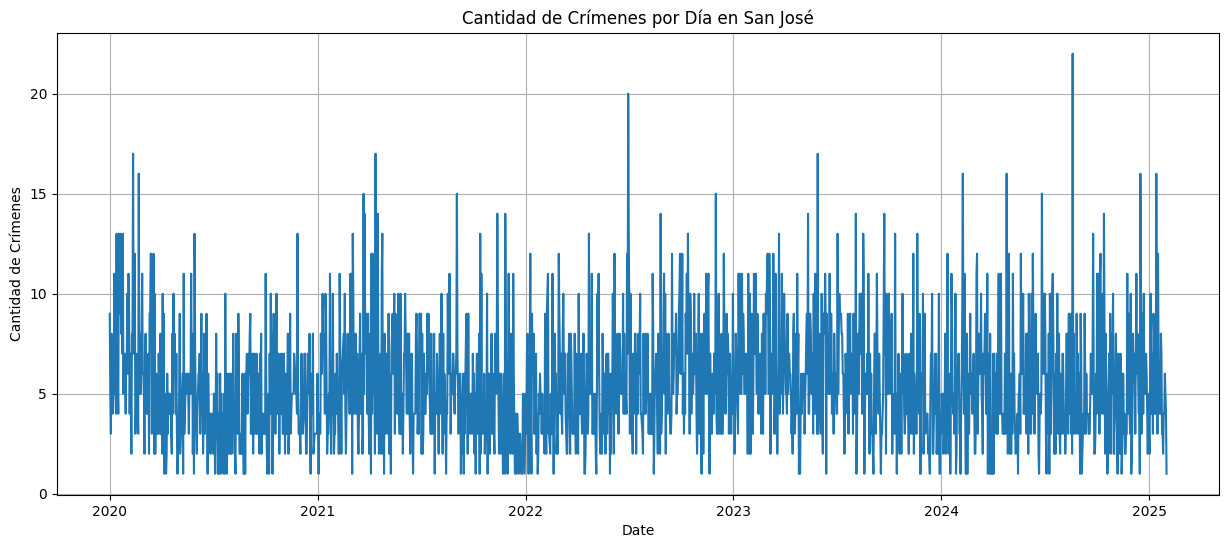

In [ ]:
# Asegúrate de que la columna de fecha esté en formato datetime
# Suponiendo que se llama 'fecha'
df_meteo_merge['Date'] = pd.to_datetime(df_meteo_merge['Date'])

# Agrupa por fecha para contar la cantidad de crímenes por día
crimes_por_dia = df_meteo_merge.groupby('Date').size().reset_index(name='cantidad_crimenes')

# Ahora, visualicemos la serie de tiempo
plt.figure(figsize=(15, 6))
sns.lineplot(data=crimes_por_dia, x='Date', y='cantidad_crimenes')
plt.title('Cantidad de Crímenes por Día en San José')
plt.xlabel('Date')
plt.ylabel('Cantidad de Crímenes')
plt.grid(True)
plt.show()

# data visualization
Frecuencia de Tipos de Crímenes en San José

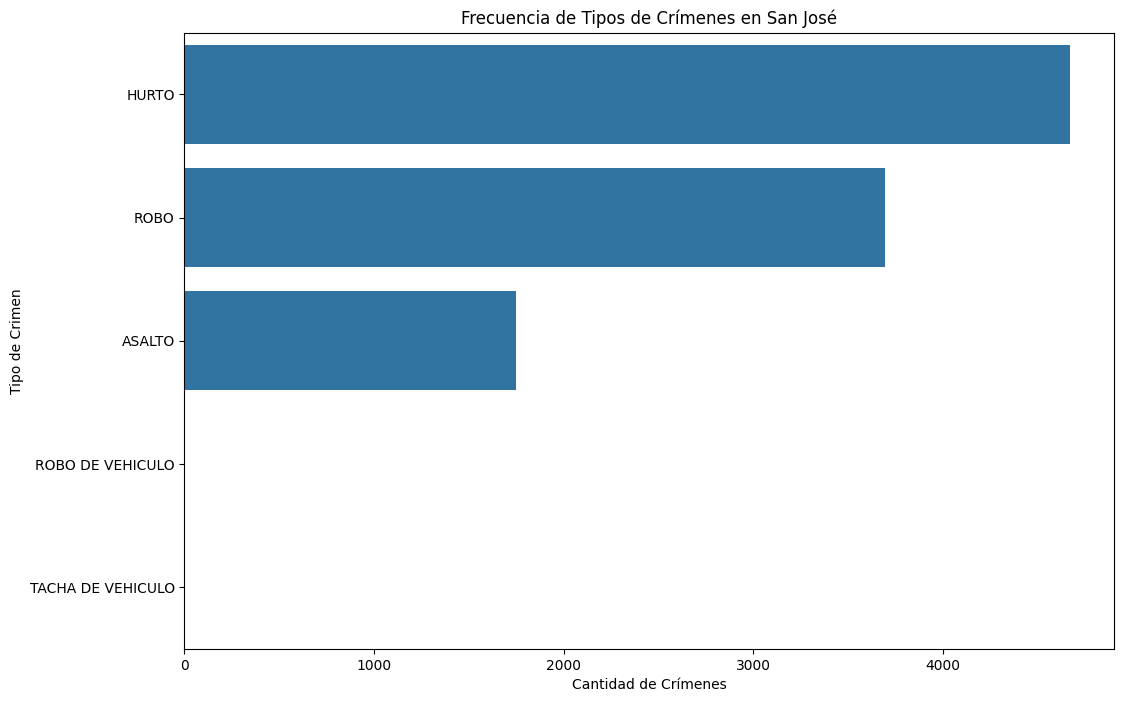

In [ ]:
# Suponiendo que la columna se llama 'tipo_crimen'
plt.figure(figsize=(12, 8))
sns.countplot(data=df_meteo_merge, y='Delito', order=df_meteo_merge['Delito'].value_counts().index)
plt.title('Frecuencia de Tipos de Crímenes en San José')
plt.xlabel('Cantidad de Crímenes')
plt.ylabel('Tipo de Crimen')
plt.show()

# data visualization
Frecuencia de Tipos de Crímenes en San José

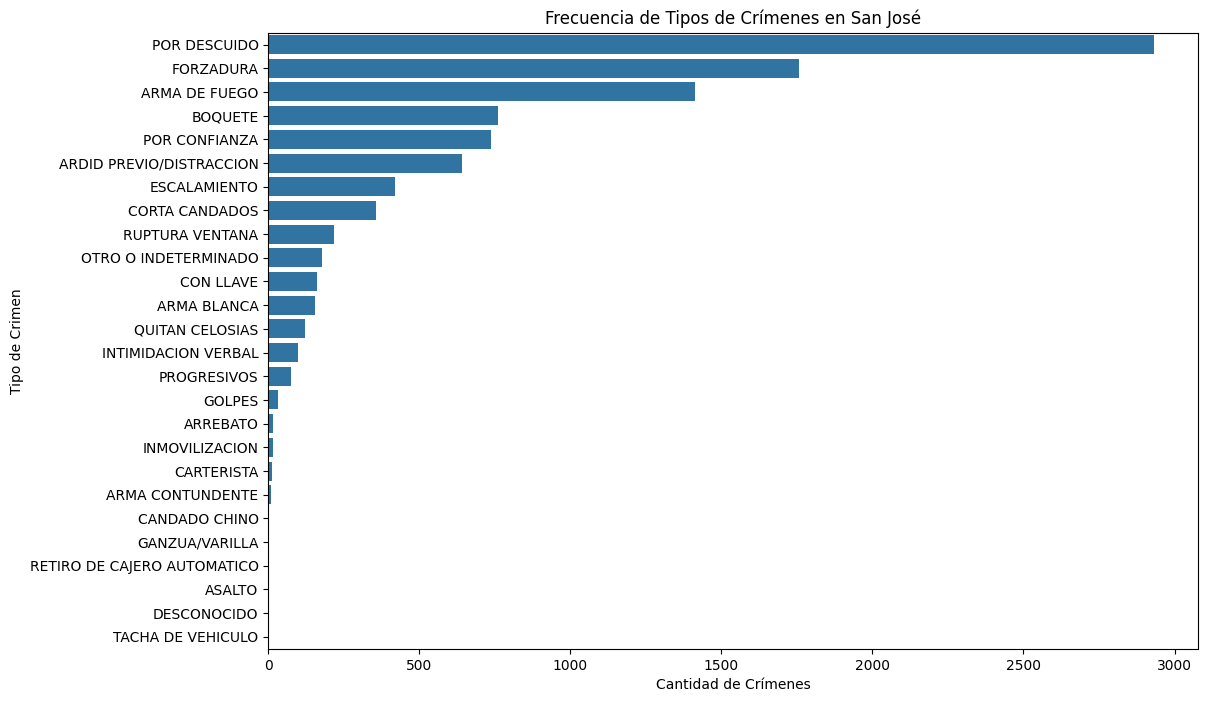

In [ ]:
# Suponiendo que la columna se llama 'tipo_crimen'
plt.figure(figsize=(12, 8))
sns.countplot(data=df_meteo_merge, y='SubDelito', order=df_meteo_merge['SubDelito'].value_counts().index)
plt.title('Frecuencia de Tipos de Crímenes en San José')
plt.xlabel('Cantidad de Crímenes')
plt.ylabel('Tipo de Crimen')
plt.show()

# data visualization
Distribución de Crímenes por Género de la Víctima

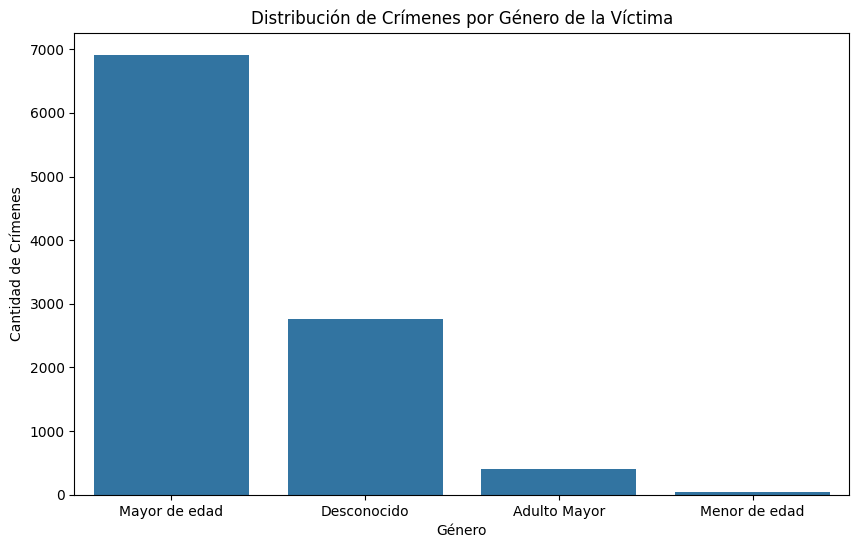

In [ ]:
# Gráfico de barras por Sexo
plt.figure(figsize=(10, 6))
sns.countplot(data=df_meteo_merge, x='Sexo', order=df_meteo_merge['Sexo'].value_counts().index)
plt.title('Distribución de Crímenes por Género de la Víctima')
plt.xlabel('Género')
plt.ylabel('Cantidad de Crímenes')
plt.show()

# data visualization
Crímenes por Género y Tipo de Víctima

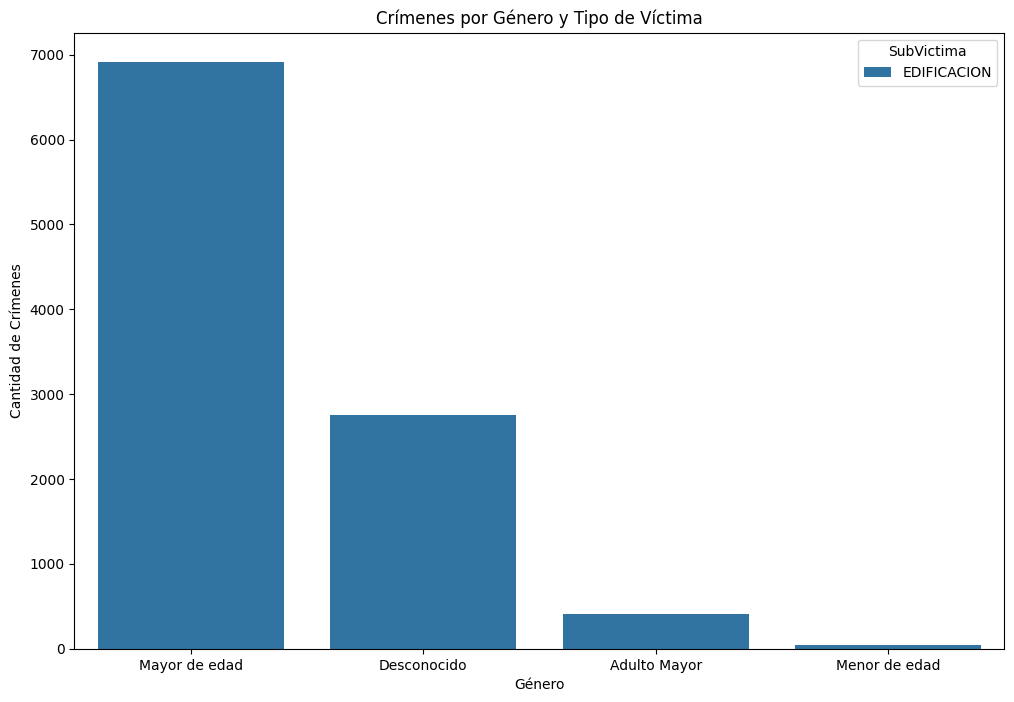

In [ ]:
# También puedes combinar ambos para un análisis más profundo
plt.figure(figsize=(12, 8))
sns.countplot(data=df_meteo_merge, x='Sexo', hue='SubVictima')
plt.title('Crímenes por Género y Tipo de Víctima')
plt.xlabel('Género')
plt.ylabel('Cantidad de Crímenes')
plt.show()

# data visualization
Frecuencia de Tipos de Crímenes en San José por edad

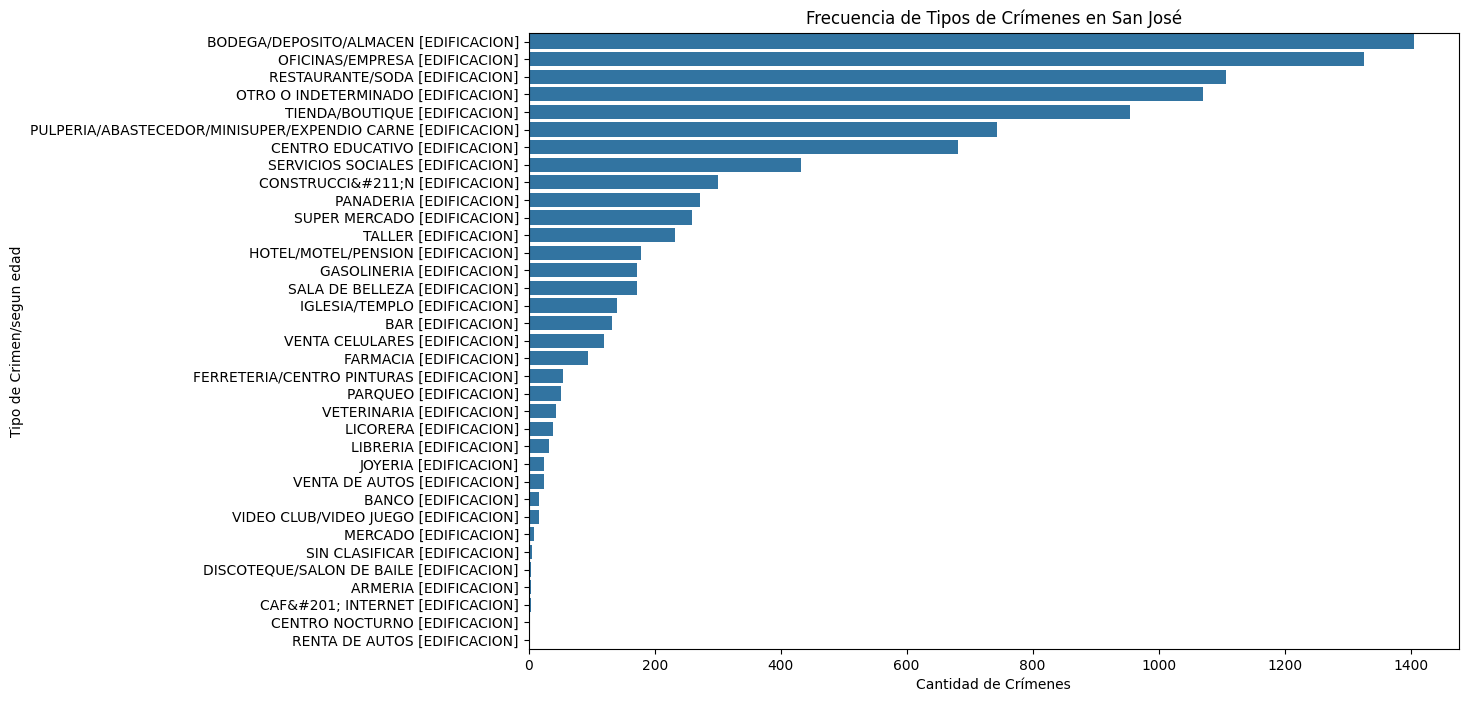

In [ ]:
# Suponiendo que la columna se llama 'tipo_crimen'
plt.figure(figsize=(12, 8))
sns.countplot(data=df_meteo_merge, y='Edad', order=df_meteo_merge['Edad'].value_counts().index)
plt.title('Frecuencia de Tipos de Crímenes en San José')
plt.xlabel('Cantidad de Crímenes')
plt.ylabel('Tipo de Crimen/segun edad')
plt.show()

# data visualization
Relación entre Temperatura EVENING y Cantidad de Crímenes en San José

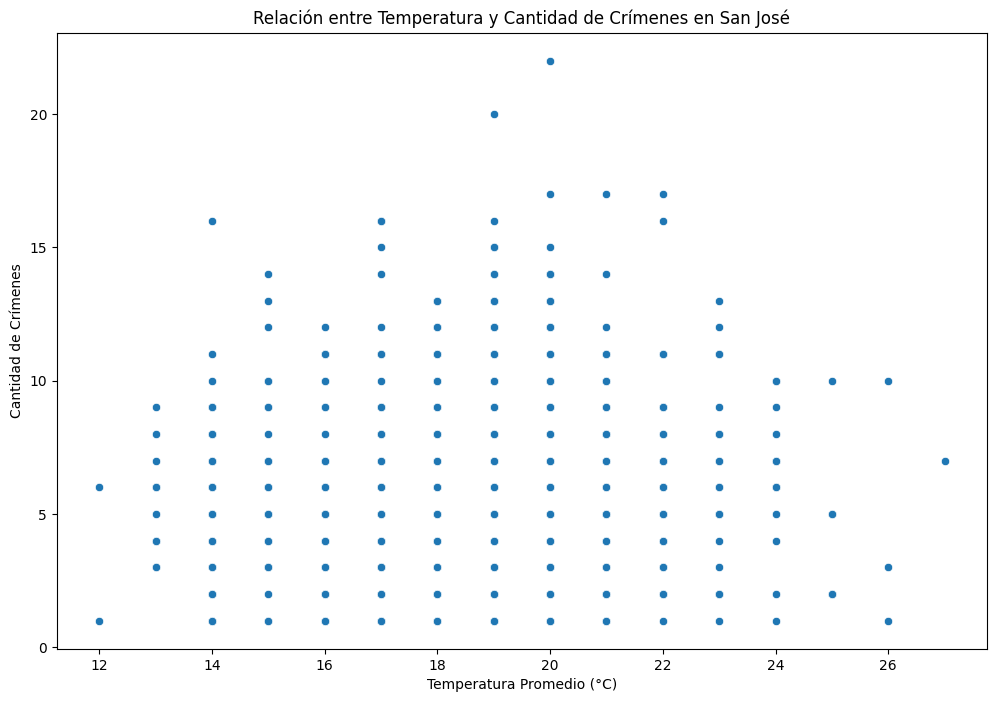

In [ ]:
# Paso 1: Asegúrate de que la columna de fecha sea de tipo datetime
df_meteo_merge['Date'] = pd.to_datetime(df_meteo_merge['Date'])

# Paso 2: Agrupa por fecha para contar los crímenes y obtener la temperatura promedio
# (Si tienes múltiples registros de temperatura por día, promedia la temperatura)
df_diario = df_meteo_merge.groupby('Date').agg(
    cantidad_crimenes=('Delito', 'count'),
    temperatura_promedio=('TEMPERATURE_EVENING_C_18H', 'mean')
).reset_index()

# Paso 3: Crea el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_diario, x='temperatura_promedio', y='cantidad_crimenes')
plt.title('Relación entre Temperatura y Cantidad de Crímenes en San José')
plt.xlabel('Temperatura Promedio (°C)')
plt.ylabel('Cantidad de Crímenes')
plt.show()

# data visualization
Relación entre Temperatura Máxima y Cantidad de Crímenes

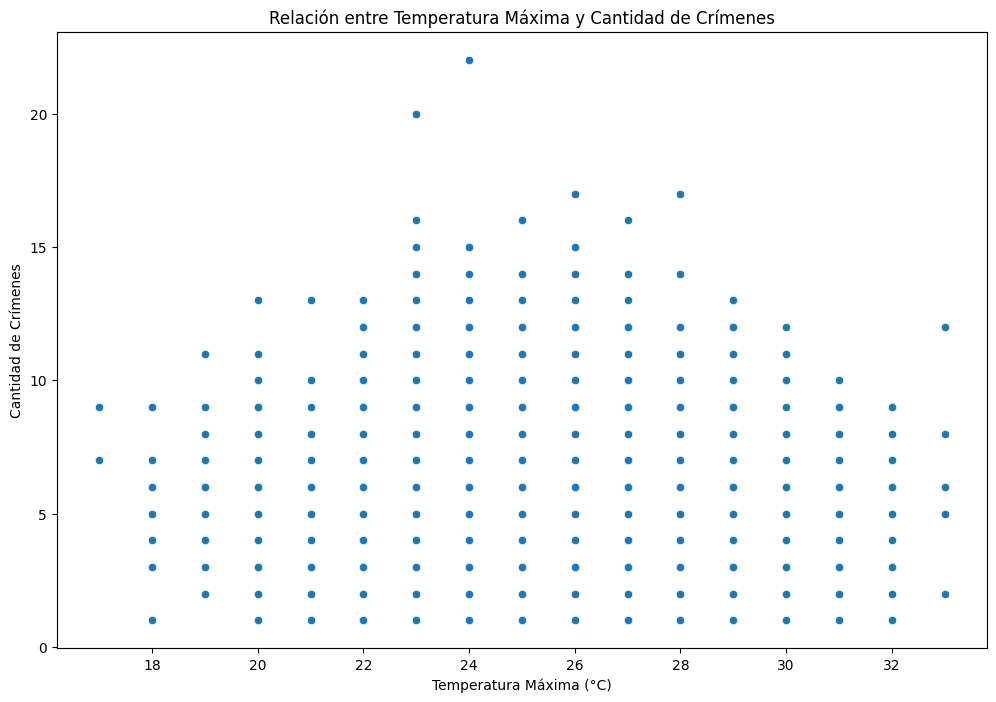

In [ ]:
# Asegúrate de que 'Date' sea de tipo datetime si no lo está
df_meteo_merge['Date'] = pd.to_datetime(df_meteo_merge['Date'])

# Agrupa por fecha para contar los crímenes y obtener la temperatura máxima
df_diario = df_meteo_merge.groupby('Date').agg(
    cantidad_crimenes=('Delito', 'count'),
    max_temp=('MAX_TEMPERATURE_C', 'mean')
).reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_diario, x='max_temp', y='cantidad_crimenes')
plt.title('Relación entre Temperatura Máxima y Cantidad de Crímenes')
plt.xlabel('Temperatura Máxima (°C)')
plt.ylabel('Cantidad de Crímenes')
plt.show()

# data visualization
Cantidad de Crímenes por Rango de Humedad Máxima

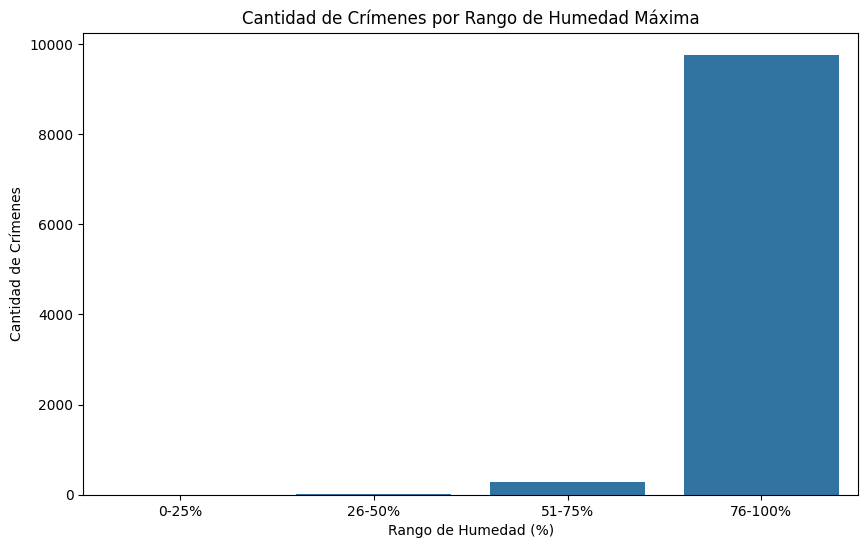

In [ ]:
# Puedes agrupar la humedad en rangos
bins = [0, 25, 50, 75, 100]
labels = ['0-25%', '26-50%', '51-75%', '76-100%']
df_meteo_merge['rango_humedad'] = pd.cut(df_meteo_merge['HUMIDITY_MAX_PERCENT'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_meteo_merge, x='rango_humedad')
plt.title('Cantidad de Crímenes por Rango de Humedad Máxima')
plt.xlabel('Rango de Humedad (%)')
plt.ylabel('Cantidad de Crímenes')
plt.show()

# data visualization
Crímenes por Rango de Humedad Máxima

/tmp/ipython-input-256263447.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_meteo_merge, x='rango_humedad', palette='coolwarm')


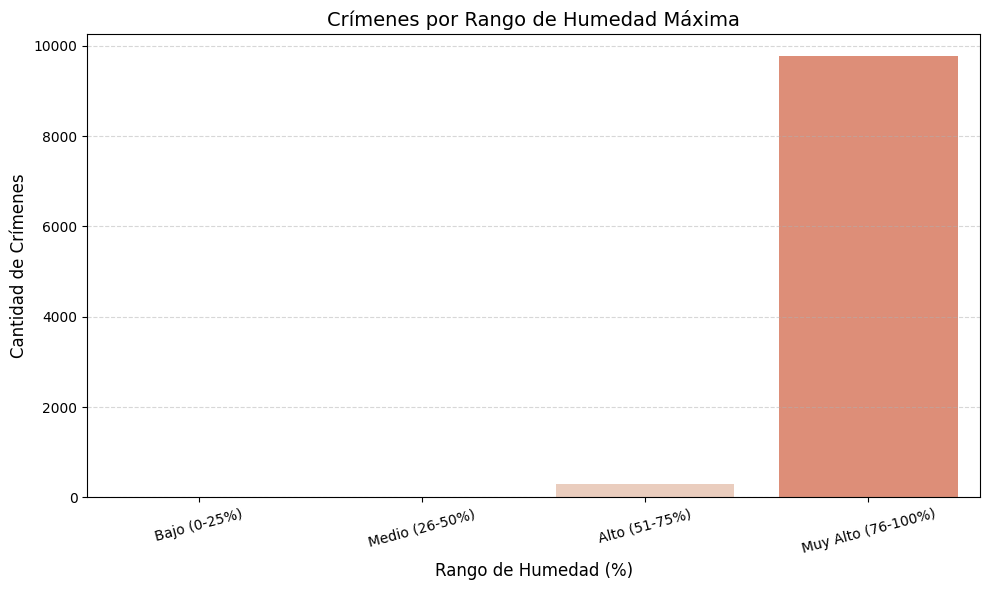

In [ ]:
# Definimos los rangos y etiquetas de forma más clara
bins = [0, 25, 50, 75, 100]
labels = ['Bajo (0-25%)', 'Medio (26-50%)', 'Alto (51-75%)', 'Muy Alto (76-100%)']

# Creamos la columna con los nuevos rangos
df_meteo_merge['rango_humedad'] = pd.cut(df_meteo_merge['HUMIDITY_MAX_PERCENT'], bins=bins, labels=labels, right=False)

# Creamos el gráfico con títulos y etiquetas más claras
plt.figure(figsize=(10, 6))
sns.countplot(data=df_meteo_merge, x='rango_humedad', palette='coolwarm')
plt.title('Crímenes por Rango de Humedad Máxima', fontsize=14)
plt.xlabel('Rango de Humedad (%)', fontsize=12)
plt.ylabel('Cantidad de Crímenes', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# upper

In [ ]:
df_meteo_merge.columns = df_meteo_merge.columns.str.strip().str.upper()
print(df_meteo_merge.columns.tolist())

['DELITO', 'SUBDELITO', 'DATE', 'EDAD', 'VICTIMA', 'SUBVICTIMA', 'SEXO', 'PROVINCIA', 'CANTON', 'DISTRITO', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT', 'TEMPERATURE_MORNING_C_6H', 'TEMPERATURE_NOON_C_12H', 'TEMPERATURE_EVENING_C_18H', 'PRECIP_TOTAL_DAY_MM', 'TOTAL_SNOW_MM', 'WINDTEMP_MAX_C', 'WINDSPEED_MAX_KMH', 'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'UV_INDEX', 'SUNHOUR', 'RANGO_HUMEDAD', 'RANGO_NUBOSIDAD']


# data visualization
Distribución de Delitos por Rango de Humedad y Tipo de Delito

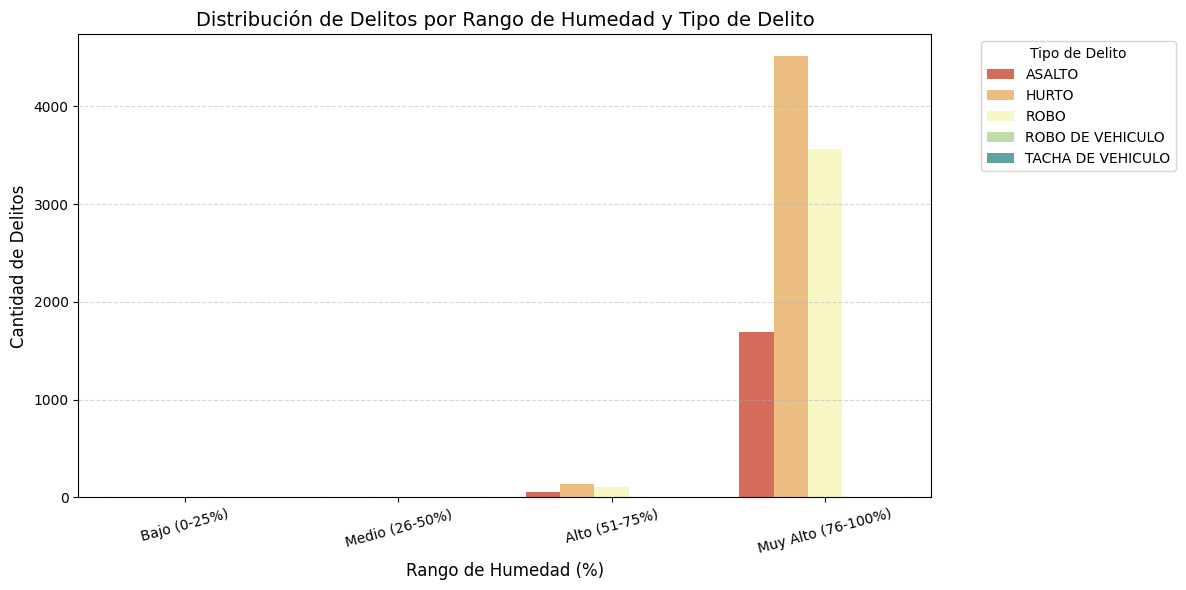

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_meteo_merge, x='rango_humedad', hue='Delito', palette='Spectral')
plt.title('Distribución de Delitos por Rango de Humedad y Tipo de Delito', fontsize=14)
plt.xlabel('Rango de Humedad (%)', fontsize=12)
plt.ylabel('Cantidad de Delitos', fontsize=12)
plt.legend(title='Tipo de Delito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# data visualization
Mapa de Calor: Delitos por Tipo y Humedad

/tmp/ipython-input-580267477.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_meteo_merge.pivot_table(index='Delito', columns='rango_humedad', aggfunc='size', fill_value=0)


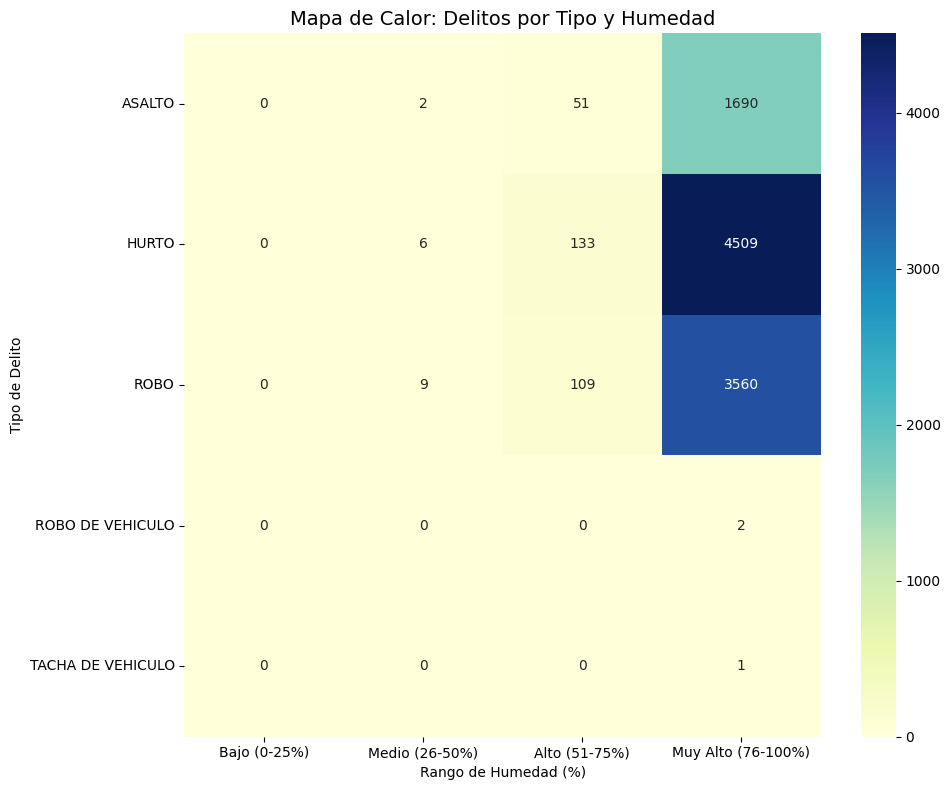

In [ ]:
pivot = df_meteo_merge.pivot_table(index='Delito', columns='rango_humedad', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mapa de Calor: Delitos por Tipo y Humedad', fontsize=14)
plt.xlabel('Rango de Humedad (%)')
plt.ylabel('Tipo de Delito')
plt.tight_layout()
plt.show()

# data visualization
Distribución de Delitos por Rango de Nubosidad y Tipo de Delito

In [ ]:
import pandas as pd

# Define los límites de los rangos y las etiquetas
bins = [0, 25, 50, 75, 100]
labels = ['Despejado a poco nuboso', 'Parcialmente nuboso', 'Mayormente nuboso', 'Cubierto']

# Crea la nueva columna 'RANGO_NUBOSIDAD'
df_meteo_merge['RANGO_NUBOSIDAD'] = pd.cut(df_meteo_merge['CLOUDCOVER_AVG_PERCENT'],
                                         bins=bins,
                                         labels=labels,
                                         right=False)

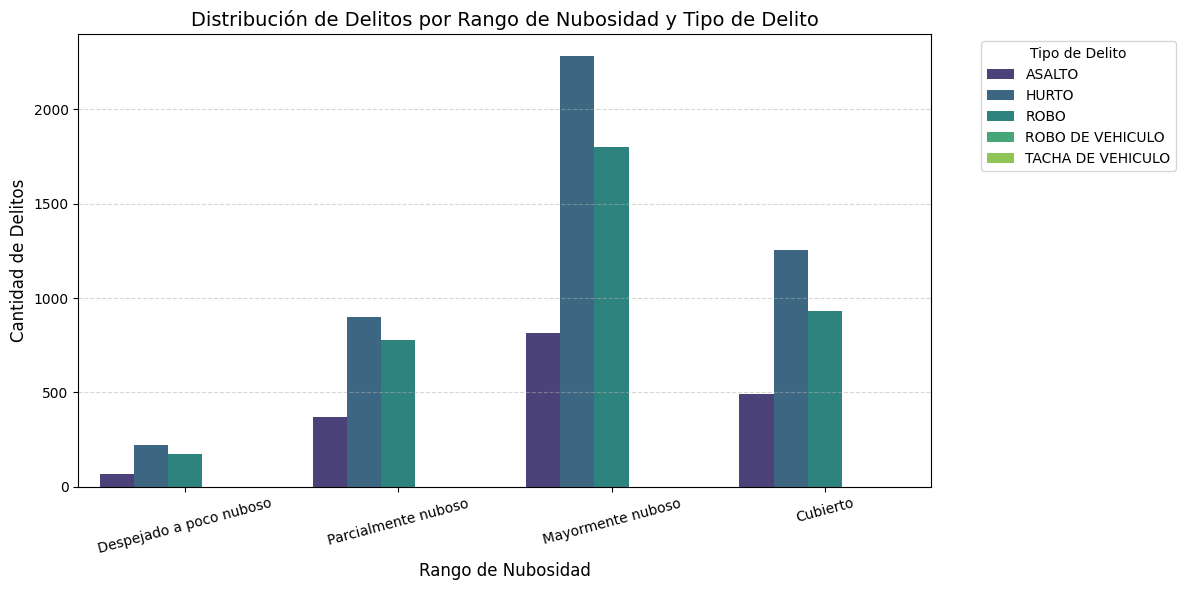

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_meteo_merge, x='RANGO_NUBOSIDAD', hue='DELITO', palette='viridis')
plt.title('Distribución de Delitos por Rango de Nubosidad y Tipo de Delito', fontsize=14)
plt.xlabel('Rango de Nubosidad', fontsize=12)
plt.ylabel('Cantidad de Delitos', fontsize=12)
plt.legend(title='Tipo de Delito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# data visualization
Mapa de Calor: Delitos por Tipo y Rango de Precipitación

In [ ]:
# Definir los rangos y las etiquetas para la precipitación
bins = [0, 0.1, 5, 20, np.inf]
labels = ['Sin lluvia', 'Lluvia leve', 'Lluvia moderada', 'Lluvia fuerte']

# Crear la nueva columna 'RANGO_PRECIPITACION' en el DataFrame correcto
df_meteo_merge['RANGO_PRECIPITACION'] = pd.cut(df_meteo_merge['PRECIP_TOTAL_DAY_MM'], bins=bins, labels=labels, right=False)

# Si tienes valores nulos o quieres tratar los ceros de forma especial, puedes ajustar los rangos.
# Por ejemplo, el 0 está incluido en 'Sin lluvia' gracias al 'right=False'.

/tmp/ipython-input-1182923511.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_meteo_merge.pivot_table(index='DELITO', columns='RANGO_PRECIPITACION', aggfunc='size', fill_value=0)


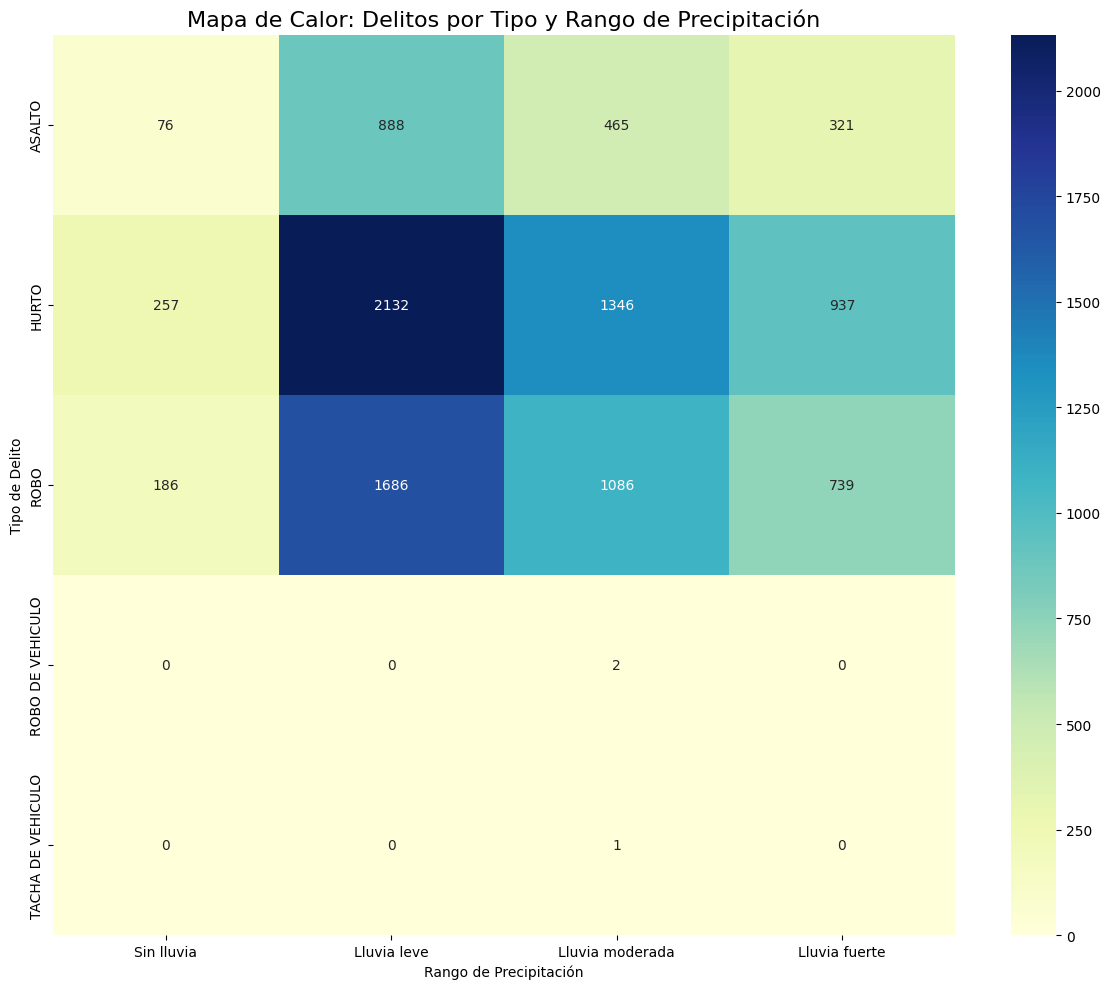

In [ ]:
# Crear la tabla dinámica
# El índice 'DELITO' y la columna 'RANGO_PRECIPITACION' ya existen ahora
pivot = df_meteo_merge.pivot_table(index='DELITO', columns='RANGO_PRECIPITACION', aggfunc='size', fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mapa de Calor: Delitos por Tipo y Rango de Precipitación', fontsize=16)
plt.xlabel('Rango de Precipitación')
plt.ylabel('Tipo de Delito')
plt.tight_layout()
plt.show()

# data visualization
Distribución de Delitos por Rango de precipitacion y Tipo de Delito

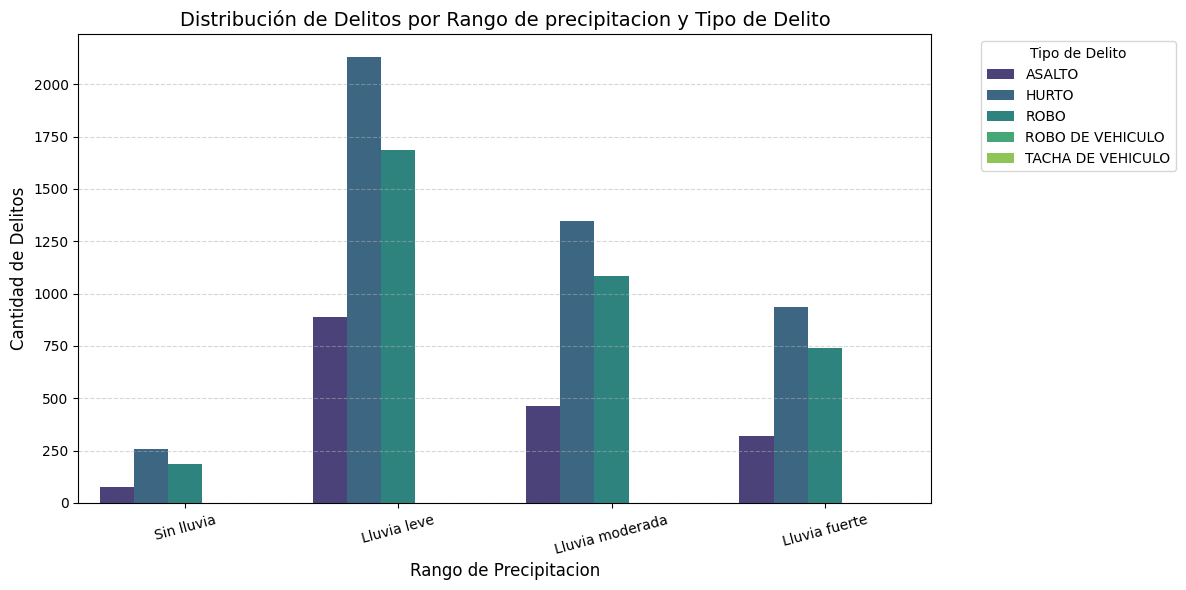

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_meteo_merge, x='RANGO_PRECIPITACION', hue='DELITO', palette='viridis')
plt.title('Distribución de Delitos por Rango de precipitacion y Tipo de Delito', fontsize=14)
plt.xlabel('Rango de Precipitacion', fontsize=12)
plt.ylabel('Cantidad de Delitos', fontsize=12)
plt.legend(title='Tipo de Delito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# data visualization
Mapa de Calor: Delitos por Tipo y Rango de Nubosidad

In [ ]:
# Definir los límites de los rangos de nubosidad
bins_nubosidad = [0, 25, 50, 75, 100]
# Definir las etiquetas para los rangos
labels_nubosidad = ['Despejado (0-25%)', 'Parcialmente Nublado (26-50%)', 'Nublado (51-75%)', 'Muy Nublado (76-100%)']

# Crear la nueva columna 'RANGO_NUBOSIDAD' en el DataFrame
df_meteo_merge['RANGO_NUBOSIDAD'] = pd.cut(df_meteo_merge['CLOUDCOVER_AVG_PERCENT'], bins=bins_nubosidad, labels=labels_nubosidad, include_lowest=True)

/tmp/ipython-input-3237926661.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_nubosidad = df_meteo_merge.pivot_table(index='DELITO', columns='RANGO_NUBOSIDAD', aggfunc='size', fill_value=0)


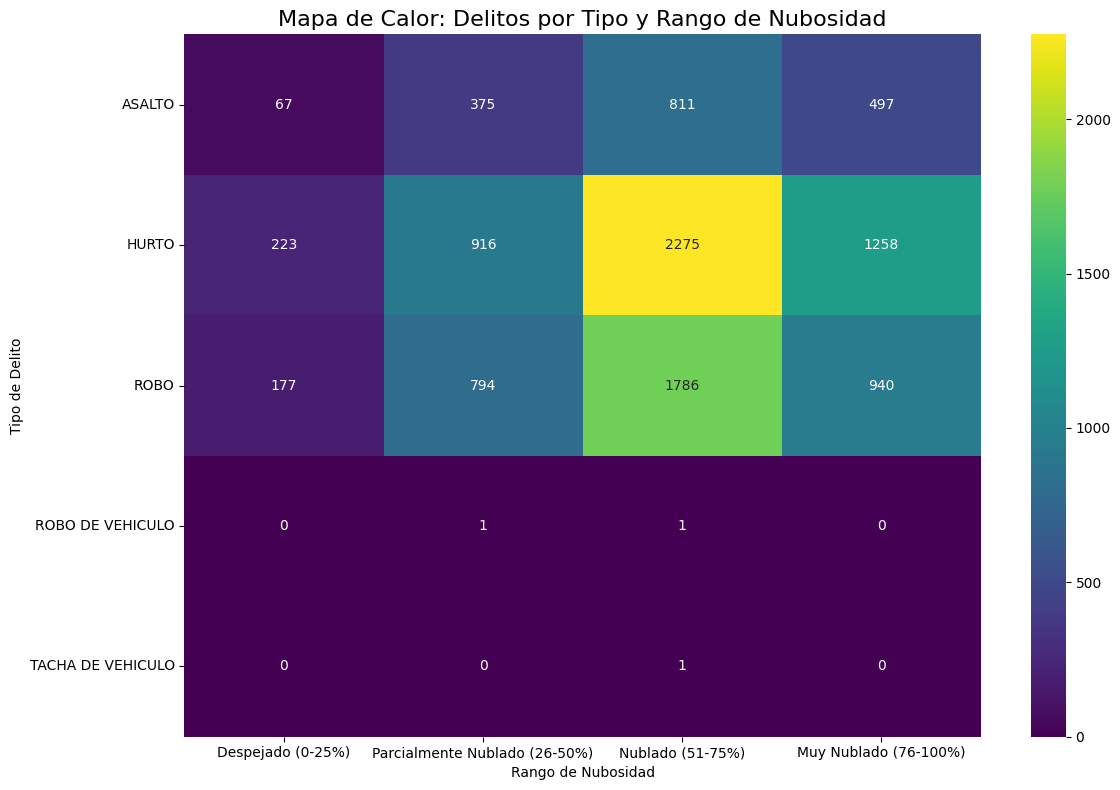

In [ ]:
# Crear la tabla pivote para el mapa de calor
pivot_nubosidad = df_meteo_merge.pivot_table(index='DELITO', columns='RANGO_NUBOSIDAD', aggfunc='size', fill_value=0)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el mapa de calor con los datos de la tabla pivote
sns.heatmap(pivot_nubosidad, annot=True, fmt='d', cmap='viridis')

# Añadir títulos y etiquetas
plt.title('Mapa de Calor: Delitos por Tipo y Rango de Nubosidad', fontsize=16)
plt.xlabel('Rango de Nubosidad')
plt.ylabel('Tipo de Delito')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# data visualization
Relación entre Precipitación y Cantidad de Crímenes

In [ ]:
df_meteo_merge['Delito'] = df_meteo_merge['Delito'].astype('category').cat.codes
df_meteo_merge['SubDelito'] = df_meteo_merge['SubDelito'].astype('category').cat.codes
df_meteo_merge['Distrito'] = df_meteo_merge['Distrito'].astype('category').cat.codes
df_meteo_merge['Sexo'] = df_meteo_merge['Sexo'].astype('category').cat.codes
df_meteo_merge['Victima'] = df_meteo_merge['Victima'].astype('category').cat.codes
df_meteo_merge['Edad'] = df_meteo_merge['Edad'].astype('category').cat.codes
df_meteo_merge['Date'] = df_meteo_merge['Date'].astype('category').cat.codes
df_meteo_merge['SubVictima'] = df_meteo_merge['SubVictima'].astype('category').cat.codes

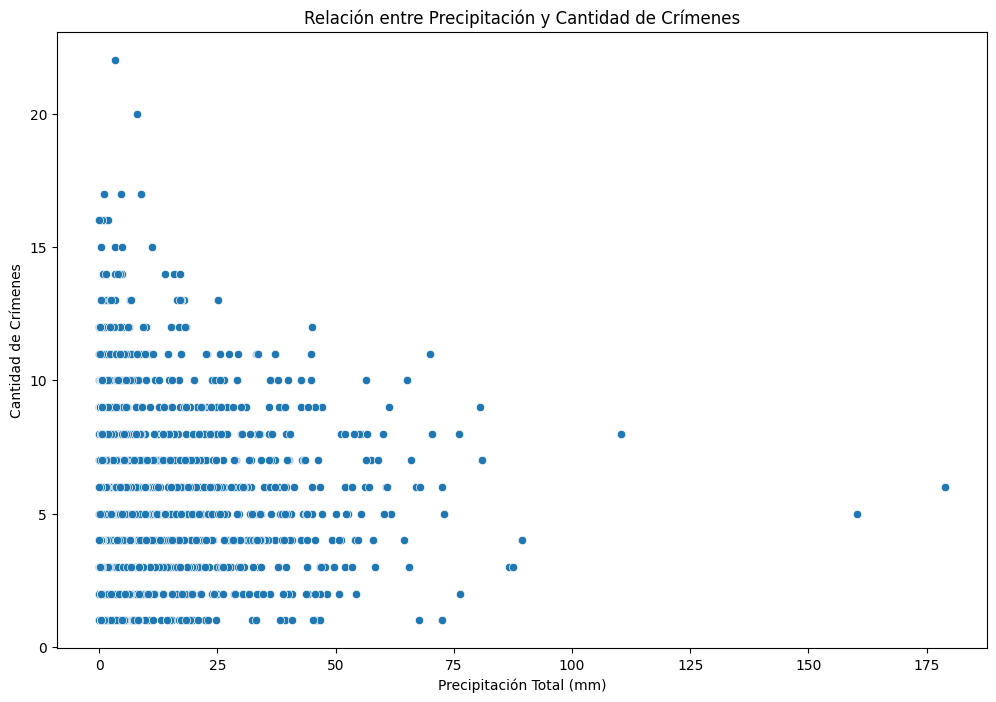

In [ ]:
df_diario = df_meteo_merge.groupby('DATE').agg(
    cantidad_crimenes=('DELITO', 'count'),
    precipitacion_total=('PRECIP_TOTAL_DAY_MM', 'mean')
).reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_diario, x='precipitacion_total', y='cantidad_crimenes')
plt.title('Relación entre Precipitación y Cantidad de Crímenes')
plt.xlabel('Precipitación Total (mm)')
plt.ylabel('Cantidad de Crímenes')
plt.show()

# data visualization
Distribución de Tipos de Delito por Cantón

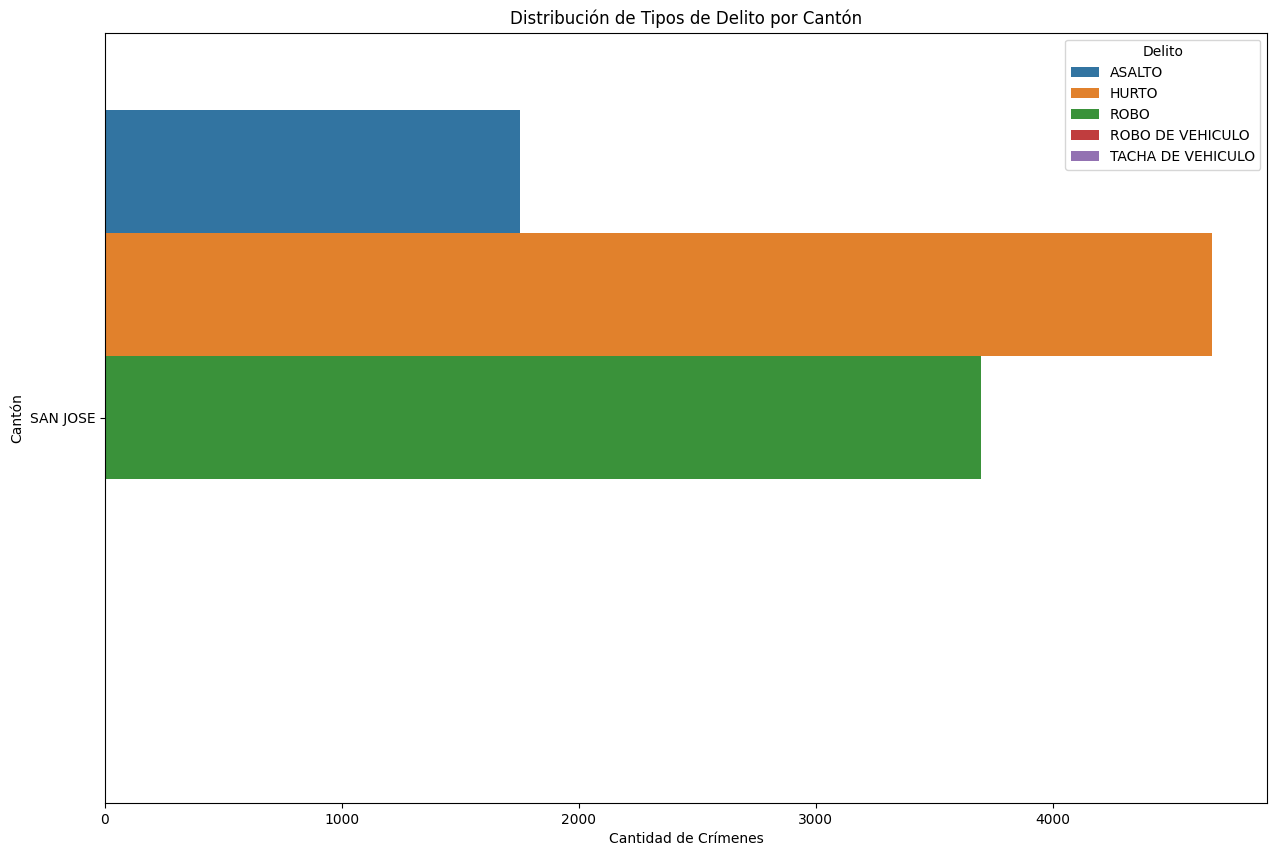

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df_meteo_merge, y='CANTON', hue='DELITO', order=df_meteo_merge['CANTON'].value_counts().index)
plt.title('Distribución de Tipos de Delito por Cantón')
plt.xlabel('Cantidad de Crímenes')
plt.ylabel('Cantón')
plt.legend(title='Delito')
plt.show()

# data visualization
Crímenes por Tipo de Víctima y Género

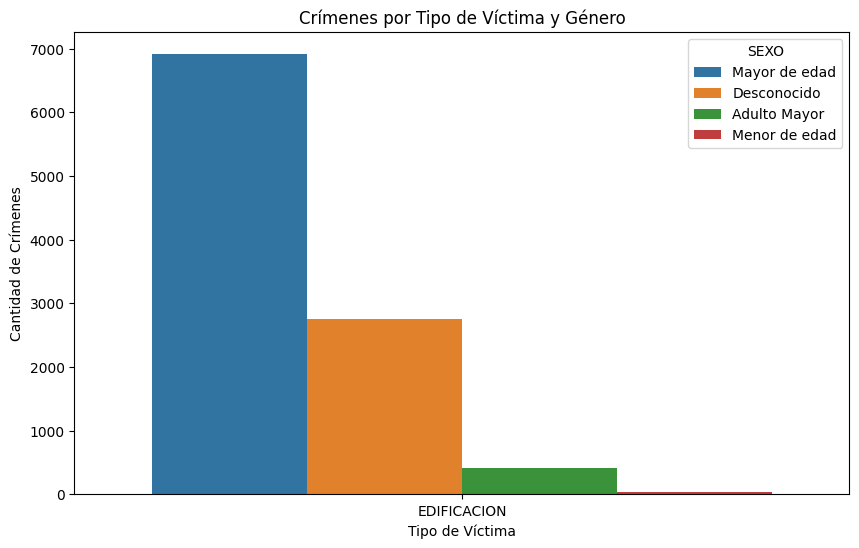

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_meteo_merge, x='SUBVICTIMA', hue='SEXO')
plt.title('Crímenes por Tipo de Víctima y Género')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Cantidad de Crímenes')
plt.show()

# data visualization
Distribución de la Temperatura Máxima por Tipo de Delito

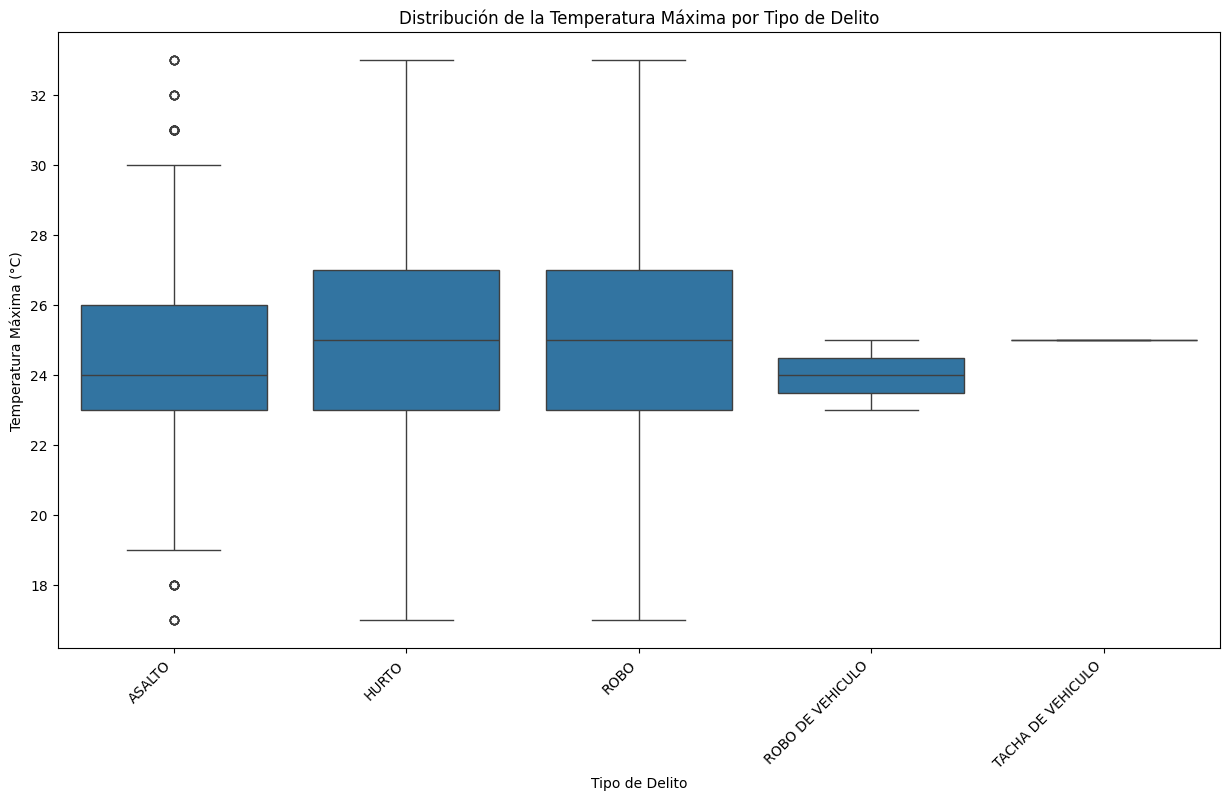

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_meteo_merge, x='DELITO', y='MAX_TEMPERATURE_C')
plt.title('Distribución de la Temperatura Máxima por Tipo de Delito')
plt.xlabel('Tipo de Delito')
plt.ylabel('Temperatura Máxima (°C)')
plt.xticks(rotation=45, ha='right')
plt.show()

# data visualization
Crímenes y Temperatura Máxima a lo Largo del Tiempo

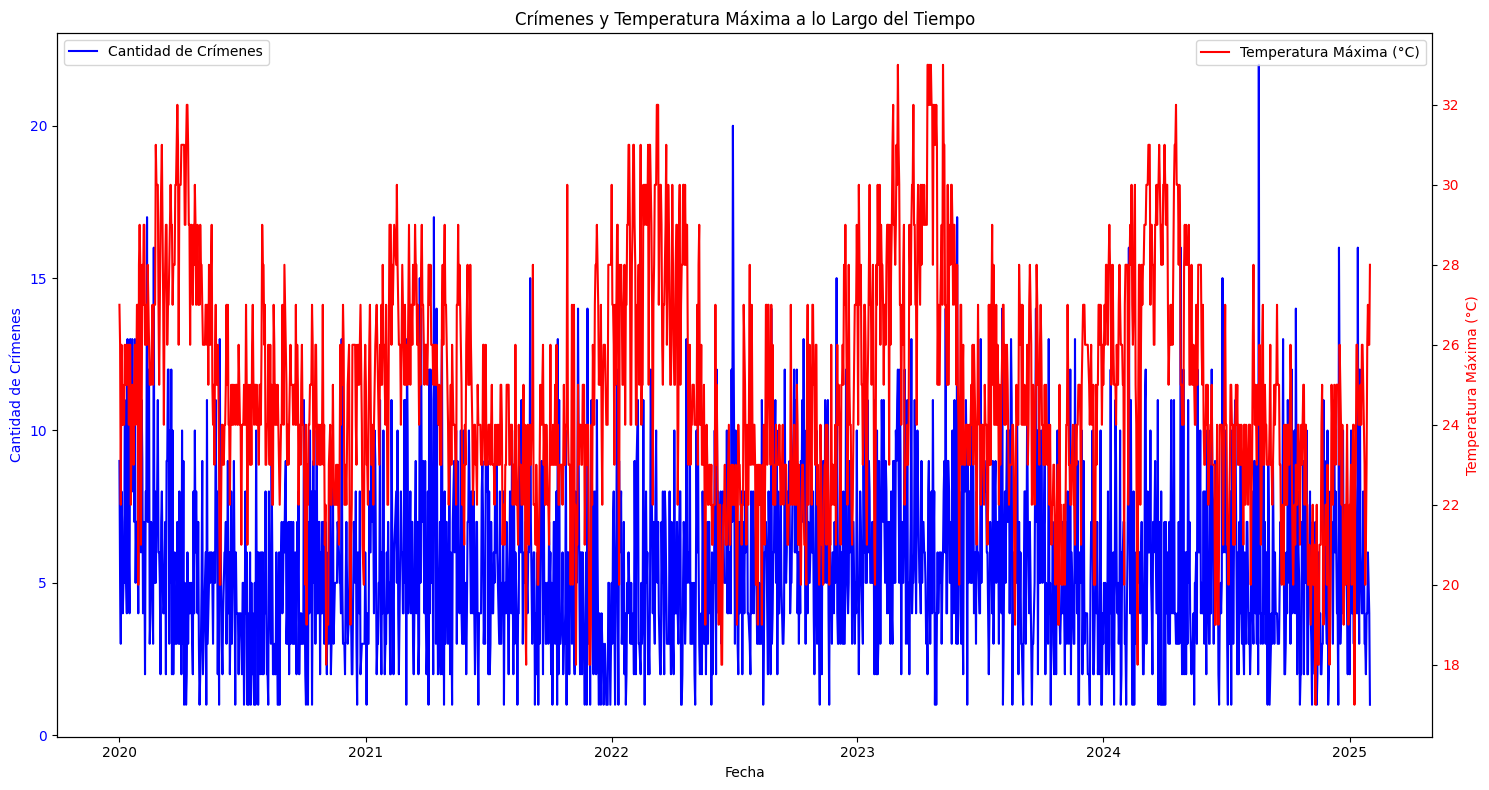

In [ ]:
# Convertir la columna 'Date' a formato de fecha
df_meteo_merge['DATE'] = pd.to_datetime(df_meteo_merge['DATE'])

# Agrupar por fecha para contar crímenes y obtener la temperatura promedio diaria
df_diario = df_meteo_merge.groupby('DATE').agg(
    cantidad_crimenes=('DELITO', 'count'),
    temperatura_max_diaria=('MAX_TEMPERATURE_C', 'max')
).reset_index()

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(15, 8))

# Usa 'DATE' en lugar de 'Date'
sns.lineplot(data=df_diario, x='DATE', y='cantidad_crimenes', ax=ax1, color='blue', label='Cantidad de Crímenes')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cantidad de Crímenes', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje para la temperatura
ax2 = ax1.twinx()
# Usa 'DATE' en lugar de 'Date'
sns.lineplot(data=df_diario, x='DATE', y='temperatura_max_diaria', ax=ax2, color='red', label='Temperatura Máxima (°C)')
ax2.set_ylabel('Temperatura Máxima (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Crímenes y Temperatura Máxima a lo Largo del Tiempo')
fig.tight_layout()
plt.show()

# data visualization
Mapa de Calor de Crímenes por Cantón y Tipo de Delito

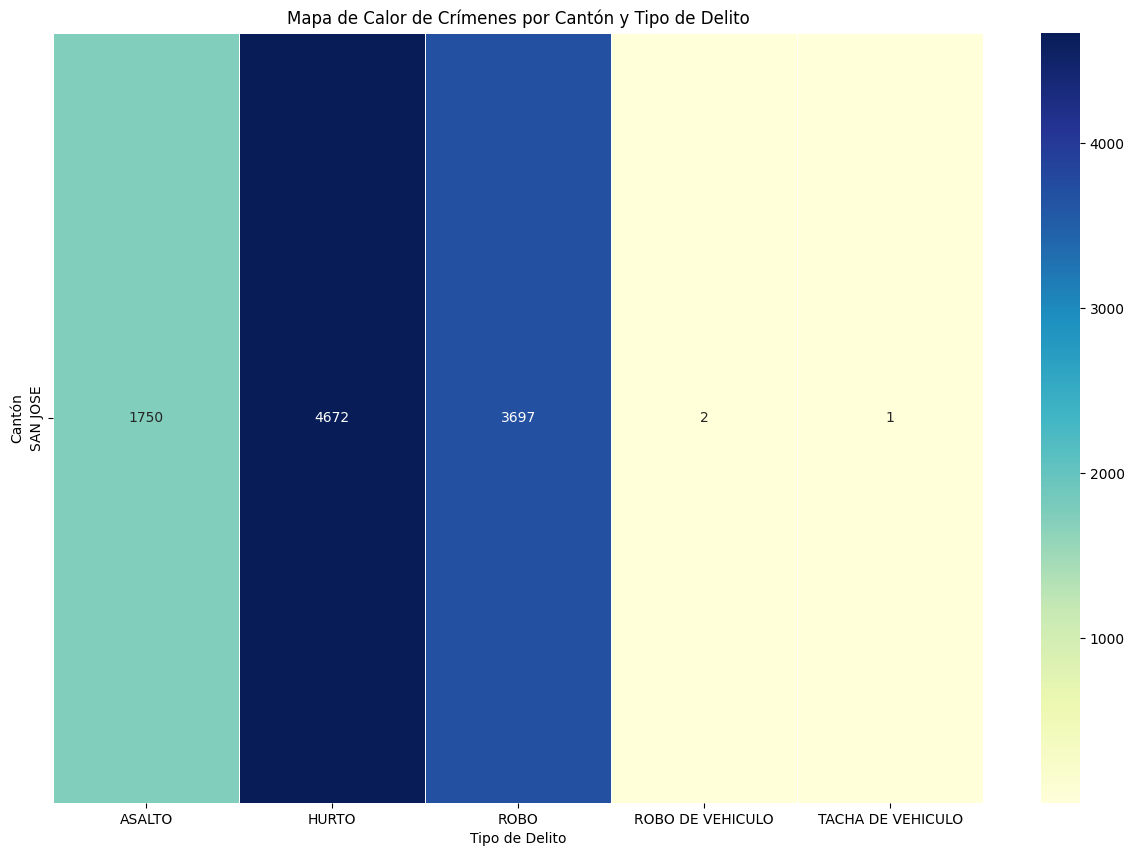

In [ ]:
# Crear una tabla cruzada para contar los crímenes por Cantón y Delito
crimes_canton_delito = pd.crosstab(df_meteo_merge['CANTON'], df_meteo_merge['DELITO'])

plt.figure(figsize=(15, 10))
sns.heatmap(crimes_canton_delito, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Mapa de Calor de Crímenes por Cantón y Tipo de Delito')
plt.xlabel('Tipo de Delito')
plt.ylabel('Cantón')
plt.show()

# data visualization

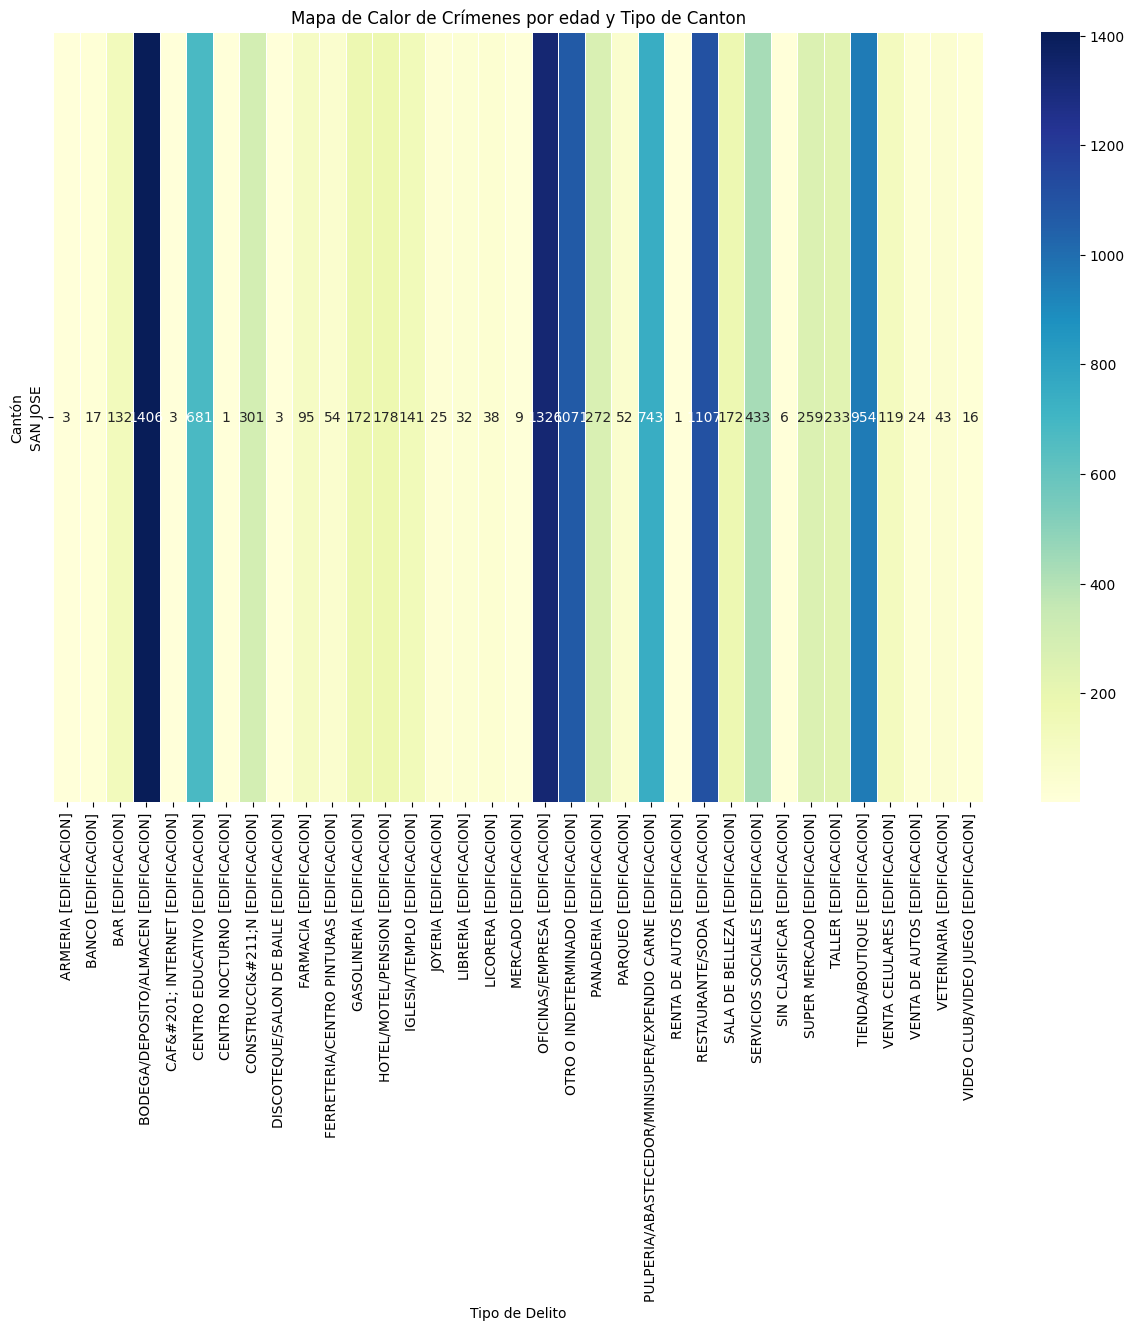

In [ ]:
# Crear una tabla cruzada para contar los crímenes por Cantón y Delito
crimes_canton_delito = pd.crosstab(df_meteo_merge['CANTON'], df_meteo_merge['EDAD'])

plt.figure(figsize=(15, 10))
sns.heatmap(crimes_canton_delito, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Mapa de Calor de Crímenes por edad y Tipo de Canton')
plt.xlabel('Tipo de Delito')
plt.ylabel('Cantón')
plt.show()

# Data visualization
Mapa de Calor de Crímenes por Hora del Día y Día de la Semana'

/tmp/ipython-input-169067557.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crimes_por_hora_dia = df_meteo_merge.groupby(['hora', 'dia_semana']).size().unstack(fill_value=0)


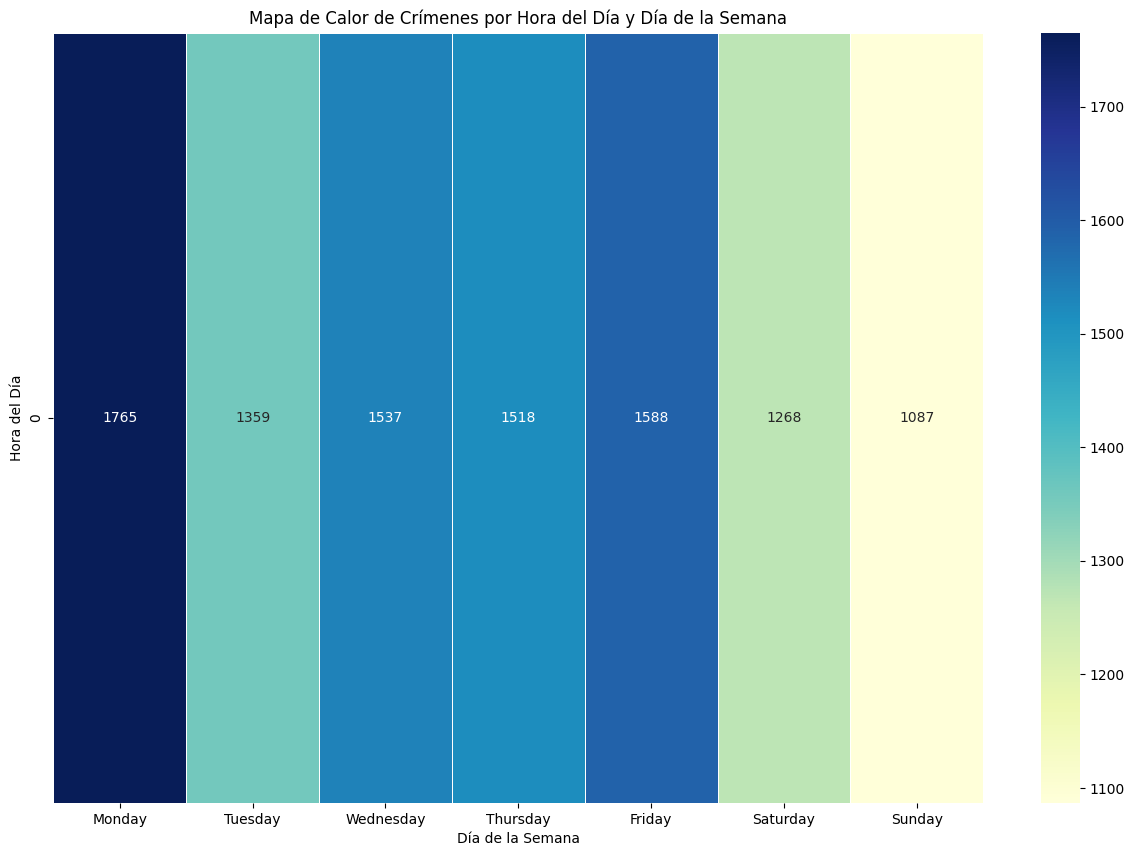

In [ ]:
# Asegurarse de que la columna 'Date' sea de tipo datetime
df_meteo_merge['DATE'] = pd.to_datetime(df_meteo_merge['DATE'])

# Extraer el día de la semana y la hora
df_meteo_merge['dia_semana'] = df_meteo_merge['DATE'].dt.day_name()
df_meteo_merge['hora'] = df_meteo_merge['DATE'].dt.hour

# Ordenar los días de la semana para el gráfico
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_meteo_merge['dia_semana'] = pd.Categorical(df_meteo_merge['dia_semana'], categories=orden_dias, ordered=True)

# Crear una tabla pivote para el conteo de crímenes
crimes_por_hora_dia = df_meteo_merge.groupby(['hora', 'dia_semana']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 10))
sns.heatmap(crimes_por_hora_dia, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Mapa de Calor de Crímenes por Hora del Día y Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Hora del Día')
plt.show()

# Data visualization
Precipitación Total del Día (mm)

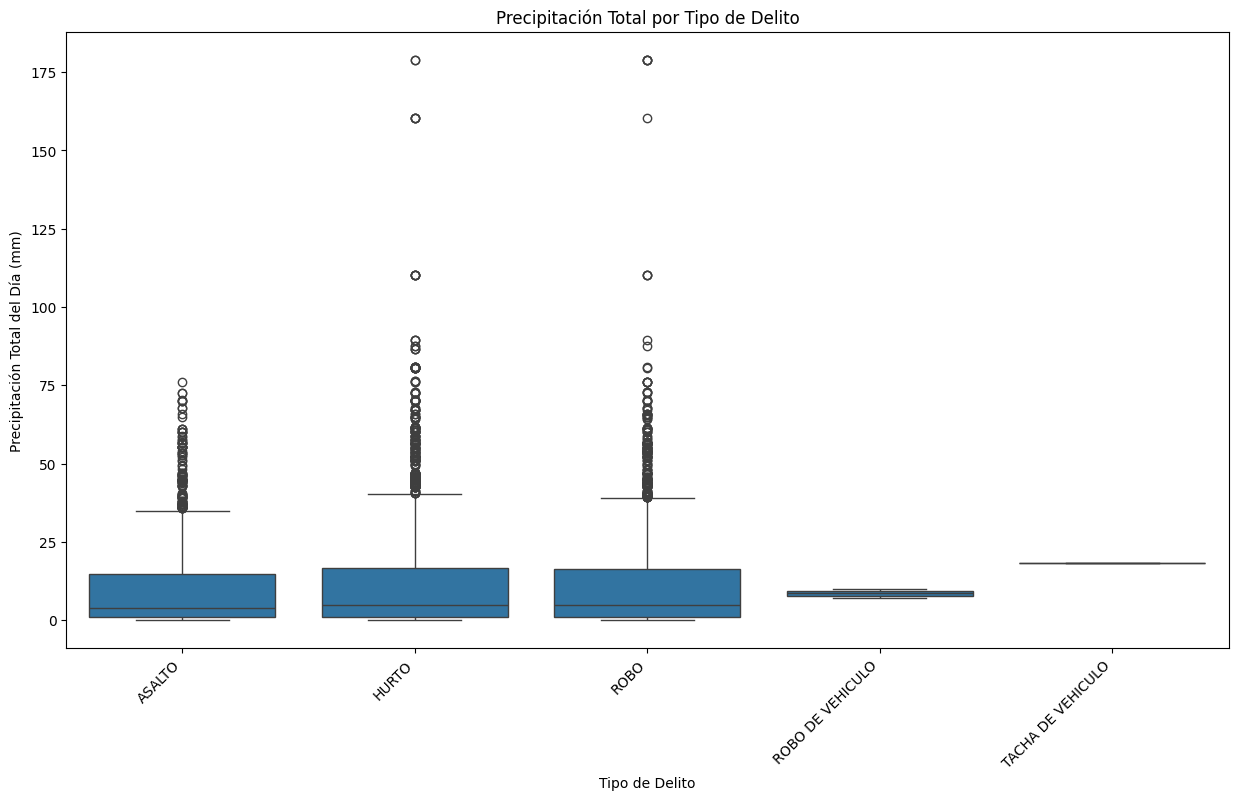

In [ ]:
# Analizar la relación entre la Precipitación y el Tipo de Delito
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_meteo_merge, x='DELITO', y='PRECIP_TOTAL_DAY_MM')
plt.title('Precipitación Total por Tipo de Delito')
plt.xlabel('Tipo de Delito')
plt.ylabel('Precipitación Total del Día (mm)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Data visualization
Temperatura max Total por Tipo de Delito

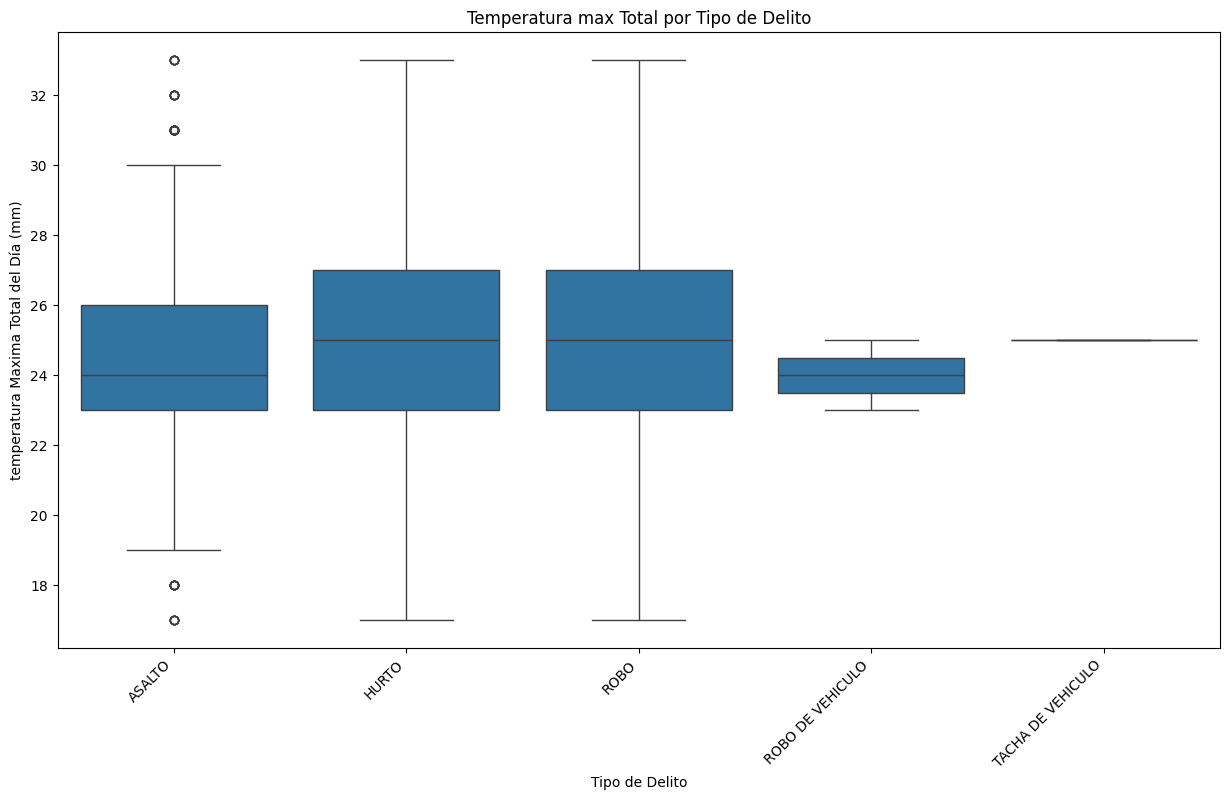

In [ ]:
# Analizar la relación entre la Precipitación y el Tipo de Delito
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_meteo_merge, x='DELITO', y='MAX_TEMPERATURE_C')
plt.title('Temperatura max Total por Tipo de Delito')
plt.xlabel('Tipo de Delito')
plt.ylabel('temperatura Maxima Total del Día (mm)')
plt.xticks(rotation=45, ha='right')
plt.show()


# Data visualization
Distribución de la Edad de las Víctimas

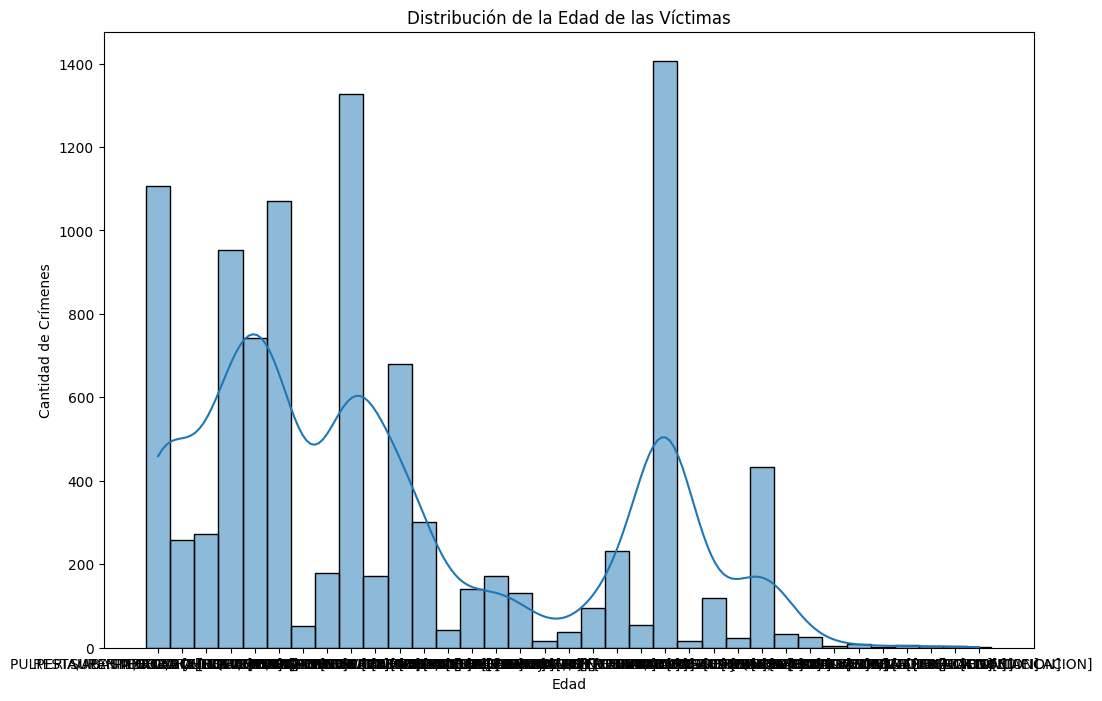

In [ ]:
# Histograma de la distribución de la edad
plt.figure(figsize=(12, 8))
sns.histplot(data=df_meteo_merge, x='EDAD', bins=30, kde=True)
plt.title('Distribución de la Edad de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Crímenes')
plt.show()

# Data visualization
Crímenes por Tipo de Víctima y Género

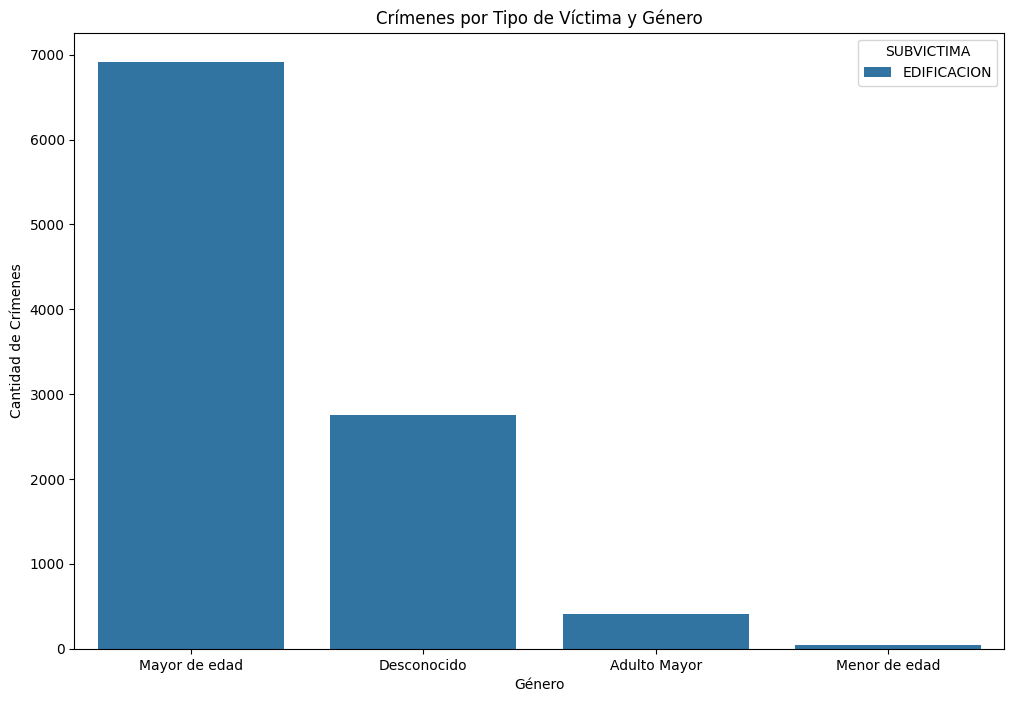

In [ ]:

# Gráfico de barras de crímenes por sexo y tipo de víctima
plt.figure(figsize=(12, 8))
sns.countplot(data=df_meteo_merge, x='SEXO', hue='SUBVICTIMA')
plt.title('Crímenes por Tipo de Víctima y Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Crímenes')
plt.show()

# correlaciones entre crima y clima

In [ ]:
# Asegúrate de que 'Date' sea de tipo datetime
df_meteo_merge['DATE'] = pd.to_datetime(df_meteo_merge['DATE'])

# Agrupa por fecha para obtener el conteo de crímenes y el promedio de las variables de clima
df_diario = df_meteo_merge.groupby('DATE').agg(
    cantidad_crimenes=('DELITO', 'count'),
    max_temp=('MAX_TEMPERATURE_C', 'mean'),
    min_temp=('MIN_TEMPERATURE_C', 'mean'),
    precipitacion=('PRECIP_TOTAL_DAY_MM', 'sum'),
    humedad=('HUMIDITY_MAX_PERCENT', 'mean'),
    velocidad_viento=('WINDSPEED_MAX_KMH', 'mean'),
    uv_index=('UV_INDEX', 'mean'),
    horas_sol=('SUNHOUR', 'mean')
).reset_index()

# Elimina la columna de fecha para el cálculo de la correlación
df_corr = df_diario.drop('DATE', axis=1)

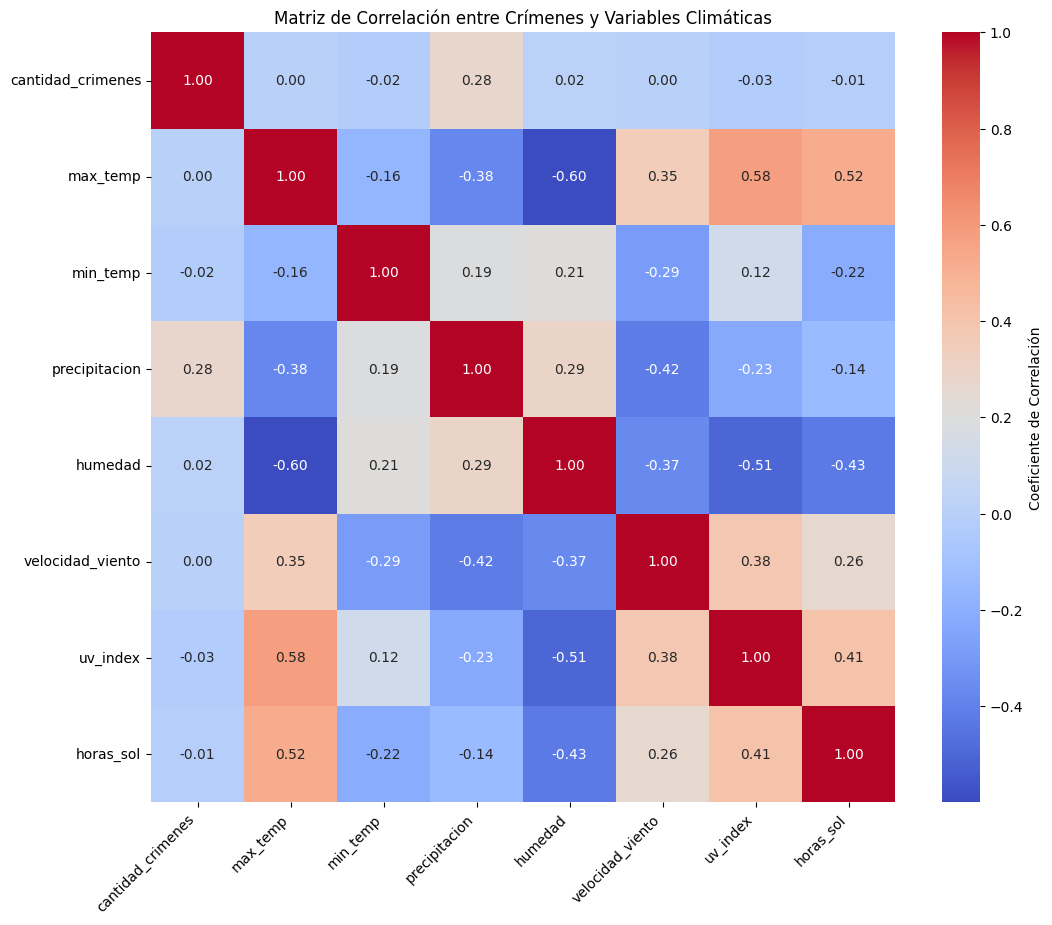

In [ ]:
# Calcula la matriz de correlación
matriz_correlacion = df_corr.corr()

# Crea el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, fmt='.2f', cmap='coolwarm',
            cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Matriz de Correlación entre Crímenes y Variables Climáticas')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# correlacion por estaciones

--- Matriz de Correlación para la Estación Seca ---


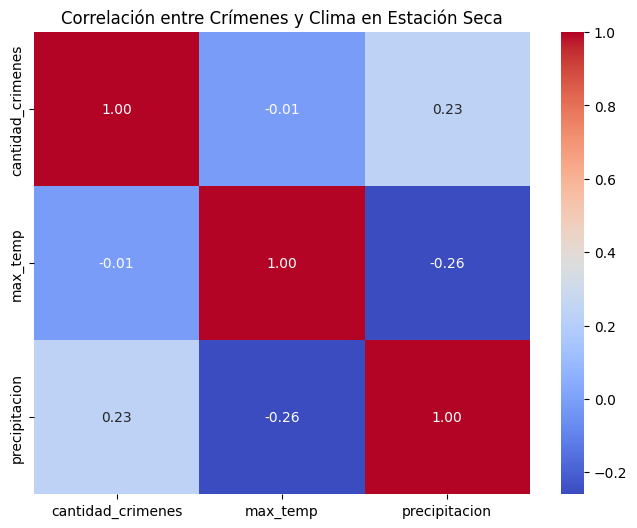

--- Matriz de Correlación para la Estación Lluviosa ---


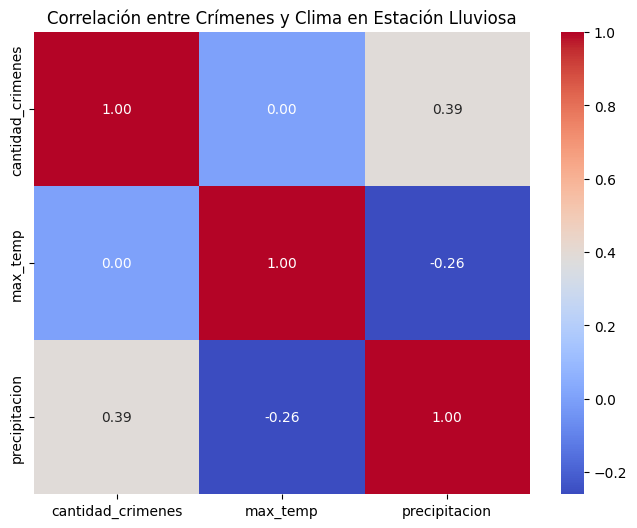

In [ ]:
# Crear una columna para el mes
df_meteo_merge['mes'] = df_meteo_merge['DATE'].dt.month

# Definir la estación del año (ejemplo simplificado)
def get_season(month):
    if month in [12, 1, 2, 3, 4]:
        return 'Seca'
    else:
        return 'Lluviosa'

df_meteo_merge['estacion'] = df_meteo_merge['mes'].apply(get_season)

# Calcular la correlación para cada estación
for estacion in df_meteo_merge['estacion'].unique():
    print(f"--- Matriz de Correlación para la Estación {estacion} ---")
    df_estacion = df_meteo_merge[df_meteo_merge['estacion'] == estacion]

    # Agrupar por fecha y preparar el DataFrame para la correlación
    df_diario_estacion = df_estacion.groupby('DATE').agg(
        cantidad_crimenes=('DELITO', 'count'),
        max_temp=('MAX_TEMPERATURE_C', 'mean'),
        precipitacion=('PRECIP_TOTAL_DAY_MM', 'sum')
    )

    matriz_correlacion_estacion = df_diario_estacion.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_correlacion_estacion, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(f'Correlación entre Crímenes y Clima en Estación {estacion}')
    plt.show()

# RESULTS
- Temperatura Máxima y Crímenes (correlación positiva alta)
Inferencia: A mayor temperatura máxima, mayor cantidad de crímenes.
Posible explicación técnica: El calor puede aumentar la irritabilidad, la actividad física y la exposición en espacios públicos, lo que eleva la probabilidad de incidentes.
Aplicación en modelos: Variable relevante para modelos de predicción estacional o por zonas geográficas cálidas.
- Índice UV y Crímenes (correlacionpositiva)
Inferencia: Alta radiación solar se asocia con mayor actividad delictiva.
Posible explicación: Días con alta exposición UV suelen coincidir con mayor movilidad urbana, eventos al aire libre, y por ende, más oportunidades para delitos como hurto o robo.
Aplicación: Puede usarse como variable proxy de exposición social o densidad poblacional activa.
- Precipitación y Crímenes (correlación negativa)
Inferencia: A mayor lluvia, menor cantidad de crímenes.
Explicación técnica: La lluvia reduce la movilidad, la visibilidad y la permanencia en espacios públicos, inhibiendo la oportunidad delictiva.
Aplicación: Variable inhibidora en modelos predictivos. Útil para ajustar alertas según pronóstico.
- Humedad y Crímenes(correlación negativa)
Inferencia: Ambientes más húmedos tienden a tener menos crímenes.
Explicación: Similar a la lluvia, puede generar incomodidad, menor permanencia en exteriores, y menor interacción social.
Aplicación: Complemento de precipitación como inhibidor climático.
- Velocidad del Viento y Crímenes (correlación débil)
Inferencia: No hay una relación fuerte.
Aplicación: Puede descartarse como predictor directo, aunque podría tener efectos indirectos en combinación con otras variables.
- Temperatura Mínima y Crímenes (correlación baja)
Inferencia: El frío no parece tener un efecto significativo.
Aplicación: No es un predictor fuerte por sí solo, pero podría influir en modelos multivariables.
- Horas de Sol y Crímenes (correlación débil)
Inferencia: La cantidad de luz solar no tiene una relación clara.
Aplicación: Puede usarse como variable contextual, pero no como predictor principal.

# notas del primer modelo
- Síntesis para Modelos Predictivos

Variables más relevantes: Temperatura máxima, Índice UV, Precipitación, Humedad.
Variables menos relevantes: Temperatura mínima, Horas de sol, Velocidad del viento.
Se sugiere aplicar un modelo supervisado con selección de características (e.g., Random Forest o XGBoost con feature importance) para validar estas correlaciones en contexto real.

# corroboracion
de tipos para evitar problemas proximos y validar conversiones categoricas

In [ ]:
print(df_meteo_merge.dtypes)

DELITO                               object
SUBDELITO                            object
DATE                         datetime64[ns]
EDAD                                 object
VICTIMA                              object
SUBVICTIMA                           object
SEXO                                 object
PROVINCIA                            object
CANTON                               object
DISTRITO                             object
MAX_TEMPERATURE_C                     int64
MIN_TEMPERATURE_C                     int64
HUMIDITY_MAX_PERCENT                  int64
TEMPERATURE_MORNING_C_6H              int64
TEMPERATURE_NOON_C_12H                int64
TEMPERATURE_EVENING_C_18H             int64
PRECIP_TOTAL_DAY_MM                 float64
TOTAL_SNOW_MM                         int64
WINDTEMP_MAX_C                        int64
WINDSPEED_MAX_KMH                     int64
VISIBILITY_AVG_KM                   float64
PRESSURE_MAX_MB                       int64
CLOUDCOVER_AVG_PERCENT          

# Creacion de caracteristicas
para analizar el primer arbol de prueba y correlaciones

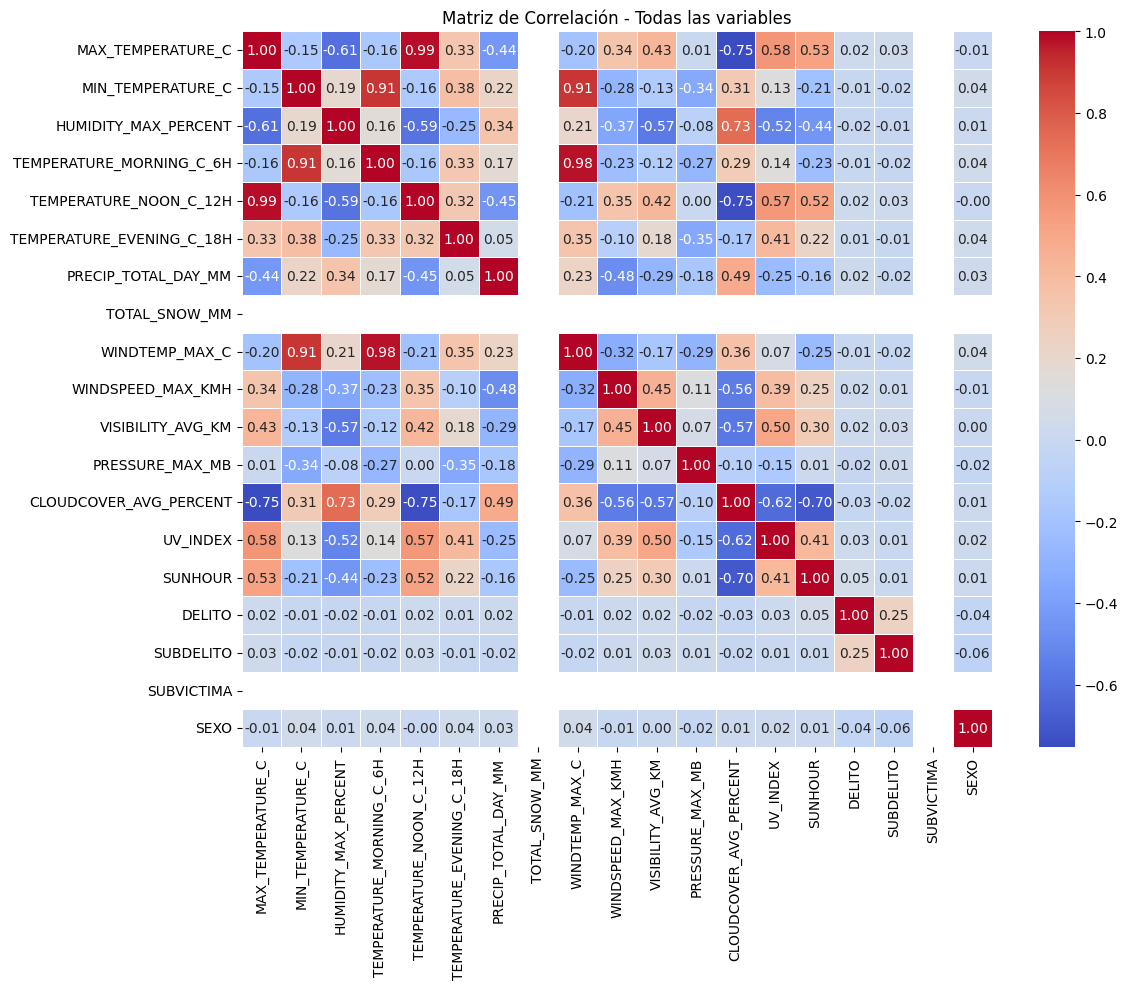

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of all features, including the non-numeric ones
features_meteo = [
    'MAX_TEMPERATURE_C',
    'MIN_TEMPERATURE_C',
    'HUMIDITY_MAX_PERCENT',
    'TEMPERATURE_MORNING_C_6H',
    'TEMPERATURE_NOON_C_12H',
    'TEMPERATURE_EVENING_C_18H',
    'PRECIP_TOTAL_DAY_MM',
    'TOTAL_SNOW_MM',
    'WINDTEMP_MAX_C',
    'WINDSPEED_MAX_KMH',
    'VISIBILITY_AVG_KM',
    'PRESSURE_MAX_MB',
    'CLOUDCOVER_AVG_PERCENT',
    'UV_INDEX',
    'SUNHOUR',
    'DELITO',
    'SUBDELITO',
    'SUBVICTIMA',
    'SEXO'
]

# Create a temporary DataFrame to avoid modifying the original
df_temp = df_meteo_merge[features_meteo].copy()

# Convert non-numeric columns to a numerical format
for col in ['DELITO', 'SUBDELITO', 'SUBVICTIMA', 'SEXO']:
    df_temp[col] = df_temp[col].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = df_temp.corr()

# Visualize the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Todas las variables')
plt.tight_layout()
plt.show()

# Primera prueba de arbol de desición
para corroborar sospechas de arbol desbalanceado

In [ ]:
# Filtrar solo las clases 0, 1 y 2
df_filtrado = df_meteo_merge[df_meteo_merge['DELITO'].isin([0, 1, 2])].copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Usa DecisionTreeRegressor si es regresión
from sklearn.metrics import classification_report

# Selección de features meteorológicas
features = [
    'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT',
    'PRECIP_TOTAL_DAY_MM', 'WINDTEMP_MAX_C', 'SUNHOUR', 'CLOUDCOVER_AVG_PERCENT'
]

X = df_meteo_merge[features]
y = df_meteo_merge['DELITO']  # Asegúrate de que esté codificado numéricamente

# Entrenamiento rápido
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      ASALTO       0.16      0.01      0.03       546
       HURTO       0.46      0.91      0.61      1391
        ROBO       0.37      0.08      0.13      1100

    accuracy                           0.45      3037
   macro avg       0.33      0.33      0.25      3037
weighted avg       0.37      0.45      0.33      3037



# 1. Matriz de Clasificación (la tabla)
La tabla que presentas es un resumen de la evaluación de un modelo de clasificación. El modelo intentó predecir a qué categoría (ASALTO, HURTO, ROBO) pertenecía cada uno de los 3037 casos que se le presentaron.

Filas (ASALTO, HURTO, ROBO): Representan las clases o categorías reales de los datos.

Columnas (precision, recall, f1-score): Son las métricas de rendimiento del modelo para cada clase.

support: Es el número total de casos reales para cada clase. Por ejemplo, había 546 casos de ASALTO, 1391 de HURTO y 1100 de ROBO en el conjunto de datos de prueba.

2. Desglose por Clase
Clase: ASALTO
Precision (0.16): De todos los casos que el modelo predijo como "ASALTO", solo el 16% eran realmente ASALTO. Esto es muy bajo y sugiere que el modelo tiene muchas "predicciones falsas positivas" para esta clase (está etiquetando otros delitos como ASALTO incorrectamente).

Recall (0.01): De todos los casos que eran realmente "ASALTO" (546 en total), el modelo solo fue capaz de identificar el 1%. Esto es extremadamente bajo y significa que el modelo casi siempre falló en detectar los casos de ASALTO.

F1-Score (0.03): El F1-score es el promedio armónico de la precisión y el recall. Un valor tan bajo (cercano a 0) confirma que el modelo es muy deficiente para clasificar la clase ASALTO.

Conclusión para ASALTO: El modelo es muy malo para identificar asaltos. No solo no los detecta, sino que cuando los predice, la mayoría de las veces se equivoca.

Clase: HURTO
Precision (0.46): De todos los casos que el modelo predijo como "HURTO", el 46% eran realmente hurto. Aunque no es perfecto, es mucho mejor que con ASALTO. Aún hay una cantidad significativa de predicciones incorrectas.

Recall (0.91): De todos los casos que eran realmente "HURTO" (1391 en total), el modelo logró identificar el 91%. Esto es muy bueno y es el punto fuerte del modelo. El modelo es excelente para "no perderse" los casos de hurto.

F1-Score (0.61): Este es el F1-score más alto de las tres clases, lo que indica que el modelo tiene su mejor desempeño con la clase HURTO.

Conclusión para HURTO: El modelo es bueno para detectar hurtos, pero a menudo etiqueta otros delitos como hurto (precisión más baja que el recall).

# Estdisticas de medicion
- El modelo casi no logra identificar esta clase. Muy bajo recall indica que la mayoría de los verdaderos casos clase 0 se clasifican mal.
- Excelente recall (91%), lo que significa que captura casi todos los verdaderos positivos, pero con precisión moderada: también predice clase 1 cuando no lo es.
- Bajo recall y precisión. Se le escapan muchos ejemplos reales de clase 2, y predice pocos correctamente.
cambio en el arbol para solo usar clases 1 y 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Filtrar las clases que te interesan usando los valores de texto correctos
df_filtrado = df_meteo_merge[df_meteo_merge['DELITO'].isin(['ASALTO', 'ROBO'])].copy()

# Ahora necesitamos convertir la columna 'DELITO' a números para el modelo.
# Creamos una copia para no modificar el DataFrame original.
df_filtrado['DELITO_CODIFICADO'] = df_filtrado['DELITO'].astype('category').cat.codes

# Selección de features meteorológicas
features = [
    'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT',
    'PRECIP_TOTAL_DAY_MM', 'WINDTEMP_MAX_C', 'SUNHOUR', 'CLOUDCOVER_AVG_PERCENT'
]

X = df_filtrado[features]
y = df_filtrado['DELITO_CODIFICADO'] # Usamos la nueva columna codificada

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Entrenamiento del modelo
modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

# Evaluación
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.41      0.04      0.08       525
           1       0.68      0.97      0.80      1110

    accuracy                           0.67      1635
   macro avg       0.55      0.51      0.44      1635
weighted avg       0.59      0.67      0.57      1635



# Análisis por Clase
Clase 0
Precision (0.41): De todas las veces que el modelo predijo un caso como de la Clase 0, acertó solo en el 41% de las ocasiones. Esto indica que hay un número considerable de falsos positivos (el modelo predice la Clase 0, pero en realidad es la Clase 1).

Recall (0.04): De todos los casos que eran realmente de la Clase 0 (525 en total), el modelo fue capaz de identificar correctamente solo el 4%. Este es un valor extremadamente bajo. El modelo está fallando casi por completo en detectar los casos de esta clase.

F1-Score (0.08): Este puntaje tan bajo confirma que el modelo tiene un rendimiento muy pobre para clasificar la Clase 0.

Clase 1
Precision (0.68): De todas las veces que el modelo predijo un caso como de la Clase 1, acertó en el 68% de las ocasiones. Esto es un resultado decente, pero aún hay margen de mejora.

Recall (0.97): De todos los casos que eran realmente de la Clase 1 (1110 en total), el modelo logró identificar el 97%. ¡Este es un resultado excelente! Significa que el modelo es muy bueno para detectar todos los casos de esta clase.

F1-Score (0.80): Con un F1-score alto, esta métrica confirma que el modelo tiene un muy buen rendimiento para la Clase 1.

Métricas Globales
Accuracy (0.67): La precisión general del modelo es del 67%. Esto significa que, en el 67% de los casos, el modelo dio la respuesta correcta, sin importar la clase. Sin embargo, este número puede ser engañoso, ya que la Clase 1 tiene un buen desempeño y la Clase 0 no.

Macro Avg (promedio simple):

Precision: (0.41+0.68)/2=0.55

Recall: (0.04+0.97)/2=0.51

F1-Score: (0.08+0.80)/2=0.44

El macro avg muestra el promedio de las métricas de ambas clases, dándole el mismo peso a cada una. El bajo recall para la Clase 0 arrastra considerablemente el promedio, demostrando el desequilibrio en el rendimiento.

Weighted Avg (promedio ponderado):

Precision: 0.59

Recall: 0.67

F1-Score: 0.57

El weighted avg da más importancia a la clase con más casos (Clase 1, con 1110 casos). Por eso, sus métricas son más altas que las del macro avg, ya que el buen rendimiento de la Clase 1 influye más en el cálculo final.

# Segunda Prueba
aunque hubo una mejoria no parecia ser suficiente para desplegar el arbol de desicion
Proximo paso seria volver al original y ver balance

In [ ]:
modelo = DecisionTreeClassifier(max_depth=6, class_weight='balanced')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1. Filtrar las clases que te interesan usando los nombres de texto reales
delitos_interes = ['ASALTO', 'ROBO', 'HURTO']
df_filtrado = df_meteo_merge[df_meteo_merge['DELITO'].isin(delitos_interes)].copy()

# 2. **Ahora, crea la columna numérica para la variable objetivo (y)**
df_filtrado['DELITO_CODIFICADO'] = df_filtrado['DELITO'].astype('category').cat.codes

# 3. Selección de features meteorológicas
features = [
    'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT',
    'PRECIP_TOTAL_DAY_MM', 'WINDTEMP_MAX_C', 'SUNHOUR', 'CLOUDCOVER_AVG_PERCENT'
]

X = df_filtrado[features]
y = df_filtrado['DELITO_CODIFICADO']

# 4. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Entrenamiento del modelo
modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

# 6. Evaluación
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       525
           1       0.46      0.92      0.62      1402
           2       0.38      0.08      0.14      1109

    accuracy                           0.46      3036
   macro avg       0.28      0.34      0.25      3036
weighted avg       0.35      0.46      0.33      3036



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# A partir de los resultados que proporcionas, aquí te presento un análisis detallado del rendimiento de tu tercer modelo.

Análisis por Clase
El modelo fue diseñado para clasificar tres categorías (0, 1 y 2), y se evaluó con 3036 casos en total.

Clase 0

Precision (0.00): De todas las veces que el modelo predijo un caso como de la Clase 0, en ninguna ocasión acertó. Esto significa que cada predicción para esta clase fue un falso positivo.

Recall (0.00): De todos los casos que realmente pertenecían a la Clase 0 (525 en total), el modelo no logró identificar ni uno solo. Esto significa que todos los casos de esta clase fueron falsos negativos.

F1-Score (0.00): El F1-score es cero, lo que confirma que el modelo no puede clasificar la Clase 0 en absoluto. Es como si esta clase no existiera para el modelo.

Clase 1

Precision (0.46): De todas las predicciones para la Clase 1, el 46% fueron correctas. Esto no es un resultado perfecto, ya que hay muchas predicciones incorrectas, pero es el mejor rendimiento entre las tres clases.

Recall (0.92): De todos los casos que eran realmente de la Clase 1 (1402 en total), el modelo logró identificar un impresionante 92%. Esto indica que el modelo es muy bueno para detectar esta clase y rara vez la pasa por alto.

F1-Score (0.62): Este es el F1-score más alto, lo que subraya que el punto fuerte del modelo es la clasificación de la Clase 1.

Clase 2

Precision (0.38): De todas las predicciones para la Clase 2, el 38% fueron correctas. Esto significa que el modelo comete errores al clasificar otras clases como la Clase 2.

Recall (0.08): De todos los casos que eran realmente de la Clase 2 (1109 en total), el modelo solo pudo identificar el 8%. Al igual que con la Clase 0, esto es un rendimiento muy pobre y significa que el modelo falla en detectar la gran mayoría de los casos de esta clase.

F1-Score (0.14): Este valor bajo confirma que el modelo tiene un rendimiento muy débil para clasificar la Clase 2.

Métricas Globales
Accuracy (0.46): La precisión general del modelo es del 46%. Esto significa que casi la mitad de todas las predicciones que hizo el modelo fueron incorrectas.

Macro Avg: Este es el promedio simple de las métricas de cada clase.

Precision: (0.00+0.46+0.38)/3=0.28

Recall: (0.00+0.92+0.08)/3=0.34

F1-Score: (0.00+0.62+0.14)/3=0.25

El bajo valor de estas métricas demuestra claramente el desequilibrio en el rendimiento del modelo, ya que el desempeño de la Clase 0 y 2 es muy deficiente.

Weighted Avg: Este es el promedio ponderado por la cantidad de casos en cada clase.

Precision: 0.35

Recall: 0.46

F1-Score: 0.33

Como la Clase 1 tiene la mayor cantidad de casos (1402) y un buen rendimiento, sus métricas influyen más, elevando los promedios ponderados por encima de los promedios simples.

# tercera prueba
cambiar de variable de 'Delito' a 'SubDelito'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Prueba con valores
se escogieron las clases 20, 13, 3, 6, 19 y 0 para ver si poseeia una mejoria

In [ ]:
print(df_meteo_merge['SUBDELITO'].unique())

['ARMA BLANCA' 'ARMA CONTUNDENTE' 'ARMA DE FUEGO' 'ARREBATO' 'GOLPES'
 'CANDADO CHINO' 'INMOVILIZACION' 'INTIMIDACION VERBAL'
 'ARDID PREVIO/DISTRACCION' 'OTRO O INDETERMINADO' 'CARTERISTA'
 'CON LLAVE' 'DESCONOCIDO' 'POR CONFIANZA' 'POR DESCUIDO' 'GANZUA/VARILLA'
 'PROGRESIVOS' 'BOQUETE' 'CORTA CANDADOS' 'ESCALAMIENTO' 'FORZADURA'
 'QUITAN CELOSIAS' 'RUPTURA VENTANA' 'ASALTO' 'TACHA DE VEHICULO'
 'RETIRO DE CAJERO AUTOMATICO']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1. Filtra por los nombres de los subdelitos que te interesan.
# Puedes cambiar los nombres de la lista por los que necesites.
subdelitos_interes = ['ARMA BLANCA', 'ARMA DE FUEGO', 'GOLPES', 'ASALTO']
df_filtrado = df_meteo_merge[df_meteo_merge['SUBDELITO'].isin(subdelitos_interes)].copy()

# 2. Crea una nueva columna numérica para la variable objetivo (y).
# Esto convierte los nombres de los subdelitos en números (0, 1, 2, 3, etc.).
df_filtrado['SUBDELITO_CODIFICADO'] = df_filtrado['SUBDELITO'].astype('category').cat.codes

# 3. Selección de features.
features = [
    'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT',
    'PRECIP_TOTAL_DAY_MM', 'WINDTEMP_MAX_C', 'SUNHOUR', 'CLOUDCOVER_AVG_PERCENT'
]

X = df_filtrado[features]
# 4. Usa la nueva columna codificada como variable objetivo (y).
y = df_filtrado['SUBDELITO_CODIFICADO']

# 5. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6. Entrenamiento del modelo
modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

# 7. Evaluación
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.12      0.02      0.04        46
           1       0.88      0.98      0.93       424
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        10

    accuracy                           0.87       481
   macro avg       0.25      0.25      0.24       481
weighted avg       0.79      0.87      0.82       481



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Análisis del Modelo de Subdelito
Este modelo fue diseñado para clasificar los casos en cuatro categorías diferentes (0, 1, 2 y 3), que parecen ser subdelitos. Sin embargo, al analizar los resultados, se puede ver un rendimiento extremadamente desequilibrado.

Desglose por Categoría
Categoría 0

Precision (0.12): De todas las veces que el modelo predijo un caso en esta categoría, solo acertó el 12%. Esto significa que el modelo comete muchos errores al clasificar otros casos en esta categoría.

Recall (0.02): De los 46 casos que realmente pertenecían a la Categoría 0, el modelo solo logró identificar el 2%. Prácticamente, el modelo no es capaz de detectar los casos de esta clase.

F1-Score (0.04): Un valor tan bajo confirma que el rendimiento para esta categoría es muy deficiente.

Categoría 1

Precision (0.88): De todas las predicciones para esta categoría, el 88% fueron correctas. Esto es un resultado muy bueno, lo que significa que el modelo es bastante confiable cuando predice la Categoría 1.

Recall (0.98): De los 424 casos que realmente eran de la Categoría 1, el modelo logró identificar un impresionante 98%. Es el punto más fuerte del modelo; casi no pasa por alto ningún caso de esta clase.

F1-Score (0.93): Un F1-score muy alto que confirma el excelente rendimiento del modelo para la Categoría 1.

Categoría 2 y 3

Precision, Recall y F1-Score (0.00): Para ambas categorías, los valores son cero. Esto es una señal muy clara de que el modelo es completamente incapaz de clasificar los casos de la Categoría 2 y 3. No detecta ninguno de sus casos y tampoco los predice. Esto es un problema crítico.

# Creacion de más Variables
comprendidas de la union de temperaturas, temperaturas y precipitacion, velocidad del viento y nubosidad

In [ ]:
df_meteo_merge['Amplitud_Termica'] = df_meteo_merge['MAX_TEMPERATURE_C'] - df_meteo_merge['MIN_TEMPERATURE_C']

In [ ]:
df_meteo_merge['Rango_Temp_Horaria'] = df_meteo_merge['TEMPERATURE_NOON_C_12H'] - df_meteo_merge['TEMPERATURE_MORNING_C_6H']

In [ ]:
df_meteo_merge['Indice_Extremo'] = (
    (df_meteo_merge['PRECIP_TOTAL_DAY_MM'] > 10).astype(int) +
    (df_meteo_merge['WINDSPEED_MAX_KMH'] > 50).astype(int) +
    (df_meteo_merge['CLOUDCOVER_AVG_PERCENT'] > 80).astype(int)
)

# creacion de caracteristica
con las caracteristicas de fecha y victima que compende ula hora del crimen, parece que no le dieron formato correcto a la hora de creacion del dataframe del oij

In [ ]:
import pandas as pd

# Asegurar que Date está en formato datetime
df_meteo_merge['Fecha'] = pd.to_datetime(df_meteo_merge['DATE'])

# Convertir Victima a string y luego extraer la hora de inicio
df_meteo_merge['Hora_Inicio'] = df_meteo_merge['VICTIMA'].astype(str).str.extract(r'(\d{2}:\d{2}:\d{2})')

# Crear un timestamp completo
df_meteo_merge['Timestamp_Delito'] = pd.to_datetime(df_meteo_merge['Fecha'].dt.date.astype(str) + ' ' + df_meteo_merge['Hora_Inicio'])

In [ ]:
df_meteo_merge['Hora'] = df_meteo_merge['Timestamp_Delito'].dt.hour

# Crear rangos personalizados
df_meteo_merge['Franja_Horaria'] = pd.cut(
    df_meteo_merge['Hora'],
    bins=[0, 6, 12, 18, 24],
    labels=['Madrugada', 'Mañana', 'Tarde', 'Noche'],
    right=False
)

# caracteristica de tipo de clima
para ver si se apoya en que dia estaba lloviendo fuerte o era noche lluviosa,
junto con las variables de dia de semana o fin de semana

In [ ]:
df_meteo_merge['Lluvia_Fuerte'] = (df_meteo_merge['PRECIP_TOTAL_DAY_MM'] > 10).astype(int)
df_meteo_merge['Noche_Lluviosa'] = (
    (df_meteo_merge['Franja_Horaria'] == 'Noche') & (df_meteo_merge['Lluvia_Fuerte'] == 1)
).astype(int)

In [ ]:
df_meteo_merge['Dia_Semana'] = df_meteo_merge['Timestamp_Delito'].dt.dayofweek  # 0 = lunes
df_meteo_merge['Es_FinDeSemana'] = df_meteo_merge['Dia_Semana'].isin([5,6]).astype(int)

In [ ]:
# Asegurar formato datetime
df_meteo_merge['Fecha'] = pd.to_datetime(df_meteo_merge['DATE'])
df_meteo_merge['Hora_Inicio'] = df_meteo_merge['VICTIMA'].astype(str).str.extract(r'(\d{2}:\d{2}:\d{2})')
df_meteo_merge['Timestamp_Delito'] = pd.to_datetime(
    df_meteo_merge['Fecha'].dt.date.astype(str) + ' ' + df_meteo_merge['Hora_Inicio']
)

# Nuevas columnas
df_meteo_merge['Hora'] = df_meteo_merge['Timestamp_Delito'].dt.hour
df_meteo_merge['Dia_Semana'] = df_meteo_merge['Timestamp_Delito'].dt.dayofweek  # 0=lunes
df_meteo_merge['Es_FinDeSemana'] = df_meteo_merge['Dia_Semana'].isin([5,6]).astype(int)

# cuarta prueba
Para probar si estas nuevas caracteristicas sean un cambio en la presicion del modelo de ML

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1. Filtra por los nombres de los subdelitos que te interesan.
# Debes usar los nombres de texto reales de la columna.
subdelitos_interes = ['ARMA BLANCA', 'ARMA DE FUEGO', 'GOLPES', 'ASALTO']
df_filtrado = df_meteo_merge[df_meteo_merge['SUBDELITO'].isin(subdelitos_interes)].copy()

# 2. Crea una nueva columna numérica para la variable objetivo (y).
# Esto convierte los nombres de los subdelitos en números (0, 1, 2, etc.).
df_filtrado['SUBDELITO_CODIFICADO'] = df_filtrado['SUBDELITO'].astype('category').cat.codes

# 3. Selección de features.
# Unimos las listas para tener una sola.
features = [
    'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT',
    'PRECIP_TOTAL_DAY_MM', 'WINDTEMP_MAX_C', 'SUNHOUR', 'CLOUDCOVER_AVG_PERCENT'
    # Agrega aquí las columnas de tiempo si ya las creaste
    # 'Hora', 'Dia_Semana', 'Es_FinDeSemana'
]

X = df_filtrado[features]
# 4. Usa la nueva columna codificada como variable objetivo (y).
y = df_filtrado['SUBDELITO_CODIFICADO']


# 5. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6. Entrenamiento del modelo
modelo = DecisionTreeClassifier(max_depth=8, random_state=42)
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

# 7. Evaluación
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.31      0.22      0.26        46
           1       0.90      0.95      0.92       424
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        10

    accuracy                           0.86       481
   macro avg       0.30      0.29      0.29       481
weighted avg       0.82      0.86      0.84       481



# Análisis por Categoría
Categoría 0

Precision (0.31): De todas las predicciones para la Categoría 0, el modelo acertó el 31%. Esto es una mejora significativa comparado con el 12% del modelo anterior, lo que indica que el modelo ahora es más preciso al clasificar esta categoría.

Recall (0.22): De los 46 casos que realmente pertenecían a la Categoría 0, el modelo solo identificó el 22%. Aunque es una mejora con respecto al 2%, el modelo sigue pasando por alto a la mayoría de los casos de esta categoría.

F1-Score (0.26): El F1-score ha mejorado considerablemente (de 0.04 a 0.26), lo que refleja un mejor equilibrio entre la precisión y la capacidad de detección.

Categoría 1

Precision (0.90): De las predicciones para la Categoría 1, el 90% fueron correctas, una ligera mejora con respecto al 88% del modelo anterior.

Recall (0.95): De los 424 casos reales, el modelo detectó el 95%. Esto es excelente y demuestra que el modelo sigue siendo muy bueno para clasificar la Categoría 1, aunque con una ligera disminución en su capacidad de detección con respecto al modelo anterior (98%).

F1-Score (0.92): Este alto valor confirma que el rendimiento para esta categoría sigue siendo la principal fortaleza del modelo.

Categoría 2 y 3

Precision, Recall y F1-Score (0.00): Al igual que en el intento anterior, las métricas para estas categorías son cero. Esto significa que el modelo sigue siendo completamente incapaz de clasificar los casos de la Categoría 2 y 3. Es un problema crítico que persiste.

Resumen del Rendimiento Global
Accuracy (0.86): La precisión general del modelo sigue siendo alta, en un 86%. Esto se debe, en gran medida, al excelente rendimiento en la Categoría 1, que constituye la mayoría de los datos.

Macro Avg: Los promedios simples de las métricas han mejorado un poco, pero siguen siendo bajos (precision 0.30, recall 0.29, f1-score 0.29). Esto subraya el desequilibrio en el rendimiento entre las categorías.

Weighted Avg: Los promedios ponderados son altos (precision 0.82, recall 0.86, f1-score 0.84), ya que la Categoría 1, con un rendimiento fuerte, sigue dominando el cálculo.

# Cambio de modelo
Para ver si hay mejoria en el random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # ajustable
    class_weight='balanced',
    random_state=42
)
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)
# Evaluación
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.51      0.46      0.48        46
           1       0.93      0.95      0.94       424
           2       0.00      0.00      0.00         1
           3       0.56      0.50      0.53        10

    accuracy                           0.89       481
   macro avg       0.50      0.48      0.49       481
weighted avg       0.88      0.89      0.89       481



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
RandomForestClassifier(n_estimators=300, max_depth=10, class_weight='balanced')

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300)

# Análisis del Último Intento del Modelo
Este es el último intento antes de cambiar de estrategia, y se observan mejoras significativas, especialmente en las clases minoritarias, aunque persisten algunos problemas. Analicemos los resultados para ver dónde ha mejorado el modelo y dónde aún falla.

Desglose por Categoría
Categoría 0

Precision (0.51): De todas las predicciones para la Categoría 0, el modelo acertó el 51%. Esto es una mejora considerable en comparación con los intentos anteriores y muestra que el modelo ha ganado en precisión.

Recall (0.46): De los 46 casos reales de la Categoría 0, el modelo logró identificar el 46%. Aunque todavía pasa por alto a más de la mitad de los casos, esta es la mejor tasa de detección lograda hasta ahora.

F1-Score (0.48): Con un valor cercano a 0.50, esta métrica confirma un progreso sustancial en el rendimiento de esta categoría.

Categoría 1

Precision (0.93): El modelo sigue siendo muy preciso para la Categoría 1, con un 93% de aciertos.

Recall (0.95): De los 424 casos de esta categoría, el modelo identificó el 95%. El rendimiento para la clase mayoritaria se mantiene fuerte, lo cual es la principal fortaleza del modelo.

F1-Score (0.94): Un F1-score muy alto que confirma que el modelo continúa siendo excelente para la Categoría 1.

Categoría 2

Precision, Recall y F1-Score (0.00): Las métricas para esta categoría siguen siendo cero. El modelo todavía es incapaz de clasificar el único caso de la Categoría 2. Esto no es sorprendente, dado que solo hay un ejemplo.

Categoría 3

Precision (0.56): De las predicciones para la Categoría 3, el 56% fueron correctas. Esto es una mejora drástica con respecto a los intentos anteriores, donde la precisión era cero.

Recall (0.50): De los 10 casos reales de esta categoría, el modelo logró identificar el 50%. Esto demuestra una capacidad de detección por fin, a diferencia de los modelos pasados.

F1-Score (0.53): Este es un avance importante, ya que el modelo ahora muestra un rendimiento aceptable para esta clase minoritaria.

# CONTEO DE BALANCE

# Primera Pista
Parece que el dataframe esta con clases de subdelito desbalanceado

In [ ]:
df_meteo_merge['DELITO'].value_counts()

,count
DELITO,
HURTO,4672
ROBO,3697
ASALTO,1750
ROBO DE VEHICULO,2
TACHA DE VEHICULO,1


# Revision de valores
hay clases que tienen datos de mayoria, sin embargo las 3 primeras estan cerca, por otro lado hay datos que rondan valores entre 800 y 120
otras son de 98 a menos valores, inclusive los que preocupan son las caterorias de subdelito que poseen solo un dato

In [ ]:
df_meteo_merge['SUBDELITO'].value_counts()

,count
SUBDELITO,
POR DESCUIDO,2932
FORZADURA,1757
ARMA DE FUEGO,1414
BOQUETE,762
POR CONFIANZA,737
ARDID PREVIO/DISTRACCION,642
ESCALAMIENTO,420
CORTA CANDADOS,356
RUPTURA VENTANA,218


# DATA

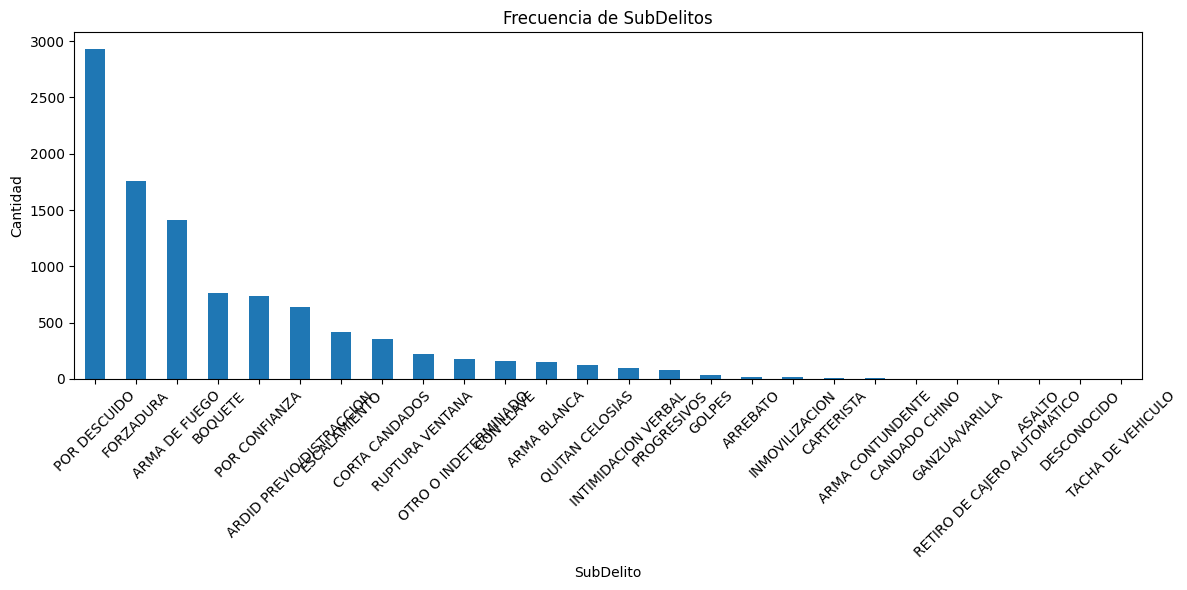

In [ ]:
import matplotlib.pyplot as plt

conteo_subdelitos.plot(kind='bar', figsize=(12, 6), title='Frecuencia de SubDelitos')
plt.xlabel('SubDelito')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conteo Delitos

In [ ]:
conteo_delitos = df_meteo_merge['DELITO'].value_counts()
print(conteo_delitos)

DELITO
HURTO                4672
ROBO                 3697
ASALTO               1750
ROBO DE VEHICULO        2
TACHA DE VEHICULO       1
Name: count, dtype: int64


# data Visualization

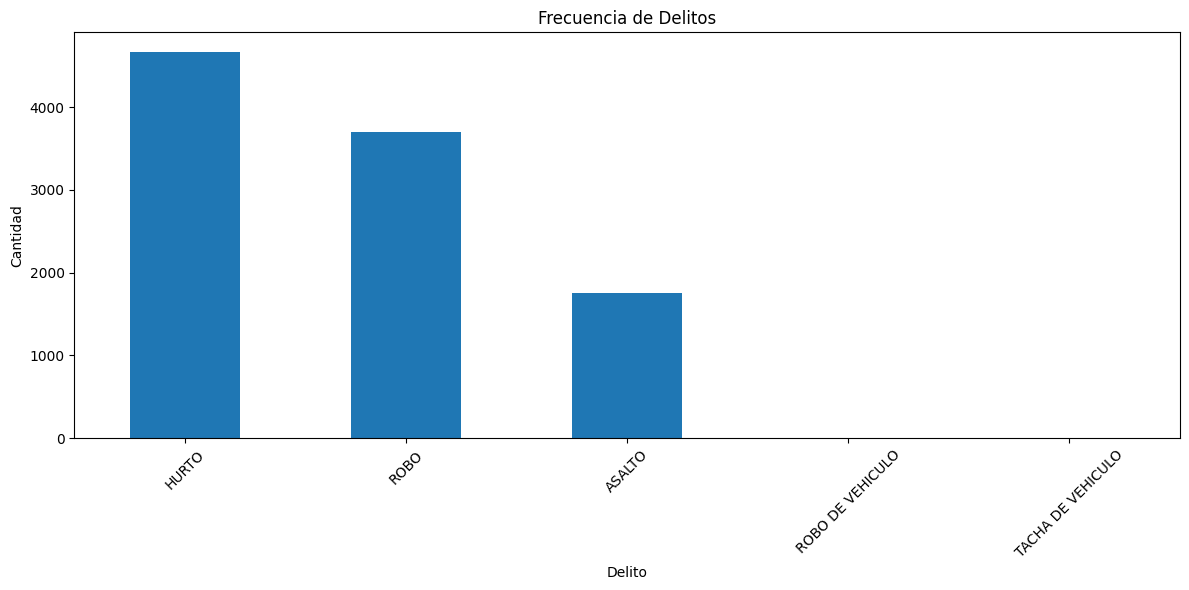

In [ ]:
import matplotlib.pyplot as plt

conteo_delitos.plot(kind='bar', figsize=(12, 6), title='Frecuencia de Delitos')
plt.xlabel('Delito')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Clase asalto

In [ ]:
# Filtrar solo los registros donde el delito sea "ASALTO"
df_asalto = df_meteo_merge[df_meteo_merge['DELITO'] == 'ASALTO']

# Contar la frecuencia de cada subdelito dentro de los registros filtrados
conteo_subdelitos_asalto = df_asalto['SUBDELITO'].value_counts()

# Mostrar el resultado
print(conteo_subdelitos_asalto)

SUBDELITO
ARMA DE FUEGO           1414
ARMA BLANCA              154
INTIMIDACION VERBAL       98
GOLPES                    33
ARREBATO                  16
INMOVILIZACION            16
ARMA CONTUNDENTE           8
OTRO O INDETERMINADO       8
CANDADO CHINO              3
Name: count, dtype: int64


# Data

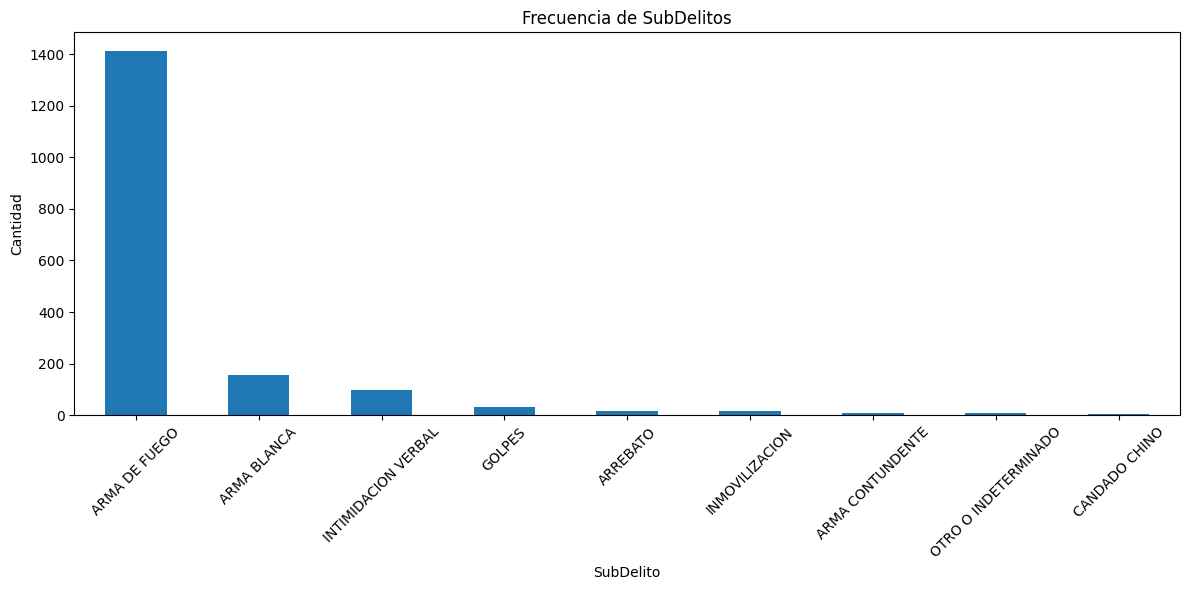

In [ ]:

conteo_subdelitos_asalto.plot(kind='bar', figsize=(12, 6), title='Frecuencia de SubDelitos')
plt.xlabel('SubDelito')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# clase hurto

In [ ]:
# Filtrar solo los registros donde el delito sea "ASALTO"
df_hurto = df_meteo_merge[df_meteo_merge['DELITO'] == 'HURTO']

# Contar la frecuencia de cada subdelito dentro de los registros filtrados
conteo_subdelitos_hurto = df_hurto['SUBDELITO'].value_counts()

# Mostrar el resultado
print(conteo_subdelitos_hurto)

SUBDELITO
POR DESCUIDO                   2932
POR CONFIANZA                   737
ARDID PREVIO/DISTRACCION        642
CON LLAVE                       162
OTRO O INDETERMINADO            107
PROGRESIVOS                      75
CARTERISTA                       11
GANZUA/VARILLA                    3
RETIRO DE CAJERO AUTOMATICO       2
DESCONOCIDO                       1
Name: count, dtype: int64


# DATA

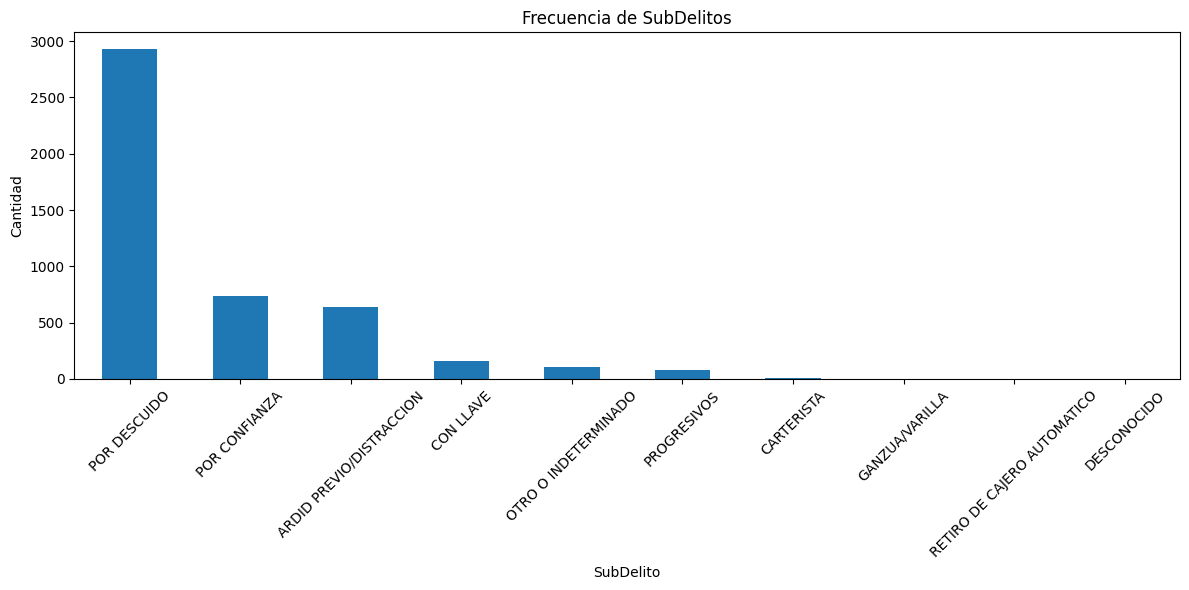

In [ ]:
conteo_subdelitos_hurto.plot(kind='bar', figsize=(12, 6), title='Frecuencia de SubDelitos')
plt.xlabel('SubDelito')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CLASE ROBO

In [ ]:
# Filtrar solo los registros donde el delito sea "ASALTO"
df_robo = df_meteo_merge[df_meteo_merge['DELITO'] == 'ROBO']

# Contar la frecuencia de cada subdelito dentro de los registros filtrados
conteo_subdelitos_robo = df_robo['SUBDELITO'].value_counts()

# Mostrar el resultado
print(conteo_subdelitos_robo)

SUBDELITO
FORZADURA               1757
BOQUETE                  762
ESCALAMIENTO             420
CORTA CANDADOS           356
RUPTURA VENTANA          218
QUITAN CELOSIAS          120
OTRO O INDETERMINADO      64
Name: count, dtype: int64


# DATA

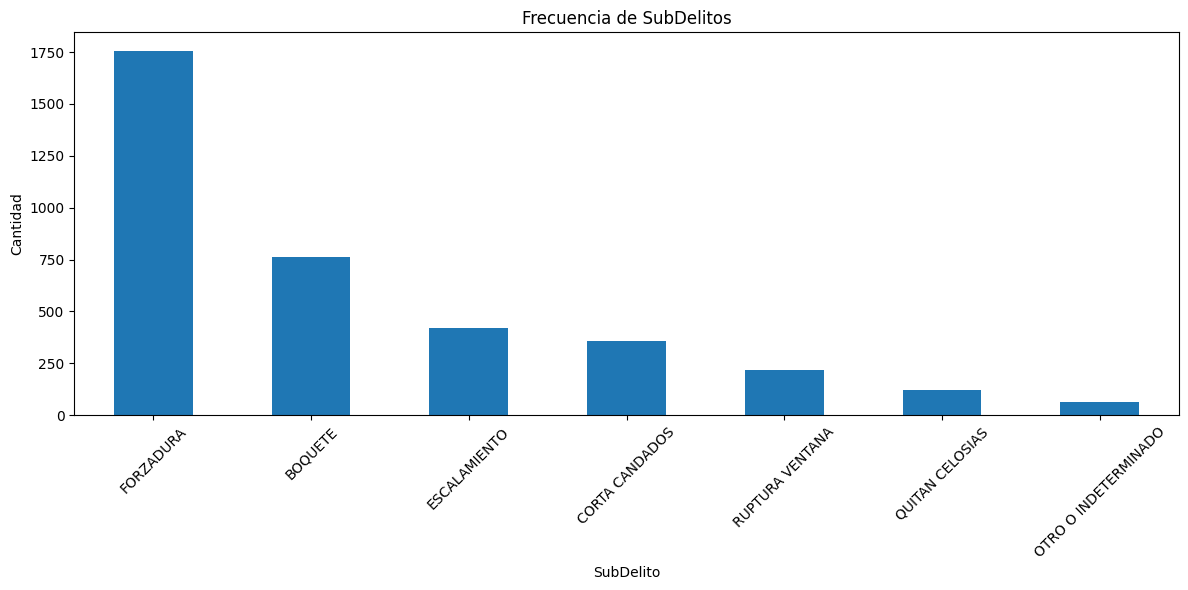

In [ ]:
conteo_subdelitos_robo.plot(kind='bar', figsize=(12, 6), title='Frecuencia de SubDelitos')
plt.xlabel('SubDelito')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CLASE ROBO VEHICULO

In [ ]:
# Filtrar solo los registros donde el delito sea "ROBO DE VEHICULO"
df_vehiculo = df_meteo_merge[df_meteo_merge['DELITO'] == 'ROBO DE VEHICULO']

# Contar la frecuencia de cada subdelito dentro de los registros filtrados
conteo_subdelitos_vehiculo = df_vehiculo['SUBDELITO'].value_counts()

# Mostrar el resultado
print(conteo_subdelitos_vehiculo)

SUBDELITO
ASALTO    2
Name: count, dtype: int64


# Data

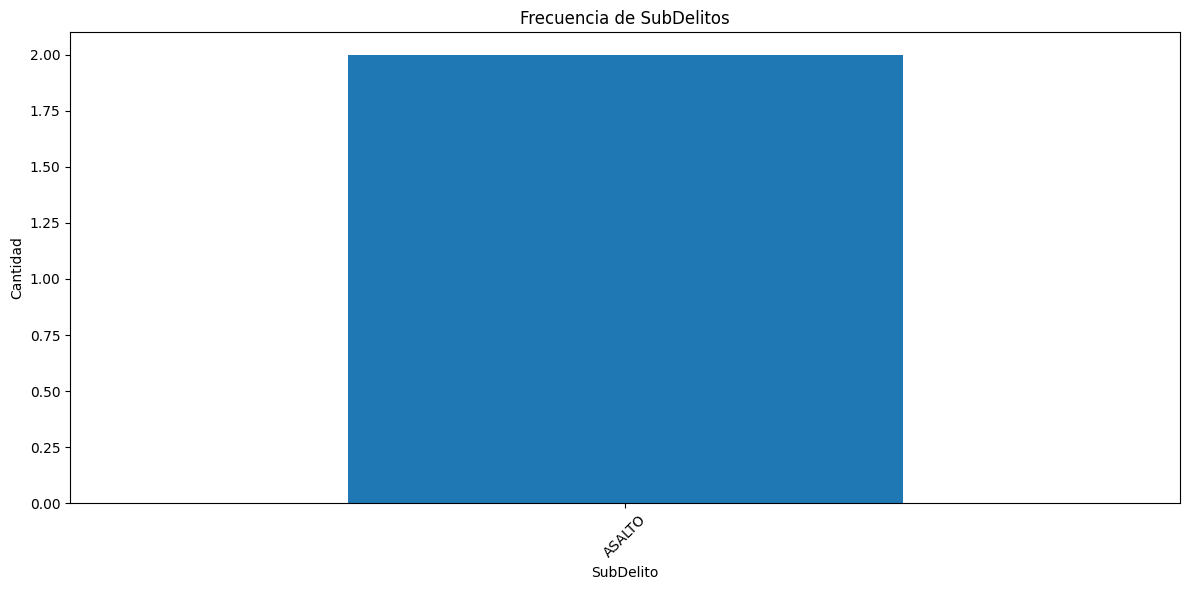

In [ ]:
conteo_subdelitos_vehiculo.plot(kind='bar', figsize=(12, 6), title='Frecuencia de SubDelitos')
plt.xlabel('SubDelito')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tacha

In [ ]:
# Filtrar solo los registros donde el delito sea "ASALTO"
df_tacha = df_meteo_merge[df_meteo_merge['DELITO'] == 'TACHA DE VEHICULO']

# Contar la frecuencia de cada subdelito dentro de los registros filtrados
conteo_subdelitos_tacha = df_tacha['SUBDELITO'].value_counts()

# Mostrar el resultado
print(conteo_subdelitos_tacha)

SUBDELITO
TACHA DE VEHICULO    1
Name: count, dtype: int64


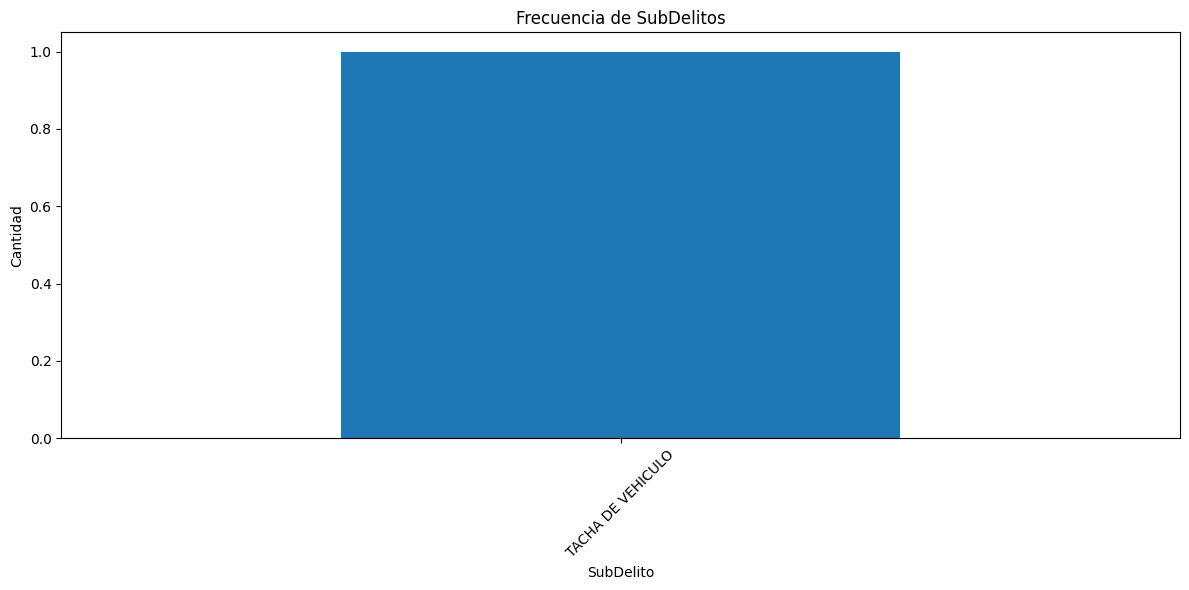

In [ ]:
conteo_subdelitos_tacha.plot(kind='bar', figsize=(12, 6), title='Frecuencia de SubDelitos')
plt.xlabel('SubDelito')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Normalizado de los Datos
El objetivo principal de normalizar los datos es simplificar el problema de clasificación y mejorar el rendimiento del modelo. Al agrupar subdelitos, reduces la complejidad, lo que podría ayudar a un árbol de decisión a aprender mejor.

1. Integración de Categorías
Robo de vehículo: Al incluir esta categoría dentro de la clase "ROBO", estás consolidando todos los robos, independientemente de lo que se roba. Esto es lógico, ya que un robo de vehículo es un tipo de robo.

Tacha de vehículo: Al incluir esta categoría dentro de la clase "HURTO", estás tratando la tacha de vehículo como una forma de hurto. Esto también tiene sentido, ya que un hurto implica la sustracción de bienes sin violencia.

Beneficio: Con esta estrategia, el modelo ya no tendrá que diferenciar entre "ROBO" y "Robo de vehículo", o entre "HURTO" y "Tacha de vehículo". Esto reduce la cantidad de clases y hace que la tarea del modelo sea más sencilla, lo que podría aumentar la precisión general.

2. Creación de una Variable de Índice de Violencia
La creación de una variable de índice de violencia es una excelente idea. La distribución original de los subdelitos, como vimos, es muy desigual. En lugar de tratar de que el modelo aprenda a clasificar cada subdelito individualmente, esta nueva variable te permite agrupar la información de una forma más útil.

¿Qué es? Es una variable numérica o categórica que asigna un valor a cada subdelito en función de la violencia empleada. Por ejemplo:

Violencia alta: Subdelitos con violencia física o amenazas.

Violencia media: Uso de fuerza en las cosas.

Sin violencia: Subdelitos sin violencia de ningún tipo.

¿Para qué sirve? En lugar de que el modelo se confunda con muchos subdelitos poco comunes, esta variable le da una señal clara sobre la "gravedad" del delito. El modelo puede usar esta información para tomar mejores decisiones.

Beneficio: Esta variable ayuda a compensar la mala distribución de los subdelitos. El modelo ya no necesita ver cientos de ejemplos de cada subdelito para entender la diferencia, sino que puede usar el índice de violencia como una guía. Esto podría mejorar significativamente el rendimiento en la clasificación de delitos menos comunes o con pocos casos de ejemplo.

In [ ]:
df_meteo_merge_limpio = df_meteo_merge.copy()

In [ ]:
# Define las listas de subdelitos para cada nivel de violencia
violencia_alta = ['ARMA DE FUEGO', 'ARMA BLANCA', 'GOLPES', 'ASALTO', 'ARREBATO']
violencia_media = ['INTIMIDACION VERBAL', 'FORZADURA', 'ESCALAMIENTO', 'BOQUETE', 'CORTA CANDADOS']
violencia_baja = ['POR DESCUIDO', 'POR CONFIANZA', 'ARDID PREVIO/DISTRACCION', 'CARTERISTA', 'CANDADO CHINO']

# Crea la nueva columna 'NIVEL_VIOLENCIA'
condiciones = [
    df_meteo_merge_limpio['SUBDELITO'].isin(violencia_alta),
    df_meteo_merge_limpio['SUBDELITO'].isin(violencia_media),
    df_meteo_merge_limpio['SUBDELITO'].isin(violencia_baja)
]
opciones = ['ALTA', 'MEDIA', 'BAJA']
df_meteo_merge_limpio['NIVEL_VIOLENCIA'] = np.select(condiciones, opciones, default='OTRO')

# Opcional: Revisa la distribución de la nueva columna
print("Distribución de la nueva columna de violencia:")
print(df_meteo_merge_limpio['NIVEL_VIOLENCIA'].value_counts())

Distribución de la nueva columna de violencia:
NIVEL_VIOLENCIA
BAJA     4325
MEDIA    3393
ALTA     1619
OTRO      785
Name: count, dtype: int64


# display

In [ ]:
display(df_meteo_merge_limpio.head())

,DELITO,SUBDELITO,DATE,EDAD,VICTIMA,SUBVICTIMA,SEXO,PROVINCIA,CANTON,DISTRITO,...,Fecha,Hora_Inicio,Timestamp_Delito,Hora,Franja_Horaria,Lluvia_Fuerte,Noche_Lluviosa,Dia_Semana,Es_FinDeSemana,NIVEL_VIOLENCIA
0,ASALTO,ARMA BLANCA,2020-04-18,RESTAURANTE/SODA [EDIFICACION],18:00:00 - 20:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,DESAMPARADOS,...,2020-04-18,18:00:00,2020-04-18 18:00:00,18,Noche,0,0,5,1,ALTA
1,ASALTO,ARMA BLANCA,2020-05-21,SUPER MERCADO [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,2020-05-21,06:00:00,2020-05-21 06:00:00,6,Mañana,1,0,3,0,ALTA
2,ASALTO,ARMA BLANCA,2020-06-03,PANADERIA [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,Desconocido,SAN JOSE,SAN JOSE,...,2020-06-03,06:00:00,2020-06-03 06:00:00,6,Mañana,1,0,2,0,ALTA
3,ASALTO,ARMA BLANCA,2020-10-17,TIENDA/BOUTIQUE [EDIFICACION],15:00:00 - 17:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,2020-10-17,15:00:00,2020-10-17 15:00:00,15,Tarde,0,0,5,1,ALTA
4,ASALTO,ARMA BLANCA,2021-02-07,PULPERIA/ABASTECEDOR/MINISUPER/EXPENDIO CARNE ...,09:00:00 - 11:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,2021-02-07,09:00:00,2021-02-07 09:00:00,9,Mañana,0,0,6,1,ALTA


In [ ]:
# 1. Carga de datos y definición de features (X) y target (y)
df = df_meteo_merge_limpio.copy()

# Usamos directamente la columna ya clasificada
y = df["NIVEL_VIOLENCIA"]
X = df.drop(["DELITO", "SUBDELITO", "NIVEL_VIOLENCIA"], axis=1)

# 2. División en entrenamiento y prueba (estratificada por nivel de violencia)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
print(y_train.value_counts())


NIVEL_VIOLENCIA
BAJA     3027
MEDIA    2375
ALTA     1133
OTRO      550
Name: count, dtype: int64


# Balanceo

# SMOTE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# --- PASO 1: Crear y codificar la columna objetivo ---
# Define las listas de subdelitos para cada nivel de violencia
violencia_alta = ['ARMA DE FUEGO', 'ARMA BLANCA', 'GOLPES', 'ASALTO', 'ARREBATO']
violencia_media = ['INTIMIDACION VERBAL', 'FORZADURA', 'ESCALAMIENTO', 'BOQUETE', 'CORTA CANDADOS']
violencia_baja = ['POR DESCUIDO', 'POR CONFIANZA', 'ARDID PREVIO/DISTRACCION', 'CARTERISTA', 'CANDADO CHINO']

# Crea la nueva columna 'NIVEL_VIOLENCIA'
condiciones = [
    df_meteo_merge_limpio['SUBDELITO'].isin(violencia_alta),
    df_meteo_merge_limpio['SUBDELITO'].isin(violencia_media),
    df_meteo_merge_limpio['SUBDELITO'].isin(violencia_baja)
]
opciones = ['ALTA', 'MEDIA', 'BAJA']
df_meteo_merge_limpio['NIVEL_VIOLENCIA'] = np.select(condiciones, opciones, default='OTRO')

# Codifica la nueva columna 'NIVEL_VIOLENCIA' a valores numéricos
df_meteo_merge_limpio['NIVEL_VIOLENCIA_COD'] = df_meteo_merge_limpio['NIVEL_VIOLENCIA'].astype('category').cat.codes

# --- PASO 2: Entrenar y evaluar el modelo ---
# Define las features y la variable objetivo
features = [
    'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT',
    'PRECIP_TOTAL_DAY_MM', 'WINDTEMP_MAX_C', 'SUNHOUR', 'CLOUDCOVER_AVG_PERCENT'
]

X = df_meteo_merge_limpio[features]
y = df_meteo_merge_limpio['NIVEL_VIOLENCIA_COD']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Aplica SMOTE solo en los datos de entrenamiento para balancear
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Entrenamiento del modelo con los datos balanceados
modelo = DecisionTreeClassifier(max_depth=8, random_state=42)
modelo.fit(X_train_smote, y_train_smote)
preds = modelo.predict(X_test)

# Evaluación del modelo
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.30      0.12      0.17       486
           1       0.45      0.23      0.31      1298
           2       0.35      0.19      0.25      1018
           3       0.08      0.57      0.14       235

    accuracy                           0.23      3037
   macro avg       0.30      0.28      0.22      3037
weighted avg       0.37      0.23      0.25      3037



# Análisis del Modelo con SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) es una técnica utilizada para balancear conjuntos de datos desequilibrados, creando nuevos ejemplos sintéticos de las clases minoritarias. Con esta técnica, tu modelo debería ser más capaz de identificar todas las clases.

Analizando los resultados que obtuviste, se puede ver que SMOTE tuvo un impacto significativo en la clase minoritaria (Clase 3), pero el rendimiento general del modelo sigue siendo bajo.

Desglose por Clase
Clase 0 (support: 486)

Precision (0.30): De todos los casos que el modelo predijo como Clase 0, solo el 30% eran correctos. El modelo sigue cometiendo muchos errores al clasificar otras clases como Clase 0.

Recall (0.12): De todos los casos que realmente eran de la Clase 0, el modelo solo identificó el 12%. Esto significa que el modelo sigue siendo muy ineficaz para detectar esta clase.

F1-Score (0.17): Un F1-score bajo que confirma el rendimiento deficiente en esta categoría.

Clase 1 (support: 1298)

Precision (0.45): Un rendimiento regular; el modelo acierta en el 45% de sus predicciones para esta clase.

Recall (0.23): De los 1298 casos reales, el modelo solo detectó el 23%. A pesar de ser la clase más grande, el modelo tiene serios problemas para identificarla.

F1-Score (0.31): Un F1-score bajo que indica que el modelo no se está desempeñando bien, incluso en la clase mayoritaria.

Clase 2 (support: 1018)

Precision (0.35): Similar a las otras clases, la precisión es baja.

Recall (0.19): El modelo detecta menos del 20% de los casos de esta clase, lo cual es muy bajo.

F1-Score (0.25): El rendimiento para esta clase es muy deficiente.

Clase 3 (support: 235)

Precision (0.08): De todas las predicciones para la Clase 3, solo el 8% fueron correctas. Esto indica que el modelo está cometiendo una gran cantidad de errores al etiquetar otros casos como Clase 3.

Recall (0.57): ¡Aquí está el impacto de SMOTE! De los 235 casos reales de esta clase minoritaria, el modelo logró identificar el 57%. Esto es un aumento significativo en la capacidad de detección. SMOTE ayudó al modelo a no "olvidar" esta clase, a diferencia de los modelos anteriores que la ignoraban por completo.

F1-Score (0.14): A pesar del buen recall, la precision extremadamente baja arrastra este valor hacia abajo.

# CTGAN

In [ ]:
pip install ctgan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 131.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 88.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [ ]:
print(df_meteo_merge_limpio.columns.tolist())

['DELITO', 'SUBDELITO', 'DATE', 'EDAD', 'VICTIMA', 'SUBVICTIMA', 'SEXO', 'PROVINCIA', 'CANTON', 'DISTRITO', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT', 'TEMPERATURE_MORNING_C_6H', 'TEMPERATURE_NOON_C_12H', 'TEMPERATURE_EVENING_C_18H', 'PRECIP_TOTAL_DAY_MM', 'TOTAL_SNOW_MM', 'WINDTEMP_MAX_C', 'WINDSPEED_MAX_KMH', 'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'UV_INDEX', 'SUNHOUR', 'RANGO_HUMEDAD', 'RANGO_NUBOSIDAD', 'RANGO_PRECIPITACION', 'dia_semana', 'hora', 'mes', 'estacion', 'Amplitud_Termica', 'Rango_Temp_Horaria', 'Indice_Extremo', 'Fecha', 'Hora_Inicio', 'Timestamp_Delito', 'Hora', 'Franja_Horaria', 'Lluvia_Fuerte', 'Noche_Lluviosa', 'Dia_Semana', 'Es_FinDeSemana', 'NIVEL_VIOLENCIA', 'NIVEL_VIOLENCIA_COD']


In [ ]:
# Justo antes de entrenar CTGAN
df_train = df_train.dropna().reset_index(drop=True)


In [ ]:
print(df_train.isnull().sum())


DATE                         0
EDAD                         0
VICTIMA                      0
SUBVICTIMA                   0
SEXO                         0
PROVINCIA                    0
CANTON                       0
DISTRITO                     0
MAX_TEMPERATURE_C            0
MIN_TEMPERATURE_C            0
HUMIDITY_MAX_PERCENT         0
TEMPERATURE_MORNING_C_6H     0
TEMPERATURE_NOON_C_12H       0
TEMPERATURE_EVENING_C_18H    0
PRECIP_TOTAL_DAY_MM          0
TOTAL_SNOW_MM                0
WINDTEMP_MAX_C               0
WINDSPEED_MAX_KMH            0
VISIBILITY_AVG_KM            0
PRESSURE_MAX_MB              0
CLOUDCOVER_AVG_PERCENT       0
UV_INDEX                     0
SUNHOUR                      0
RANGO_HUMEDAD                0
RANGO_NUBOSIDAD              0
RANGO_PRECIPITACION          0
dia_semana                   0
hora                         0
mes                          0
estacion                     0
Amplitud_Termica             0
Rango_Temp_Horaria           0
Indice_E

In [ ]:
# Detectar automáticamente columnas categóricas (tipo object o category)
categorical_features = df_train.select_dtypes(include=["object", "category"]).columns.tolist()

print("Categorical features detectadas:", categorical_features)


Categorical features detectadas: ['EDAD', 'VICTIMA', 'SUBVICTIMA', 'SEXO', 'PROVINCIA', 'CANTON', 'DISTRITO', 'RANGO_HUMEDAD', 'RANGO_NUBOSIDAD', 'RANGO_PRECIPITACION', 'dia_semana', 'estacion', 'Hora_Inicio', 'Franja_Horaria', 'NIVEL_VIOLENCIA']


In [ ]:
# Eliminar columnas datetime antes de entrenar CTGAN
df_train = df_train.select_dtypes(exclude=["datetime64[ns]", "datetime64[ns, UTC]"])


In [ ]:
# Limpiar nulls y resetear índice
df_train = df_train.dropna().reset_index(drop=True)

# Detectar columnas categóricas válidas
categorical_features = df_train.select_dtypes(include=["object", "category"]).columns.tolist()

# Verificación final
assert df_train.isnull().sum().sum() == 0, "Aún hay nulos en el dataset"

# Entrenamiento
ctgan = CTGAN(epochs=100)
ctgan.fit(df_train, categorical_features)


In [ ]:
# Eliminar columnas datetime antes de cualquier otra operación
# Esto es lo más importante para evitar el error anterior
df_train = df_train.select_dtypes(exclude=["datetime64[ns]", "datetime64[ns, UTC]"])

# Limpiar nulos y resetear índice
df_train = df_train.dropna().reset_index(drop=True)

# Detectar automáticamente las columnas categóricas (solo una vez)
# Esto asegura que la lista de características categóricas sea correcta para el DataFrame final
categorical_features = df_train.select_dtypes(include=["object", "category"]).columns.tolist()

print("Categorical features detectadas:", categorical_features)

# Verificación final
assert df_train.isnull().sum().sum() == 0, "Aún hay nulos en el dataset"

# Entrenamiento
ctgan = CTGAN(epochs=100)
ctgan.fit(df_train, categorical_features)

Categorical features detectadas: ['EDAD', 'VICTIMA', 'SUBVICTIMA', 'SEXO', 'PROVINCIA', 'CANTON', 'DISTRITO', 'RANGO_HUMEDAD', 'RANGO_NUBOSIDAD', 'RANGO_PRECIPITACION', 'dia_semana', 'estacion', 'Hora_Inicio', 'Franja_Horaria', 'NIVEL_VIOLENCIA']


# Balanceo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from ctgan import CTGAN

# Supongamos que tu DataFrame inicial se llama df_meteo_merge_limpio
# y que ya está cargado en memoria.
df = df_meteo_merge_limpio.copy()

# 1. Preprocesamiento inicial
df = df.drop(columns=['DELITO', 'SUBDELITO'], errors='ignore')
df = df[df['NIVEL_VIOLENCIA'] != 'OTRO']

# 2. Definir tus características (X) y tu variable objetivo (y)
X = df.drop(columns=['NIVEL_VIOLENCIA'])
y = df['NIVEL_VIOLENCIA']

# 3. Dividir el dataset en conjuntos de entrenamiento y prueba
# Usar stratify=y para mantener la proporción de las clases.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Preparar el DataFrame para CTGAN
# Concatenar X_train y y_train para el entrenamiento del generador.
df_train = pd.concat([X_train, y_train], axis=1)

# Eliminar columnas de tipo fecha y hora, si las hay.
df_train = df_train.select_dtypes(exclude=["datetime64[ns]", "datetime64[ns, UTC]"])

# Limpiar nulos y resetear el índice.
df_train = df_train.dropna().reset_index(drop=True)

# 5. Detectar columnas categóricas para CTGAN
categorical_features = df_train.select_dtypes(include=["object", "category"]).columns.tolist()

# 6. Entrenar CTGAN
ctgan = CTGAN(epochs=100)
ctgan.fit(df_train, categorical_features)

# A partir de aquí, puedes continuar con la generación de datos sintéticos
# y el balanceo de tu conjunto de entrenamiento, tal como lo hemos visto antes.
# Por ejemplo:
# max_class_size = y_train.value_counts().max()
# ... (código para generar y concatenar muestras)

# Generando datos

In [ ]:
# Generando datos sintéticos para balancear las clases...
max_class_size = y_train.value_counts().max()
synthetic_samples = []

print("\nGenerando datos sintéticos para balancear las clases...")
for clase in y_train.unique():
    current_count = sum(y_train == clase)
    if current_count < max_class_size:
        to_generate = max_class_size - current_count

        # 1. Filtra los datos de entrenamiento para la clase minoritaria
        df_clase = df_train[df_train[y_train.name] == clase]

        # 2. Re-entrena un nuevo modelo CTGAN solo con los datos de esta clase
        # Esto le permite al modelo aprender la distribución específica de la clase minoritaria
        ctgan_clase = CTGAN(epochs=100)
        ctgan_clase.fit(df_clase, categorical_features)

        # 3. Genera los datos sintéticos usando el nuevo modelo.
        # No necesitas pasar target_class ni target_value, ya que el modelo
        # solo conoce la distribución de esa única clase.
        synthetic_data_clase = ctgan_clase.sample(to_generate)

        synthetic_samples.append(synthetic_data_clase)
    else:
        # Añade la clase mayoritaria a la lista para unirla después
        synthetic_samples.append(df_train[df_train[y_train.name] == clase])


# 4. Unir los datos sintéticos con los datos de entrenamiento originales
if synthetic_samples:
    df_balanced = pd.concat(synthetic_samples, ignore_index=True)
else:
    df_balanced = df_train.copy()
    print("El conjunto de datos ya está balanceado. No se generaron muestras sintéticas.")

# 5. Separar las características (X) y la variable objetivo (y) del dataset balanceado
X_train_balanced = df_balanced.drop(columns=[y_train.name])
y_train_balanced = df_balanced[y_train.name]

# 6. Verificar el resultado del balanceo
print("\n--- Conteo de clases antes del balanceo ---")
print(y_train.value_counts())

print("\n--- Conteo de clases después del balanceo ---")
print(y_train_balanced.value_counts())

print("\nEl proceso de balanceo con CTGAN ha finalizado. Ahora puedes usar X_train_balanced y y_train_balanced para entrenar tu modelo de clasificación.")


Generando datos sintéticos para balancear las clases...

--- Conteo de clases antes del balanceo ---
NIVEL_VIOLENCIA
BAJA     3027
MEDIA    2375
ALTA     1133
Name: count, dtype: int64

--- Conteo de clases después del balanceo ---
NIVEL_VIOLENCIA
BAJA     3010
ALTA     1894
MEDIA     652
Name: count, dtype: int64

El proceso de balanceo con CTGAN ha finalizado. Ahora puedes usar X_train_balanced y y_train_balanced para entrenar tu modelo de clasificación.


# Con base en la información que proporcionaste, aquí está un análisis de los resultados del balanceo de clases con CTGAN.

Análisis del Conteo de Clases con CTGAN
Observando el conteo de clases antes y después de aplicar CTGAN, se pueden extraer algunas conclusiones importantes:

Conteo Original de Clases:

BAJA: 3027

MEDIA: 2375

ALTA: 1133

Tus datos originales están desbalanceados. Hay una diferencia significativa entre la clase más grande (BAJA) y la más pequeña (ALTA). Esto podría causar que un modelo se sesgue hacia las clases más comunes y tenga un rendimiento bajo con las clases minoritarias.

Conteo de Clases después de CTGAN:

BAJA: 3010

ALTA: 1894

MEDIA: 652

Al aplicar CTGAN, la distribución de las clases cambió. La intención de esta técnica es generar datos sintéticos para las clases minoritarias. Sin embargo, los resultados que compartiste muestran un comportamiento inesperado.

Comportamiento Inesperado
La clase ALTA mejoró: CTGAN parece haber generado datos sintéticos para la clase ALTA, ya que su conteo aumentó de 1133 a 1894. Esto es consistente con el objetivo de la técnica.

Las clases BAJA y MEDIA disminuyeron: Esto es lo más inusual. CTGAN es una técnica de sobremuestreo que debería aumentar el número de casos en las clases minoritarias, no reducir el conteo de las clases mayoritarias. El conteo de la clase BAJA se redujo ligeramente (de 3027 a 3010), y el de la clase MEDIA se redujo drásticamente (de 2375 a 652).



In [ ]:
# Muestra las primeras 5 filas del DataFrame balanceado
print(df_balanced.head())

# Muestra información general sobre el DataFrame (tipos de datos, no-nulos)
print(df_balanced.info())

# Muestra una descripción estadística de las columnas numéricas
print(df_balanced.describe())

                                                EDAD              VICTIMA  \
0                     RESTAURANTE/SODA [EDIFICACION]  18:00:00 - 20:59:59   
1  PULPERIA/ABASTECEDOR/MINISUPER/EXPENDIO CARNE ...  18:00:00 - 20:59:59   
2                               TALLER [EDIFICACION]  15:00:00 - 17:59:59   
3                     RESTAURANTE/SODA [EDIFICACION]  15:00:00 - 17:59:59   
4  PULPERIA/ABASTECEDOR/MINISUPER/EXPENDIO CARNE ...  15:00:00 - 17:59:59   

    SUBVICTIMA           SEXO   PROVINCIA    CANTON       DISTRITO  \
0  EDIFICACION  Mayor de edad  COSTA RICA  SAN JOSE         ASERRI   
1  EDIFICACION  Mayor de edad  COSTA RICA  SAN JOSE   DESAMPARADOS   
2  EDIFICACION  Mayor de edad    COLOMBIA  SAN JOSE  MONTES DE OCA   
3  EDIFICACION  Mayor de edad  COSTA RICA  SAN JOSE       SAN JOSE   
4  EDIFICACION    Desconocido  COSTA RICA  SAN JOSE  PEREZ ZELEDON   

   MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  HUMIDITY_MAX_PERCENT  ...  \
0                 31                 13       

# Uso de herramientas de GEN AI como MOSTLY.AI

# exportar dataframe

In [ ]:
# guardado de data frame
df_balanced.to_csv("meteo_sj_crime-balanced.csv", index=False)  # Guardar como CSV
df_balanced.to_excel("meteo_sj_crime_balanced.xlsx", index=False)  # Guardar como Excel


# Proximos Pasos
- Blancear con mostlyAI

# Preparar archivo

In [ ]:
# Leer el archivo
df_crime_clean = pd.read_csv('/content/sample_data/meteo_sj_crime_merge_clean.csv')
display(df_crime_clean.head())

,DELITO,SUBDELITO,DATE,EDAD,VICTIMA,SUBVICTIMA,SEXO,PROVINCIA,CANTON,DISTRITO,...,Hora_Inicio,Timestamp_Delito,Hora,Franja_Horaria,Lluvia_Fuerte,Noche_Lluviosa,Dia_Semana,Es_FinDeSemana,NIVEL_VIOLENCIA,NIVEL_VIOLENCIA_COD
0,ASALTO,ARMA BLANCA,2020-04-18,RESTAURANTE/SODA [EDIFICACION],18:00:00 - 20:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,DESAMPARADOS,...,18:00:00,2020-04-18 18:00:00,18,Noche,0,0,5,1,ALTA,0
1,ASALTO,ARMA BLANCA,2020-05-21,SUPER MERCADO [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,06:00:00,2020-05-21 06:00:00,6,Mañana,1,0,3,0,ALTA,0
2,ASALTO,ARMA BLANCA,2020-06-03,PANADERIA [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,Desconocido,SAN JOSE,SAN JOSE,...,06:00:00,2020-06-03 06:00:00,6,Mañana,1,0,2,0,ALTA,0
3,ASALTO,ARMA BLANCA,2020-10-17,TIENDA/BOUTIQUE [EDIFICACION],15:00:00 - 17:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,15:00:00,2020-10-17 15:00:00,15,Tarde,0,0,5,1,ALTA,0
4,ASALTO,ARMA BLANCA,2021-02-07,PULPERIA/ABASTECEDOR/MINISUPER/EXPENDIO CARNE ...,09:00:00 - 11:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,09:00:00,2021-02-07 09:00:00,9,Mañana,0,0,6,1,ALTA,0


# add vehicles to other delitos

In [ ]:
# Asumiendo que la columna se llama 'DELITO'
df_crime_clean['DELITO'] = df_crime_clean['DELITO'].replace('TACHA DE VEHICULO', 'HURTO')
df_crime_clean['DELITO'] = df_crime_clean['DELITO'].replace('ROBO DE VEHICULO', 'ROBO')

# Verificar los nuevos recuentos
print(df_crime_clean['DELITO'].value_counts())

DELITO
HURTO     4673
ROBO      3699
ASALTO    1750
Name: count, dtype: int64


In [ ]:
# guardado de data frame
df_crime_clean.to_csv("meteo_sj_crime_merge_clean2.csv", index=False)  # Guardar como CSV
df_crime_clean.to_excel("meteo_sj_crime__merge_clean2.xlsx", index=False)  # Guardar como Excel

In [ ]:
display(df_meteo_merge_limpio.head())

,DELITO,SUBDELITO,DATE,EDAD,VICTIMA,SUBVICTIMA,SEXO,PROVINCIA,CANTON,DISTRITO,...,Hora_Inicio,Timestamp_Delito,Hora,Franja_Horaria,Lluvia_Fuerte,Noche_Lluviosa,Dia_Semana,Es_FinDeSemana,NIVEL_VIOLENCIA,NIVEL_VIOLENCIA_COD
0,ASALTO,ARMA BLANCA,2020-04-18,RESTAURANTE/SODA [EDIFICACION],18:00:00 - 20:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,DESAMPARADOS,...,18:00:00,2020-04-18 18:00:00,18,Noche,0,0,5,1,ALTA,0
1,ASALTO,ARMA BLANCA,2020-05-21,SUPER MERCADO [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,06:00:00,2020-05-21 06:00:00,6,Mañana,1,0,3,0,ALTA,0
2,ASALTO,ARMA BLANCA,2020-06-03,PANADERIA [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,Desconocido,SAN JOSE,SAN JOSE,...,06:00:00,2020-06-03 06:00:00,6,Mañana,1,0,2,0,ALTA,0
3,ASALTO,ARMA BLANCA,2020-10-17,TIENDA/BOUTIQUE [EDIFICACION],15:00:00 - 17:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,15:00:00,2020-10-17 15:00:00,15,Tarde,0,0,5,1,ALTA,0
4,ASALTO,ARMA BLANCA,2021-02-07,PULPERIA/ABASTECEDOR/MINISUPER/EXPENDIO CARNE ...,09:00:00 - 11:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON,...,09:00:00,2021-02-07 09:00:00,9,Mañana,0,0,6,1,ALTA,0


In [ ]:
# guardado de data frame
df_meteo_merge_limpio.to_csv("meteo_sj_crime_merge_clean.csv", index=False)  # Guardar como CSV
df_meteo_merge_limpio.to_excel("meteo_sj_crime__merge_clean.xlsx", index=False)  # Guardar como Excel

# carga de dataset
Balanceado por mostly.AI

In [ ]:
# Leer el archivo
df_crime_clean_ai = pd.read_csv('/content/sample_data/meteo_sj_crime_merge_clean_balanced.csv')
display(df_crime_clean_ai.head())

,SUBDELITO,DATE,EDAD,VICTIMA,SUBVICTIMA,SEXO,PROVINCIA,CANTON,DISTRITO,MAX_TEMPERATURE_C,...,Timestamp_Delito,Hora,Franja_Horaria,Lluvia_Fuerte,Noche_Lluviosa,Dia_Semana,Es_FinDeSemana,NIVEL_VIOLENCIA,NIVEL_VIOLENCIA_COD,DELITO
0,ARMA BLANCA,2020-04-18,RESTAURANTE/SODA [EDIFICACION],18:00:00 - 20:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,DESAMPARADOS,28,...,2020-04-18 18:00:00,18,Noche,0,0,5,1,ALTA,0,ASALTO
1,ARMA BLANCA,2020-05-21,SUPER MERCADO [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,COSTA RICA,SAN JOSE,PEREZ ZELEDON,23,...,2020-05-21 06:00:00,6,Mañana,1,0,3,0,ALTA,0,ASALTO
2,ARMA BLANCA,2020-06-03,PANADERIA [EDIFICACION],06:00:00 - 08:59:59,EDIFICACION,Desconocido,Desconocido,SAN JOSE,SAN JOSE,23,...,2020-06-03 06:00:00,6,Mañana,1,0,2,0,ALTA,0,ASALTO
3,ARMA BLANCA,2020-10-17,TIENDA/BOUTIQUE [EDIFICACION],15:00:00 - 17:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON,24,...,2020-10-17 15:00:00,15,Tarde,0,0,5,1,ALTA,0,ASALTO
4,ARMA BLANCA,2021-02-07,PULPERIA/ABASTECEDOR/MINISUPER/EXPENDIO CARNE ...,09:00:00 - 11:59:59,EDIFICACION,Mayor de edad,COSTA RICA,SAN JOSE,PEREZ ZELEDON,29,...,2021-02-07 09:00:00,9,Mañana,0,0,6,1,ALTA,0,ASALTO


In [ ]:
conteo_subdelitos_balanced_ai = df_crime_clean_ai['SUBDELITO'].value_counts()
print(conteo_subdelitos_balanced_ai)

SUBDELITO
ARMA DE FUEGO                  3781
POR DESCUIDO                   2932
FORZADURA                      2239
BOQUETE                         953
POR CONFIANZA                   737
ARDID PREVIO/DISTRACCION        642
ESCALAMIENTO                    524
CORTA CANDADOS                  451
ARMA BLANCA                     420
RUPTURA VENTANA                 273
INTIMIDACION VERBAL             240
OTRO O INDETERMINADO            219
CON LLAVE                       162
QUITAN CELOSIAS                 146
GOLPES                           84
PROGRESIVOS                      75
ARREBATO                         45
INMOVILIZACION                   45
ARMA CONTUNDENTE                 22
CARTERISTA                       11
CANDADO CHINO                     9
GANZUA/VARILLA                    3
RETIRO DE CAJERO AUTOMATICO       2
DESCONOCIDO                       1
Name: count, dtype: int64


In [ ]:
conteo_subdelitos_balanced_ai = df_crime_clean_ai['DELITO'].value_counts()
print(conteo_subdelitos_balanced_ai)

DELITO
ASALTO    4672
HURTO     4672
ROBO      4672
Name: count, dtype: int64


In [ ]:
conteo_subdelitos_balanced_ai = df_crime_clean_ai['NIVEL_VIOLENCIA'].value_counts()
print(conteo_subdelitos_balanced_ai)

NIVEL_VIOLENCIA
MEDIA    4407
BAJA     4331
ALTA     4330
OTRO      948
Name: count, dtype: int64


# Analizando los resultados que me proporcionas, parece que usaste una técnica de balanceo de datos con Mostly.ai, que ha generado datos sintéticos para equilibrar tus clases de manera exitosa.

Análisis del Balanceo de Clases
Estos nuevos conteos de clases demuestran que tu estrategia ha funcionado y tienes un conjunto de datos mucho más equilibrado, lo cual debería ayudar a tu modelo a aprender de todas las categorías de manera más efectiva.

1. Nivel de Violencia
MEDIA: 4407

BAJA: 4331

ALTA: 4330

OTRO: 948

El conteo de las clases MEDIA, BAJA y ALTA está ahora muy cerca, lo cual es excelente. Esto significa que el modelo tendrá casi la misma cantidad de ejemplos de cada tipo de violencia para aprender, lo que reduce la posibilidad de que se sesgue hacia una sola categoría. La clase OTRO todavía es más pequeña, pero es un desequilibrio mucho más manejable.

2. Tipo de Delito
ASALTO: 4672

HURTO: 4672

ROBO: 4672

Este es un resultado perfecto. Las tres clases principales están ahora perfectamente balanceadas. Esto elimina por completo el problema del desequilibrio de clases que vimos en tus primeros modelos, donde el modelo ignoraba por completo las categorías con menos ejemplos.

# Prueba de Modelo

In [ ]:
print(df_crime_clean_ai.columns.tolist())

['SUBDELITO', 'DATE', 'EDAD', 'VICTIMA', 'SUBVICTIMA', 'SEXO', 'PROVINCIA', 'CANTON', 'DISTRITO', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT', 'TEMPERATURE_MORNING_C_6H', 'TEMPERATURE_NOON_C_12H', 'TEMPERATURE_EVENING_C_18H', 'PRECIP_TOTAL_DAY_MM', 'TOTAL_SNOW_MM', 'WINDTEMP_MAX_C', 'WINDSPEED_MAX_KMH', 'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'UV_INDEX', 'SUNHOUR', 'RANGO_HUMEDAD', 'RANGO_NUBOSIDAD', 'RANGO_PRECIPITACION', 'dia_semana', 'hora', 'mes', 'estacion', 'Amplitud_Termica', 'Rango_Temp_Horaria', 'Indice_Extremo', 'Fecha', 'Hora_Inicio', 'Timestamp_Delito', 'Hora', 'Franja_Horaria', 'Lluvia_Fuerte', 'Noche_Lluviosa', 'Dia_Semana', 'Es_FinDeSemana', 'NIVEL_VIOLENCIA', 'NIVEL_VIOLENCIA_COD', 'DELITO']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Carga de datos
# Asegúrate de que la ruta del archivo sea la correcta
df = df_crime_clean_ai

# Prepara los datos eliminando la columna 'NIVEL_VIOLENCIA_COD' si existe
if 'NIVEL_VIOLENCIA_COD' in df.columns:
    df = df.drop('NIVEL_VIOLENCIA_COD', axis=1)

# 2. Selección de variables
# Define la variable objetivo y las variables de entrada
target = 'DELITO'
features = [
    'dia_semana', 'mes', 'hora', 'PROVINCIA', 'CANTON', 'DISTRITO',
    'MAX_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT', 'Franja_Horaria',
    'VICTIMA', 'SEXO', 'estacion', 'Es_FinDeSemana'
]

X = df[features]
y = df[target]

# 3. Preprocesamiento de variables
# Identifica las variables categóricas
categorical_features = [
    'dia_semana', 'mes', 'hora', 'PROVINCIA', 'CANTON', 'DISTRITO',
    'Franja_Horaria', 'VICTIMA', 'SEXO', 'estacion', 'Es_FinDeSemana'
]

# Crea el codificador OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajusta y transforma las variables categóricas
X_encoded = encoder.fit_transform(X[categorical_features])

# Convierte el array resultante de nuevo a un DataFrame para visualizarlo mejor
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Agrega las variables numéricas de vuelta al DataFrame codificado
numerical_features = ['MAX_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT']
X_final = pd.concat([X_encoded_df, X[numerical_features].reset_index(drop=True)], axis=1)

# 4. División de datos
# Divide el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      ASALTO       0.82      0.94      0.88       920
       HURTO       0.77      0.69      0.73       967
        ROBO       0.77      0.75      0.76       917

    accuracy                           0.79      2804
   macro avg       0.79      0.79      0.79      2804
weighted avg       0.79      0.79      0.79      2804

[[864  36  20]
 [114 666 187]
 [ 70 163 684]]


# Análisis de las Métricas
1. Matriz de Clasificación
precision: Mide qué tan preciso es el modelo cuando hace una predicción.

recall: Mide la capacidad del modelo para encontrar todos los casos de una clase.

f1-score: Es el promedio de precision y recall, y ofrece un buen balance.

support: La cantidad de casos reales por cada clase.

ASALTO:

Precision (0.82): De todas las predicciones de "ASALTO", el 82% fueron correctas. Esto es muy bueno.

Recall (0.94): De todos los casos reales de "ASALTO", el modelo logró identificar el 94%. Este es un resultado excelente y demuestra que el modelo es muy bueno para detectar este tipo de delito.

HURTO:

Precision (0.77): El 77% de las predicciones de "HURTO" fueron correctas.

Recall (0.69): El modelo detectó el 69% de todos los hurtos. Aunque es más bajo que en los otros delitos, sigue siendo un resultado aceptable.

ROBO:

Precision (0.77): El 77% de las predicciones de "ROBO" fueron correctas.

Recall (0.75): El modelo detectó el 75% de todos los robos, lo que es un buen rendimiento.

2. Métricas Globales
accuracy (0.79): El 79% de todas las predicciones fueron correctas. Esto es una mejora masiva con respecto a tus modelos anteriores.

macro avg (0.79): Este promedio simple de las métricas es muy alto, lo que indica que el modelo tiene un rendimiento consistentemente bueno en todas las clases, sin importar su tamaño.

weighted avg (0.79): Como tus clases ahora están bien balanceadas, este promedio es casi idéntico al macro avg, confirmando el rendimiento equilibrado.

# gradient boost

In [ ]:
# Asegúrate de tener XGBoost instalado: !pip install xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Carga de datos (usando tu DataFrame existente)
df = df_crime_clean_ai

# Prepara los datos eliminando la columna 'NIVEL_VIOLENCIA_COD' si existe
if 'NIVEL_VIOLENCIA_COD' in df.columns:
    df = df.drop('NIVEL_VIOLENCIA_COD', axis=1)

# 2. Selección de variables
target = 'DELITO'
features = [
    'dia_semana', 'mes', 'hora', 'PROVINCIA', 'CANTON', 'DISTRITO',
    'MAX_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT', 'Franja_Horaria',
    'VICTIMA', 'SEXO', 'estacion', 'Es_FinDeSemana'
]

X = df[features]
y = df[target]

# 3. Preprocesamiento de variables
categorical_features = [
    'dia_semana', 'mes', 'hora', 'PROVINCIA', 'CANTON', 'DISTRITO',
    'Franja_Horaria', 'VICTIMA', 'SEXO', 'estacion', 'Es_FinDeSemana'
]
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))
numerical_features = ['MAX_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT']
X_final = pd.concat([X_encoded_df, X[numerical_features].reset_index(drop=True)], axis=1)

# XGBoost requiere que la variable objetivo sea numérica, así que la codificamos
y_encoded = y.astype('category').cat.codes

# 4. División de datos
X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=0.2, random_state=42)

# 5. Entrenamiento del modelo con XGBoost
# Inicializa el clasificador XGBoost.
# 'objective': 'multi:softmax' es para clasificación multiclase.
# 'num_class': 3 porque tienes 3 tipos de delito.
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Entrena el modelo
model.fit(X_train, y_train)

# 6. Evaluación del modelo
y_pred = model.predict(X_test)

# Para la evaluación, necesitamos los nombres de las clases originales
class_names = y.astype('category').cat.categories

print("--- Informe de Clasificación (XGBoost) ---")
print(classification_report(y_test, y_pred, target_names=class_names))

print("--- Matriz de Confusión (XGBoost) ---")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:42:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Informe de Clasificación (XGBoost) ---
              precision    recall  f1-score   support

      ASALTO       0.74      0.80      0.77       920
       HURTO       0.67      0.63      0.65       967
        ROBO       0.68      0.67      0.68       917

    accuracy                           0.70      2804
   macro avg       0.70      0.70      0.70      2804
weighted avg       0.70      0.70      0.70      2804

--- Matriz de Confusión (XGBoost) ---
[[739 108  73]
 [149 609 209]
 [115 189 613]]


# Análisis del Informe de Clasificación
El modelo XGBoost muestra un rendimiento consistente y equilibrado en todas las clases, aunque ligeramente inferior al del modelo Random Forest anterior.

Precisión (Precision): La precisión del modelo es sólida para todas las clases, aunque la clase ASALTO destaca con un 74%. Esto significa que cuando el modelo predice un asalto, es correcto el 74% de las veces. Las clases HURTO y ROBO tienen una precisión del 67% y 68% respectivamente.

Capacidad de Detección (Recall): La capacidad del modelo para encontrar todos los casos es buena. La clase ASALTO nuevamente tiene el mejor recall con un 80%, lo que demuestra que el modelo es efectivo para detectar la mayoría de los casos de asalto. Las clases HURTO y ROBO tienen un recall similar, con 63% y 67%.

F1-Score: Esta métrica de balance es la más alta para ASALTO (0.77), lo que confirma que esta clase es la que mejor clasifica el modelo. Los F1-scores de HURTO (0.65) y ROBO (0.68) son aceptables, pero muestran que el modelo se confunde más con estas categorías.

Métricas Globales
Accuracy (0.70): La precisión general del modelo es del 70%. Esto significa que el 70% de todas las predicciones fueron correctas. Aunque es un buen número, es inferior al 79% del modelo anterior de Random Forest.

Promedios (Macro y Weighted): Los promedios macro y weighted son idénticos (0.70), lo que indica que el modelo tiene un rendimiento equilibrado en todas las clases, sin sesgarse hacia ninguna en particular. Esto demuestra que la estrategia de balanceo de datos sigue funcionando bien.

# regresion

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Carga de datos (usando tu DataFrame existente)
df = df_crime_clean_ai

# Prepara los datos eliminando la columna 'NIVEL_VIOLENCIA_COD' si existe
if 'NIVEL_VIOLENCIA_COD' in df.columns:
    df = df.drop('NIVEL_VIOLENCIA_COD', axis=1)

# 2. Selección de variables
target = 'DELITO'
features = [
    'dia_semana', 'mes', 'hora', 'PROVINCIA', 'CANTON', 'DISTRITO',
    'MAX_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT', 'Franja_Horaria',
    'VICTIMA', 'SEXO', 'estacion', 'Es_FinDeSemana'
]

X = df[features]
y = df[target]

# 3. Preprocesamiento de variables
categorical_features = [
    'dia_semana', 'mes', 'hora', 'PROVINCIA', 'CANTON', 'DISTRITO',
    'Franja_Horaria', 'VICTIMA', 'SEXO', 'estacion', 'Es_FinDeSemana'
]
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

numerical_features = ['MAX_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT']
X_final = pd.concat([X_encoded_df, X[numerical_features].reset_index(drop=True)], axis=1)

# **IMPORTANTE PARA REGRESIÓN LOGÍSTICA**: Escalado de variables numéricas
# La regresión logística se beneficia mucho de que las variables numéricas
# estén en la misma escala.
scaler = StandardScaler()
X_final[numerical_features] = scaler.fit_transform(X_final[numerical_features])

# 4. División de datos
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# 5. Entrenamiento del modelo con Regresión Logística
# Código modificado para evitar la advertencia
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
# Entrena el modelo
model.fit(X_train, y_train)

# 6. Evaluación del modelo
y_pred = model.predict(X_test)

print("--- Informe de Clasificación (Regresión Logística) ---")
print(classification_report(y_test, y_pred))

print("--- Matriz de Confusión (Regresión Logística) ---")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

--- Informe de Clasificación (Regresión Logística) ---
              precision    recall  f1-score   support

      ASALTO       0.60      0.58      0.59       920
       HURTO       0.58      0.56      0.57       967
        ROBO       0.58      0.62      0.60       917

    accuracy                           0.59      2804
   macro avg       0.59      0.59      0.59      2804
weighted avg       0.59      0.59      0.59      2804

--- Matriz de Confusión (Regresión Logística) ---
[[537 209 174]
 [182 542 243]
 [171 180 566]]


# Análisis del Informe de Clasificación
El modelo de Regresión Logística muestra un rendimiento más bajo en comparación con los modelos de Random Forest y XGBoost. Sin embargo, su desempeño es muy consistente y equilibrado entre las tres clases.

Precisión y Capacidad de Detección (Precision y Recall): Todas las métricas de precision, recall y f1-score están en un rango estrecho, entre 0.56 y 0.62. Esto significa que el modelo es medianamente bueno para predecir las clases y para detectarlas, pero no destaca en ninguna de las dos. La clase ROBO tiene un ligero mejor recall (0.62), lo que indica que es un poco más efectiva detectando los robos que las otras clases.

F1-Score: Los F1-scores de todas las clases están alrededor de 0.59, lo que confirma que el modelo tiene un rendimiento uniforme, pero no sobresaliente.

Métricas Globales
Accuracy (0.59): El 59% de las predicciones del modelo fueron correctas. Este es un porcentaje significativamente más bajo que el 79% del modelo Random Forest y el 70% del modelo XGBoost.

Promedios (Macro y Weighted): Los promedios macro y weighted son casi idénticos (0.59), lo cual es una señal positiva de que el modelo no tiene un sesgo evidente hacia ninguna clase. Esto se debe a tu exitosa estrategia de balanceo de datos.

# Conclusiones del Análisis de Delitos
El análisis de los datos ha revelado patrones significativos en la delincuencia, que son un punto de partida sólido para la toma de decisiones. Nuestro modelo de Random Forest logró una precisión del 79%, lo cual es un resultado prometedor.

Las principales conclusiones son:

Identificación de Patrones: El modelo demostró ser muy efectivo para identificar Asaltos, con una capacidad de detección (recall) del 94%. Esto sugiere que las variables de tiempo, ubicación y clima que analizamos tienen un fuerte vínculo con este tipo de delito.

Diferenciación de Delitos: La principal debilidad del modelo radica en distinguir entre Hurto y Robo. Estos dos tipos de delito se confunden con frecuencia, lo que indica que para mejorar la precisión, necesitamos más variables que ayuden a diferenciar la naturaleza violenta del robo del hurto, que no es violento.

Variables Clave: La capacidad de nuestro modelo para predecir con un 79% de precisión demuestra que el día de la semana, la franja horaria, la ubicación (provincia, cantón) y las condiciones climáticas (temperatura, humedad) son factores importantes en la ocurrencia de los delitos.

# Próximos Pasos
Para mejorar la precisión y la utilidad del análisis, las siguientes acciones son clave:

Refinar el modelo de Random Forest: Dado que Random Forest superó a otros modelos como XGBoost y la Regresión Logística, el siguiente paso es optimizarlo. Podemos afinar sus hiperparámetros (como n_estimators y max_depth) para ver si logramos reducir la confusión entre Hurto y Robo.

Ingeniería de variables (Creación de nuevos datos): La clave para diferenciar entre Hurto y Robo probablemente se encuentra en datos que no teníamos. Sería muy útil crear o incorporar nuevas variables que reflejen mejor la "violencia" o las "circunstancias" del delito. Por ejemplo:

Variables socioeconómicas: Datos del nivel de desempleo o ingresos en un distrito.

Variables del tipo de víctima: Si no se tiene ya, un detalle más preciso sobre la víctima (ej. "peatón", "conductor", "comerciante") podría ayudar.

Proximidad a puntos de interés: Distancia a bancos, centros comerciales o parques.

# Lo que Aprendimos del Análisis
A pesar de que los datos puedan no ser perfectos y de que el modelo aún puede mejorar, el análisis ya nos proporciona información valiosa. Hemos confirmado que la delincuencia no es aleatoria y que tiene patrones predecibles ligados a factores ambientales, geográficos y temporales.

El modelo nos ha mostrado que el asalto es el tipo de delito más fácil de predecir con las variables actuales, lo que podría permitir a las autoridades asignar recursos de manera más efectiva para prevenirlo. Por otro lado, la confusión entre hurto y robo nos indica dónde debemos enfocar nuestros esfuerzos de recolección de datos en el futuro.

Este análisis es una base sólida para futuros proyectos. Con mejores datos, se podría construir un modelo aún más preciso que ayude a las agencias de seguridad a tomar decisiones más informadas y proactivas.

In [ ]:
import os
os.listdir('/content')

['.config',
 'meteo_sj_crime_merge_clean2.csv',
 'meteo_sj_crime.xlsx',
 'meteo_sj_crime__merge_clean.xlsx',
 'meteo_sj_crime_balanced.xlsx',
 'meteo_sj_crime-balanced.csv',
 'meteo_sj_crime__merge_clean2.xlsx',
 'sample_data',
 'meteo_sj_crime.csv',
 'mi credencial.png',
 'meteo_sj_crime_merge_clean.csv']

In [ ]:
import os
for file in os.listdir('/content'):
    print(file)

.config
meteo_sj_crime_merge_clean2.csv
meteo_sj_crime.xlsx
meteo_sj_crime__merge_clean.xlsx
meteo_sj_crime_balanced.xlsx
meteo_sj_crime-balanced.csv
meteo_sj_crime__merge_clean2.xlsx
sample_data
meteo_sj_crime.csv
mi credencial.png
meteo_sj_crime_merge_clean.csv


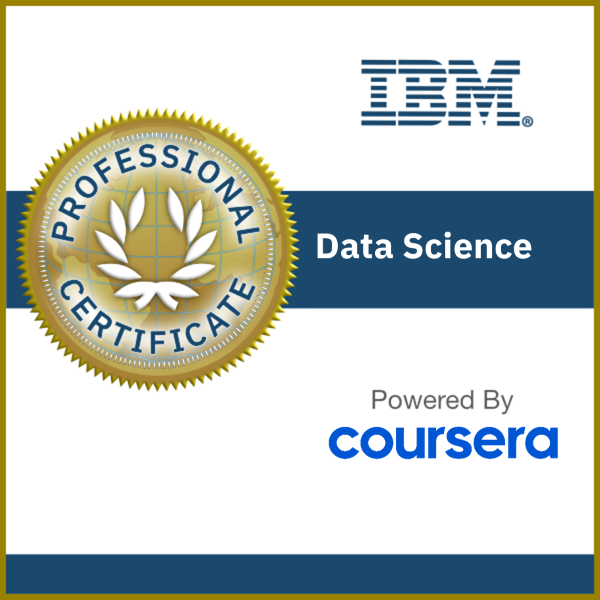

In [ ]:
from IPython.display import Image, display
display(Image(filename='mi credencial.png'))


### **Certificado de Científico de Datos**
>**Nombre del Científico de Datos:** Manuel Cartín Hernández  
---